In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load the data with proper column names
file_path = '/home/jberg/OneDrive/Data_collection_Himalaya/streamflow/India/chandra_all.csv'
column_names = ['date', 'day', 'month', 'year', 'hour', 'Q_obs']
df = pd.read_csv(file_path, names=column_names)

# Drop the hour column as requested
df = df.drop('hour', axis=1)

# First look at the data structure
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)

Dataset shape: (41526, 5)

Column names:
['date', 'day', 'month', 'year', 'Q_obs']

First few rows:
               date  day  month  year       Q_obs
0  22/06/2016 14:00   22      6  2016  297.908384
1  22/06/2016 15:00   22      6  2016  300.584873
2  22/06/2016 16:00   22      6  2016  308.186086
3  22/06/2016 17:00   22      6  2016  318.032230
4  22/06/2016 18:00   22      6  2016  324.268981

Data types:
date      object
day        int64
month      int64
year       int64
Q_obs    float64
dtype: object


In [3]:
# Convert the date column to datetime
df['datetime'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
df['date_only'] = df['datetime'].dt.date

print("After datetime conversion:")
print(df[['date', 'datetime', 'day', 'month', 'year', 'Q_obs']].head())
print(f"\nDate range: {df['datetime'].min()} to {df['datetime'].max()}")
print(f"Total duration: {df['datetime'].max() - df['datetime'].min()}")

After datetime conversion:
               date            datetime  day  month  year       Q_obs
0  22/06/2016 14:00 2016-06-22 14:00:00   22      6  2016  297.908384
1  22/06/2016 15:00 2016-06-22 15:00:00   22      6  2016  300.584873
2  22/06/2016 16:00 2016-06-22 16:00:00   22      6  2016  308.186086
3  22/06/2016 17:00 2016-06-22 17:00:00   22      6  2016  318.032230
4  22/06/2016 18:00 2016-06-22 18:00:00   22      6  2016  324.268981

Date range: 2016-06-22 14:00:00 to 2022-12-31 23:00:00
Total duration: 2383 days 09:00:00


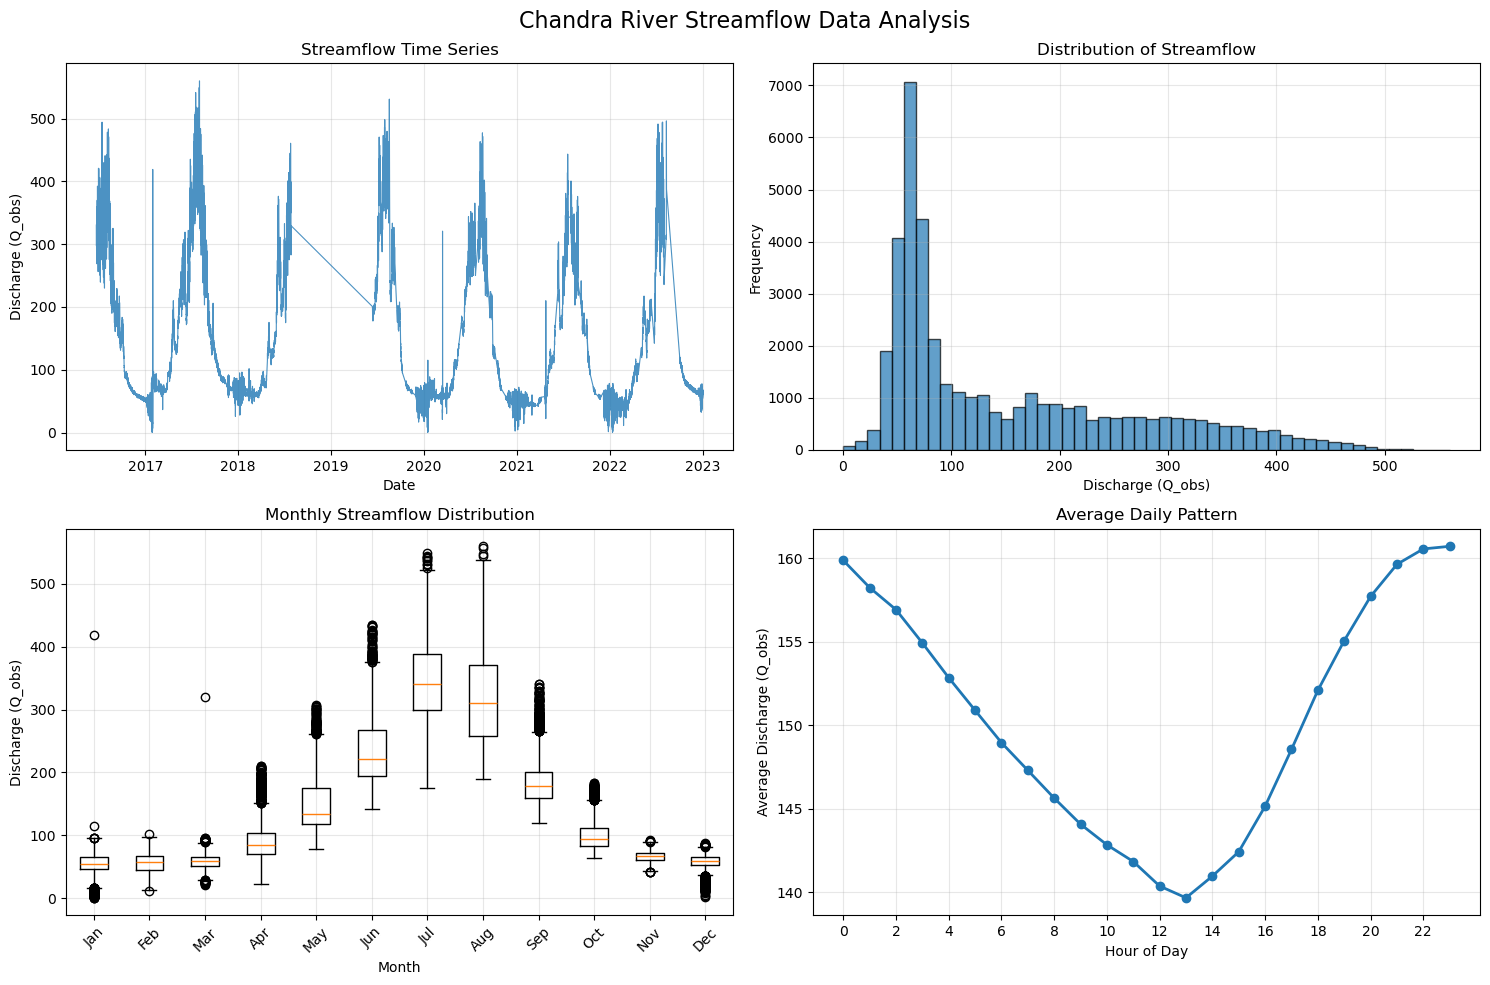

In [4]:
# Create comprehensive streamflow exploration plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Chandra River Streamflow Data Analysis', fontsize=16)

# Plot 1: Time series of streamflow
axes[0,0].plot(df['datetime'], df['Q_obs'], linewidth=0.8, alpha=0.8)
axes[0,0].set_title('Streamflow Time Series')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Discharge (Q_obs)')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Histogram of streamflow values
axes[0,1].hist(df['Q_obs'].dropna(), bins=50, alpha=0.7, edgecolor='black')
axes[0,1].set_title('Distribution of Streamflow')
axes[0,1].set_xlabel('Discharge (Q_obs)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Monthly boxplot
df['month_name'] = df['datetime'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = [df[df['month_name'] == month]['Q_obs'].dropna() for month in month_order if month in df['month_name'].values]
axes[1,0].boxplot(monthly_data, labels=[m[:3] for m in month_order if m in df['month_name'].values])
axes[1,0].set_title('Monthly Streamflow Distribution')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Discharge (Q_obs)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Daily pattern (average by hour of day)
df['hour'] = df['datetime'].dt.hour
hourly_avg = df.groupby('hour')['Q_obs'].mean()
axes[1,1].plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2)
axes[1,1].set_title('Average Daily Pattern')
axes[1,1].set_xlabel('Hour of Day')
axes[1,1].set_ylabel('Average Discharge (Q_obs)')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

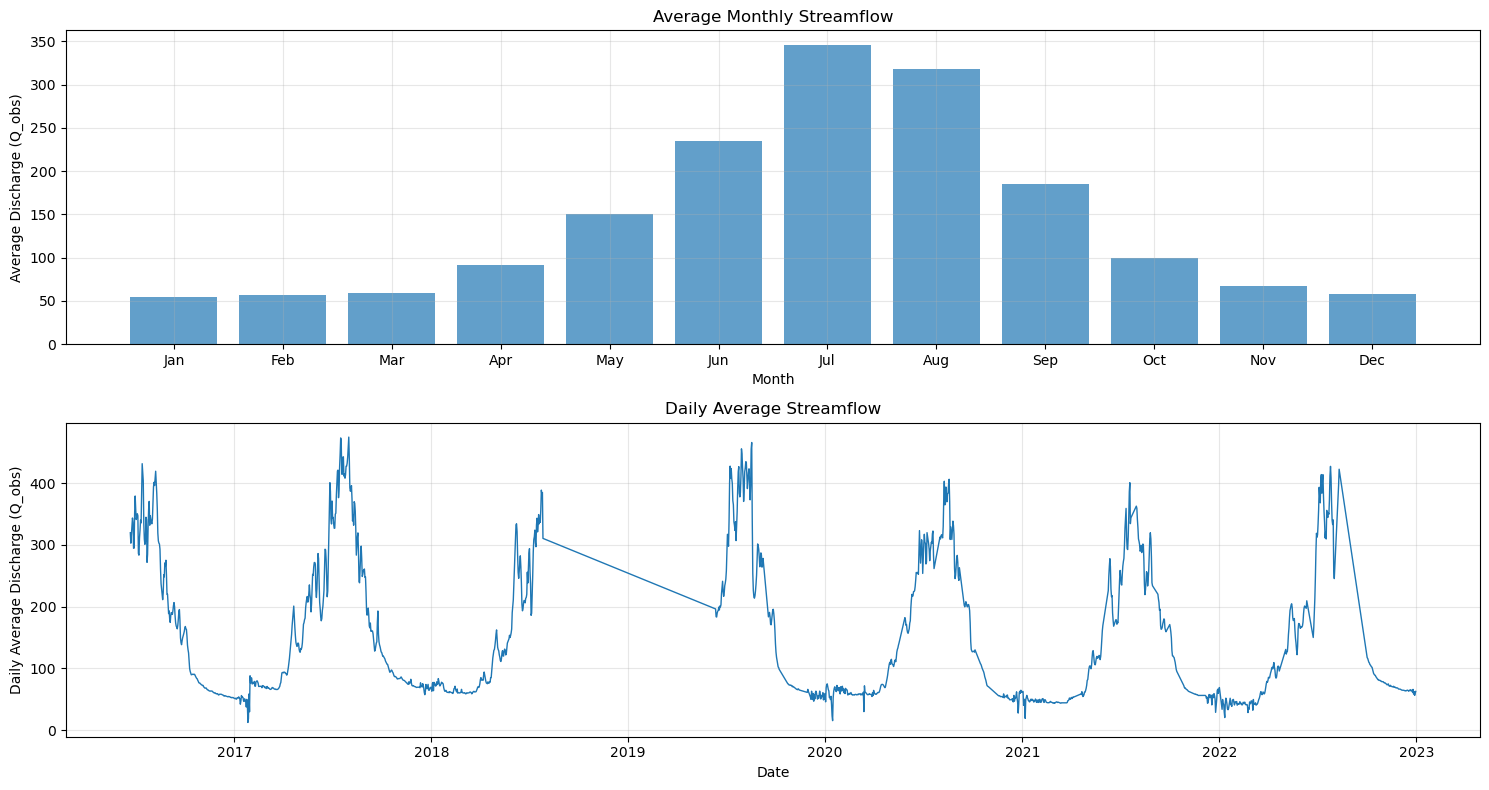

In [5]:
# Additional analysis: Seasonal patterns and trends
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Monthly averages
monthly_avg = df.groupby(df['datetime'].dt.month)['Q_obs'].mean()
axes[0].bar(monthly_avg.index, monthly_avg.values, alpha=0.7)
axes[0].set_title('Average Monthly Streamflow')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Discharge (Q_obs)')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0].grid(True, alpha=0.3)

# Daily aggregated time series
daily_avg = df.groupby(df['datetime'].dt.date)['Q_obs'].mean()
axes[1].plot(daily_avg.index, daily_avg.values, linewidth=1)
axes[1].set_title('Daily Average Streamflow')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Daily Average Discharge (Q_obs)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
# Summary statistics by year and month
print("Summary by year:")
yearly_stats = df.groupby(df['datetime'].dt.year)['Q_obs'].agg(['count', 'mean', 'std', 'min', 'max'])
print(yearly_stats)

print("\nSummary by month:")
monthly_stats = df.groupby(df['datetime'].dt.month)['Q_obs'].agg(['count', 'mean', 'std', 'min', 'max'])
monthly_stats.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
print(monthly_stats)

Summary by year:
          count        mean         std        min         max
datetime                                                      
2016       4605  180.411564  120.563011  49.231415  494.156916
2017       8229  164.904183  117.455162   0.314292  559.860141
2018       4597  138.624723   95.812570  27.836135  460.607563
2019       3790  215.891782  135.301209  16.761814  530.880274
2020       7297  137.793164  105.218880   0.359363  477.175727
2021       6417  125.983885   97.020526   1.439812  443.329142
2022       6591  119.148753  103.211902   0.406725  496.171799

Summary by month:
     count        mean        std         min         max
Jan   3581   54.531171  17.842901    0.314292  418.987809
Feb   3246   56.710408  12.992080   11.243363  101.782309
Mar   3473   58.789725  11.776073   20.933955  320.733465
Apr   2993   91.916921  32.380283   22.248926  210.009504
May   3271  149.911492  42.587723   77.959699  306.963956
Jun   3727  234.667946  54.842487  142.271820  43

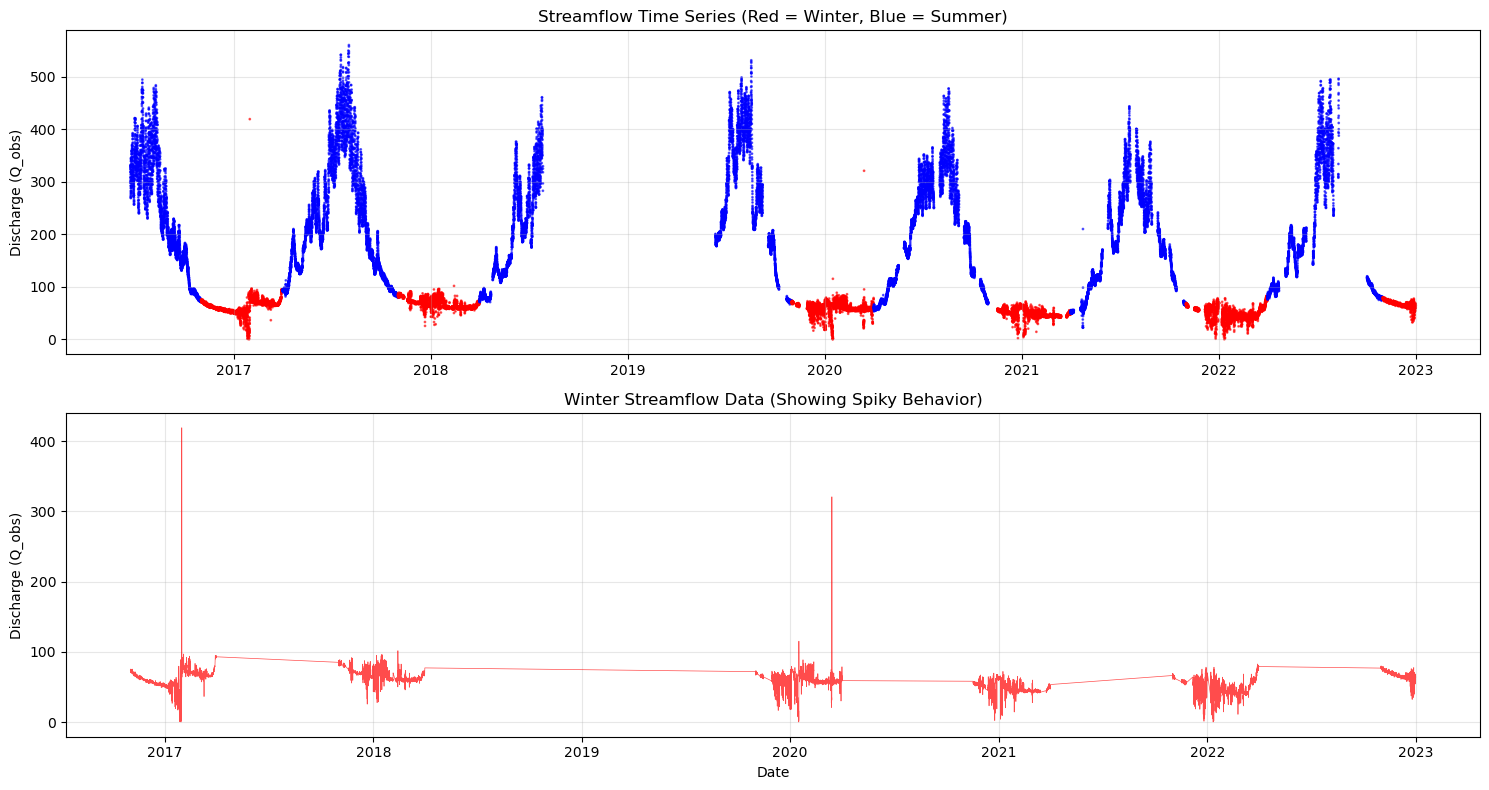

In [7]:
# Data smoothing techniques for winter streamflow data
from scipy import signal
from scipy.ndimage import uniform_filter1d

# First, let's identify winter months and visualize the issue
winter_months = [11, 12, 1, 2, 3]  # Nov-Mar
df['is_winter'] = df['datetime'].dt.month.isin(winter_months)

# Visualize the winter data issue
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Plot 1: Full time series highlighting winter
colors = ['red' if is_winter else 'blue' for is_winter in df['is_winter']]
axes[0].scatter(df['datetime'], df['Q_obs'], c=colors, s=1, alpha=0.6)
axes[0].set_title('Streamflow Time Series (Red = Winter, Blue = Summer)')
axes[0].set_ylabel('Discharge (Q_obs)')
axes[0].grid(True, alpha=0.3)

# Plot 2: Focus on a winter period
winter_data = df[df['is_winter']].copy()
axes[1].plot(winter_data['datetime'], winter_data['Q_obs'], 'r-', alpha=0.7, linewidth=0.5)
axes[1].set_title('Winter Streamflow Data (Showing Spiky Behavior)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Discharge (Q_obs)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# Method 1: Moving Average Smoothing
def apply_moving_average(data, window_size):
    """Apply moving average smoothing"""
    return data.rolling(window=window_size, center=True, min_periods=1).mean()

# Method 2: Savitzky-Golay Filter (preserves peaks better)
def apply_savgol_filter(data, window_length, polyorder):
    """Apply Savitzky-Golay filter"""
    # Window length must be odd
    if window_length % 2 == 0:
        window_length += 1
    return signal.savgol_filter(data, window_length, polyorder)

# Method 3: Median Filter (good for removing outliers)
def apply_median_filter(data, window_size):
    """Apply median filter"""
    return signal.medfilt(data, kernel_size=window_size)

# Method 4: Exponential smoothing
def apply_exponential_smoothing(data, alpha):
    """Apply exponential smoothing"""
    return data.ewm(alpha=alpha).mean()

# Create a copy of the dataframe for smoothing
df_smooth = df.copy()

# Apply different smoothing methods to winter data only
winter_mask = df_smooth['is_winter']

# Parameters for smoothing
window_size = 361  # 24 hours = 1 day
poly_order = 2    # for Savitzky-Golay
alpha = 0.1       # for exponential smoothing

# Apply smoothing only to winter months
df_smooth['Q_obs_ma'] = df_smooth['Q_obs'].copy()
df_smooth['Q_obs_savgol'] = df_smooth['Q_obs'].copy()
df_smooth['Q_obs_median'] = df_smooth['Q_obs'].copy()
df_smooth['Q_obs_exp'] = df_smooth['Q_obs'].copy()

# Apply smoothing to winter data
winter_data = df_smooth[winter_mask]['Q_obs'].values
if len(winter_data) > window_size:
    df_smooth.loc[winter_mask, 'Q_obs_ma'] = apply_moving_average(
        df_smooth.loc[winter_mask, 'Q_obs'], window_size)
    
    df_smooth.loc[winter_mask, 'Q_obs_savgol'] = apply_savgol_filter(
        winter_data, window_size, poly_order)
    
    df_smooth.loc[winter_mask, 'Q_obs_median'] = apply_median_filter(
        winter_data, window_size)
    
    df_smooth.loc[winter_mask, 'Q_obs_exp'] = apply_exponential_smoothing(
        df_smooth.loc[winter_mask, 'Q_obs'], alpha)

print("Smoothing methods applied to winter data")

Smoothing methods applied to winter data


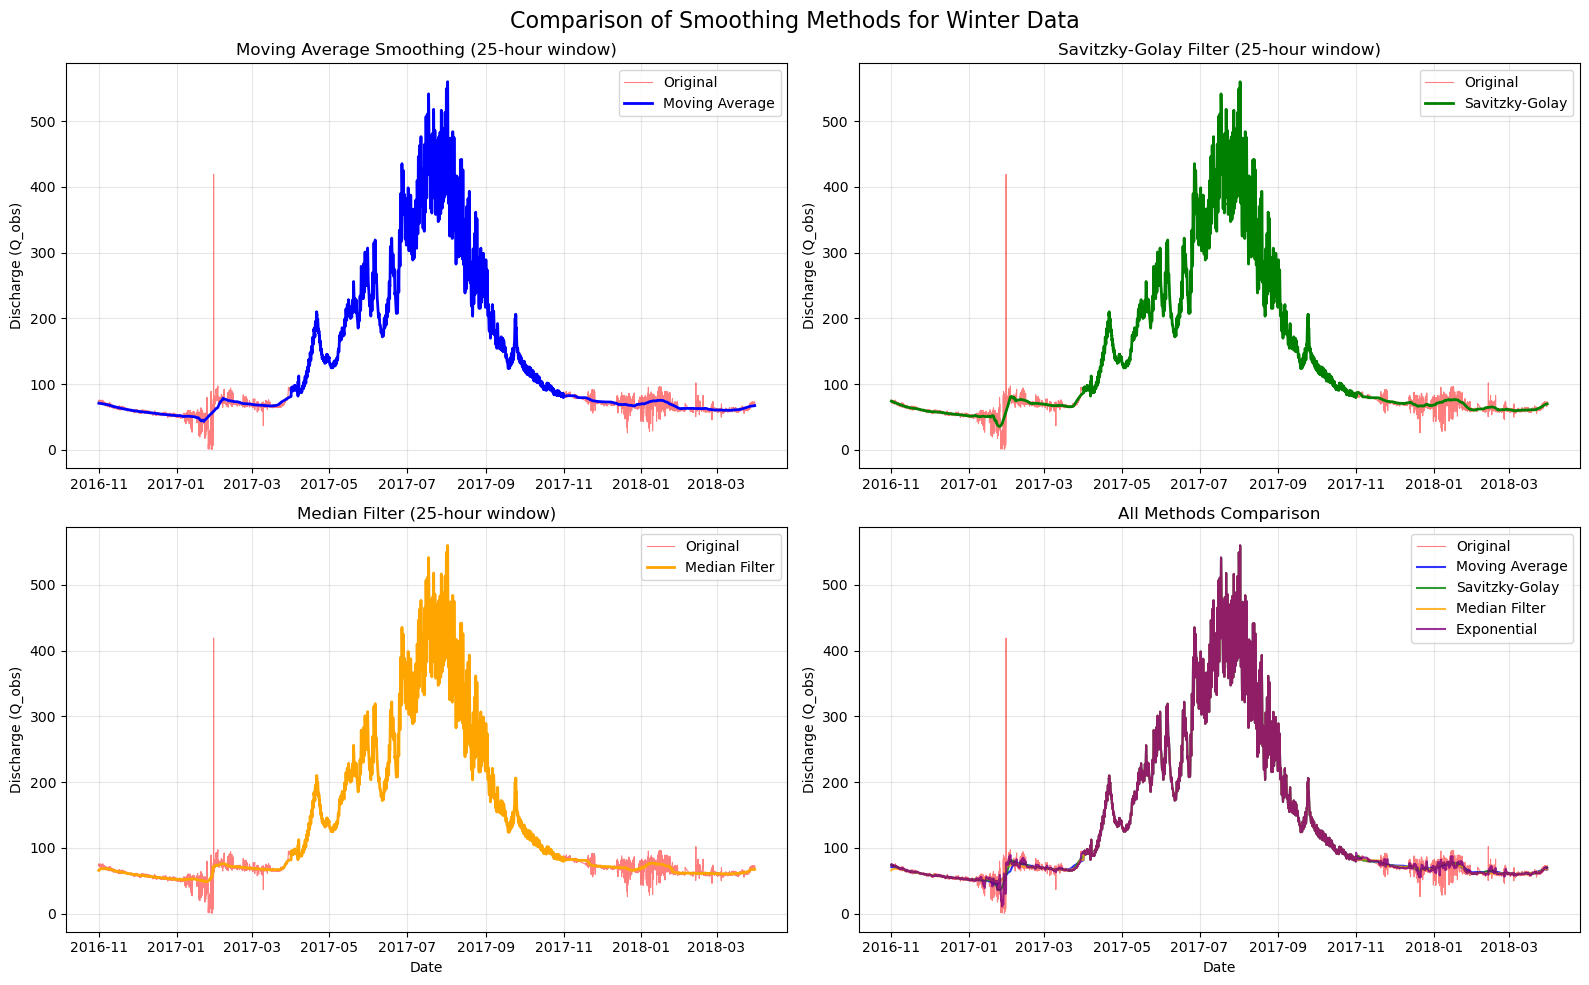

In [9]:
# Compare smoothing methods
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Comparison of Smoothing Methods for Winter Data', fontsize=16)

# Select a winter period for detailed comparison
start_date = '2016-11-01'
end_date = '2018-03-31'
mask = (df_smooth['datetime'] >= start_date) & (df_smooth['datetime'] <= end_date)
plot_data = df_smooth[mask]

# Plot 1: Moving Average vs Original
axes[0,0].plot(plot_data['datetime'], plot_data['Q_obs'], color='red', alpha=0.5, linewidth=0.8, label='Original')
axes[0,0].plot(plot_data['datetime'], plot_data['Q_obs_ma'], color='blue', linewidth=2, label='Moving Average')
axes[0,0].set_title('Moving Average Smoothing (25-hour window)')
axes[0,0].set_ylabel('Discharge (Q_obs)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Savitzky-Golay vs Original
axes[0,1].plot(plot_data['datetime'], plot_data['Q_obs'], color='red', alpha=0.5, linewidth=0.8, label='Original')
axes[0,1].plot(plot_data['datetime'], plot_data['Q_obs_savgol'], color='green', linewidth=2, label='Savitzky-Golay')
axes[0,1].set_title('Savitzky-Golay Filter (25-hour window)')
axes[0,1].set_ylabel('Discharge (Q_obs)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Median Filter vs Original
axes[1,0].plot(plot_data['datetime'], plot_data['Q_obs'], color='red', alpha=0.5, linewidth=0.8, label='Original')
axes[1,0].plot(plot_data['datetime'], plot_data['Q_obs_median'], color='orange', linewidth=2, label='Median Filter')
axes[1,0].set_title('Median Filter (25-hour window)')
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Discharge (Q_obs)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 4: All methods comparison
methods = [
    ('Original', 'Q_obs', 'red', 0.5, 0.8),
    ('Moving Average', 'Q_obs_ma', 'blue', 0.8, 1.5),
    ('Savitzky-Golay', 'Q_obs_savgol', 'green', 0.8, 1.5),
    ('Median Filter', 'Q_obs_median', 'orange', 0.8, 1.5),
    ('Exponential', 'Q_obs_exp', 'purple', 0.8, 1.5)
]

for name, col, color, alpha, linewidth in methods:
    if col in plot_data.columns:
        axes[1,1].plot(plot_data['datetime'], plot_data[col], 
                      color=color, alpha=alpha, linewidth=linewidth, label=name)

axes[1,1].set_title('All Methods Comparison')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Discharge (Q_obs)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Daily aggregation methods for streamflow data
def aggregate_hourly_to_daily(df, date_col='datetime', flow_col='Q_obs'):
    """
    Convert hourly streamflow data to daily using multiple aggregation methods
    """
    # Create date column for grouping
    df_daily = df.copy()
    df_daily['date'] = df_daily[date_col].dt.date
    
    # Method 1: Simple daily mean
    daily_mean = df_daily.groupby('date')[flow_col].mean().reset_index()
    daily_mean.columns = ['date', 'Q_daily_mean']
    
    # Method 2: Daily statistics (min, max, mean, median)
    daily_stats = df_daily.groupby('date')[flow_col].agg([
        'mean', 'median', 'min', 'max', 'std', 'count'
    ]).reset_index()
    daily_stats.columns = ['date', 'Q_mean', 'Q_median', 'Q_min', 'Q_max', 'Q_std', 'Q_count']
    
    # Method 3: Flow-weighted average (if you have precipitation data)
    # For now, just use mean as proxy
    daily_stats['Q_flow_weighted'] = daily_stats['Q_mean']
    
    # Method 4: Time-weighted average accounting for missing data
    def time_weighted_mean(group):
        if len(group) < 12:  # Less than 12 hours of data
            return np.nan
        else:
            return group.mean()
    
    daily_time_weighted = df_daily.groupby('date')[flow_col].apply(time_weighted_mean).reset_index()
    daily_time_weighted.columns = ['date', 'Q_time_weighted']
    
    # Combine all methods
    result = daily_mean.merge(daily_stats, on='date').merge(daily_time_weighted, on='date')
    result['date'] = pd.to_datetime(result['date'])
    
    return result

# Apply daily aggregation
daily_flow = aggregate_hourly_to_daily(df_final, flow_col='Q_obs_final')

print("Daily aggregation methods applied:")
print(f"Original hourly data points: {len(df_final)}")
print(f"Resulting daily data points: {len(daily_flow)}")
print("\nFirst few rows of daily data:")
print(daily_flow.head())

Daily aggregation methods applied:
Original hourly data points: 41526
Resulting daily data points: 1786

First few rows of daily data:
        date  Q_daily_mean      Q_mean    Q_median       Q_min       Q_max  \
0 2016-06-22    319.518916  319.518916  325.675821  297.908384  331.248595   
1 2016-06-23    302.635713  302.635713  300.513329  268.884939  344.974207   
2 2016-06-24    316.556867  316.556867  315.587458  277.523357  359.716149   
3 2016-06-25    328.474440  328.474440  327.884986  290.204190  369.931348   
4 2016-06-26    343.409945  343.409945  342.500459  302.820115  392.348299   

       Q_std  Q_count  Q_flow_weighted  Q_time_weighted  
0  12.755457       10       319.518916              NaN  
1  25.949416       24       302.635713       302.635713  
2  27.471022       24       316.556867       316.556867  
3  27.601963       24       328.474440       328.474440  
4  29.325122       24       343.409945       343.409945  


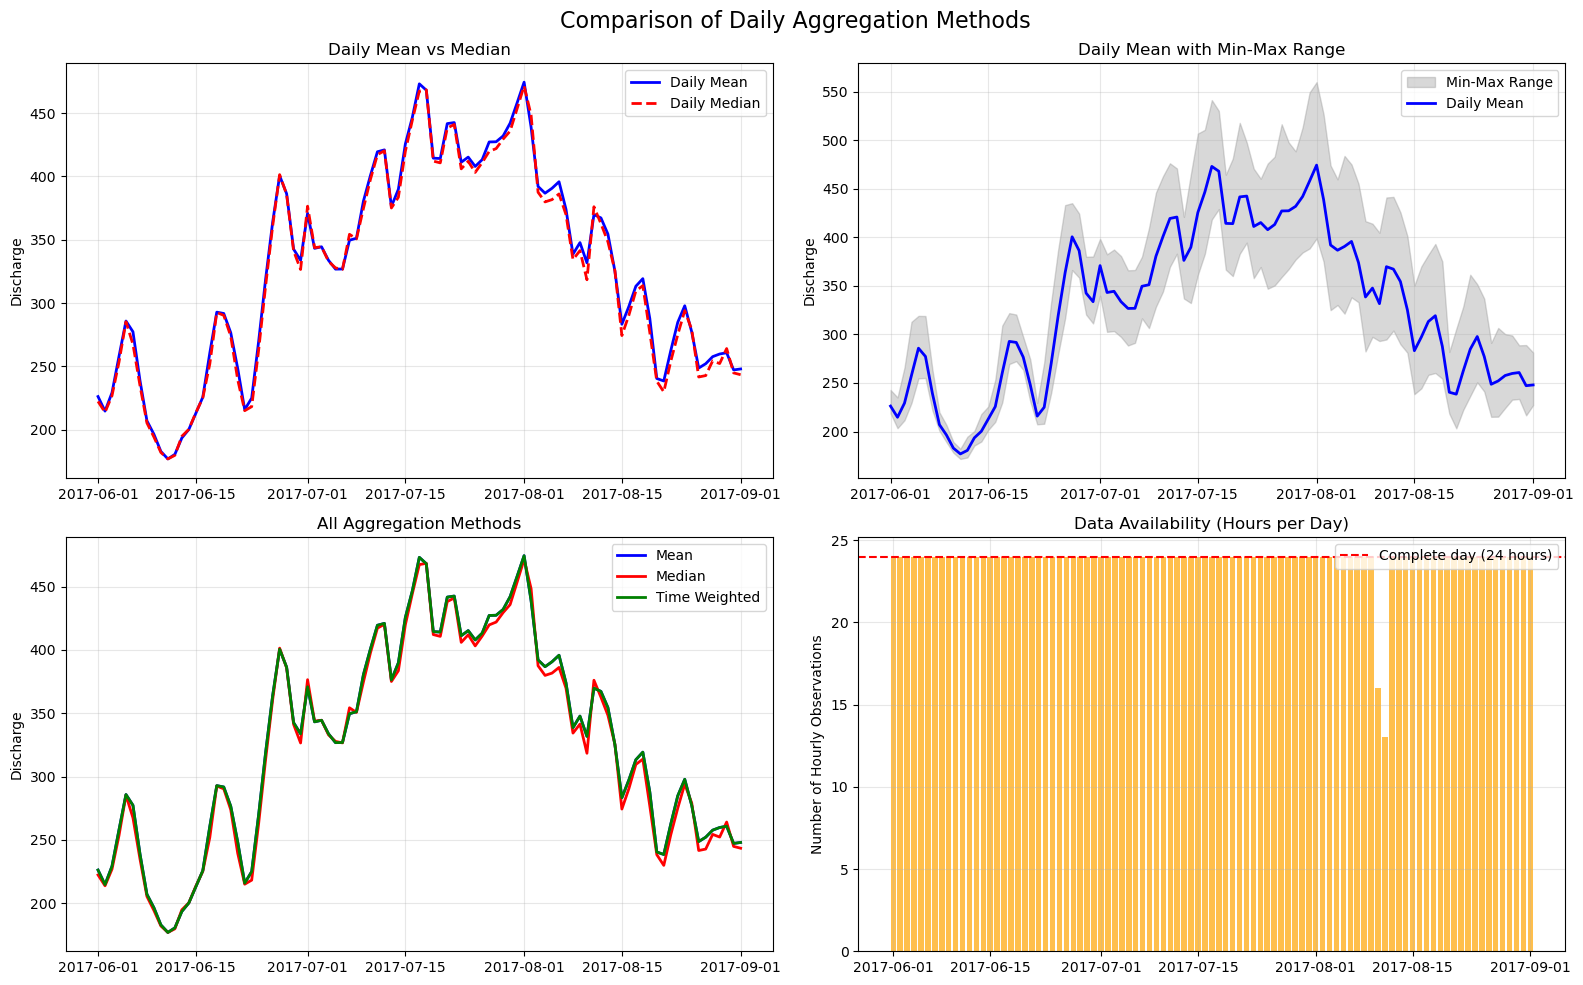

In [13]:
# Compare different daily aggregation methods
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Comparison of Daily Aggregation Methods', fontsize=16)

# Select a period for comparison
start_date = '2017-06-01'
end_date = '2017-09-01'
mask = (daily_flow['date'] >= start_date) & (daily_flow['date'] <= end_date)
plot_data = daily_flow[mask]

# Plot 1: Mean vs Median
axes[0,0].plot(plot_data['date'], plot_data['Q_mean'], 'b-', linewidth=2, label='Daily Mean')
axes[0,0].plot(plot_data['date'], plot_data['Q_median'], 'r--', linewidth=2, label='Daily Median')
axes[0,0].set_title('Daily Mean vs Median')
axes[0,0].set_ylabel('Discharge')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Mean with error bars (min/max)
axes[0,1].fill_between(plot_data['date'], plot_data['Q_min'], plot_data['Q_max'], 
                       alpha=0.3, color='gray', label='Min-Max Range')
axes[0,1].plot(plot_data['date'], plot_data['Q_mean'], 'b-', linewidth=2, label='Daily Mean')
axes[0,1].set_title('Daily Mean with Min-Max Range')
axes[0,1].set_ylabel('Discharge')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Compare all methods
methods = [
    ('Mean', 'Q_mean', 'blue'),
    ('Median', 'Q_median', 'red'),
    ('Time Weighted', 'Q_time_weighted', 'green')
]

for name, col, color in methods:
    if col in plot_data.columns:
        axes[1,0].plot(plot_data['date'], plot_data[col], 
                      color=color, linewidth=2, label=name)

axes[1,0].set_title('All Aggregation Methods')
axes[1,0].set_ylabel('Discharge')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Data availability (number of hourly observations per day)
axes[1,1].bar(plot_data['date'], plot_data['Q_count'], alpha=0.7, color='orange')
axes[1,1].axhline(y=24, color='red', linestyle='--', label='Complete day (24 hours)')
axes[1,1].set_title('Data Availability (Hours per Day)')
axes[1,1].set_ylabel('Number of Hourly Observations')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
# Quality assessment of daily aggregation
def assess_daily_quality(daily_df):
    """
    Assess the quality of daily aggregated data
    """
    print("Daily Data Quality Assessment:")
    print("="*50)
    
    # Check data completeness
    complete_days = (daily_df['Q_count'] == 24).sum()
    partial_days = (daily_df['Q_count'] < 24).sum()
    total_days = len(daily_df)
    
    print(f"Complete days (24 hours): {complete_days} ({complete_days/total_days*100:.1f}%)")
    print(f"Partial days (<24 hours): {partial_days} ({partial_days/total_days*100:.1f}%)")
    
    # Compare aggregation methods
    methods = ['Q_mean', 'Q_median', 'Q_time_weighted']
    print(f"\nCorrelation between aggregation methods:")
    correlation_matrix = daily_df[methods].corr()
    print(correlation_matrix.round(3))
    
    # Seasonal analysis
    daily_df['month'] = daily_df['date'].dt.month
    seasonal_stats = daily_df.groupby('month')[methods].mean()
    
    print(f"\nSeasonal patterns (monthly averages):")
    seasonal_stats.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    print(seasonal_stats.round(2))
    
    return correlation_matrix, seasonal_stats

# Assess quality
corr_matrix, seasonal_patterns = assess_daily_quality(daily_flow)

Daily Data Quality Assessment:
Complete days (24 hours): 1648 (92.3%)
Partial days (<24 hours): 138 (7.7%)

Correlation between aggregation methods:
                 Q_mean  Q_median  Q_time_weighted
Q_mean              1.0       1.0              1.0
Q_median            1.0       1.0              1.0
Q_time_weighted     1.0       1.0              1.0

Seasonal patterns (monthly averages):
     Q_mean  Q_median  Q_time_weighted
Jan   54.70     55.11            54.68
Feb   56.70     56.65            56.58
Mar   58.56     58.47            58.66
Apr   91.92     91.56            91.74
May  149.56    148.85           149.67
Jun  234.62    233.15           234.46
Jul  344.27    341.44           345.01
Aug  317.52    313.86           317.85
Sep  185.73    184.70           184.50
Oct   99.33     99.09            99.07
Nov   67.18     67.17            67.01
Dec   58.87     58.98            58.46


In [15]:
# Recommendation function for choosing best daily aggregation method
def recommend_daily_method(daily_df, flow_type='glacial'):
    """
    Recommend the best daily aggregation method based on data characteristics
    """
    print("Recommendation for Daily Streamflow Aggregation:")
    print("="*60)
    
    if flow_type == 'glacial':
        print("For GLACIAL/SNOWMELT rivers (like Chandra):")
        print("✅ RECOMMENDED: Daily Mean (Q_mean)")
        print("   - Captures the full diurnal cycle")
        print("   - Represents total daily water volume")
        print("   - Standard in glacial hydrology")
        print("   - Good for water balance calculations")
        
        print("\n📊 Alternative considerations:")
        print("   - Use Q_median for heavily skewed data")
        print("   - Use Q_time_weighted when data gaps exist")
        print("   - Include Q_max for flood analysis")
        print("   - Include Q_min for low-flow analysis")
    
    # Check for outliers that might suggest using median
    mean_vals = daily_df['Q_mean'].dropna()
    median_vals = daily_df['Q_median'].dropna()
    skewness = mean_vals.skew()
    
    print(f"\n📈 Data characteristics:")
    print(f"   - Skewness: {skewness:.2f}")
    if abs(skewness) > 1:
        print("   - High skewness detected → Consider using Q_median")
    else:
        print("   - Normal distribution → Q_mean is appropriate")
    
    # Final recommendation
    recommended_col = 'Q_mean'  # Default for glacial rivers
    
    return recommended_col

# Get recommendation
recommended_method = recommend_daily_method(daily_flow, flow_type='glacial')

Recommendation for Daily Streamflow Aggregation:
For GLACIAL/SNOWMELT rivers (like Chandra):
✅ RECOMMENDED: Daily Mean (Q_mean)
   - Captures the full diurnal cycle
   - Represents total daily water volume
   - Standard in glacial hydrology
   - Good for water balance calculations

📊 Alternative considerations:
   - Use Q_median for heavily skewed data
   - Use Q_time_weighted when data gaps exist
   - Include Q_max for flood analysis
   - Include Q_min for low-flow analysis

📈 Data characteristics:
   - Skewness: 0.99
   - Normal distribution → Q_mean is appropriate


In [16]:
# Create final daily dataset with best practices
def create_final_daily_dataset(df_hourly, daily_df, recommended_col='Q_mean'):
    """
    Create the final daily streamflow dataset
    """
    # Start with the recommended daily values
    final_daily = daily_df[['date', recommended_col, 'Q_count']].copy()
    final_daily.rename(columns={recommended_col: 'Q_daily'}, inplace=True)
    
    # Add quality flags
    final_daily['data_quality'] = 'Good'
    final_daily.loc[final_daily['Q_count'] < 20, 'data_quality'] = 'Fair'  # Less than 20 hours
    final_daily.loc[final_daily['Q_count'] < 12, 'data_quality'] = 'Poor'  # Less than 12 hours
    
    # Add seasonal information
    final_daily['month'] = final_daily['date'].dt.month
    final_daily['season'] = final_daily['month'].map({
        12: 'Winter', 1: 'Winter', 2: 'Winter',
        3: 'Spring', 4: 'Spring', 5: 'Spring',
        6: 'Summer', 7: 'Summer', 8: 'Summer',
        9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
    })
    
    # Add water year (Oct 1 - Sep 30 for Northern Hemisphere)
    final_daily['water_year'] = final_daily['date'].dt.year
    final_daily.loc[final_daily['date'].dt.month >= 10, 'water_year'] += 1
    
    return final_daily

# Create final daily dataset
daily_final = create_final_daily_dataset(df_final, daily_flow, recommended_method)

print("Final daily dataset created:")
print(f"Shape: {daily_final.shape}")
print("\nData quality distribution:")
print(daily_final['data_quality'].value_counts())
print("\nFirst few rows:")
print(daily_final.head())

Final daily dataset created:
Shape: (1786, 7)

Data quality distribution:
data_quality
Good    1695
Poor      50
Fair      41
Name: count, dtype: int64

First few rows:
        date     Q_daily  Q_count data_quality  month  season  water_year
0 2016-06-22  319.518916       10         Poor      6  Summer        2016
1 2016-06-23  302.635713       24         Good      6  Summer        2016
2 2016-06-24  316.556867       24         Good      6  Summer        2016
3 2016-06-25  328.474440       24         Good      6  Summer        2016
4 2016-06-26  343.409945       24         Good      6  Summer        2016


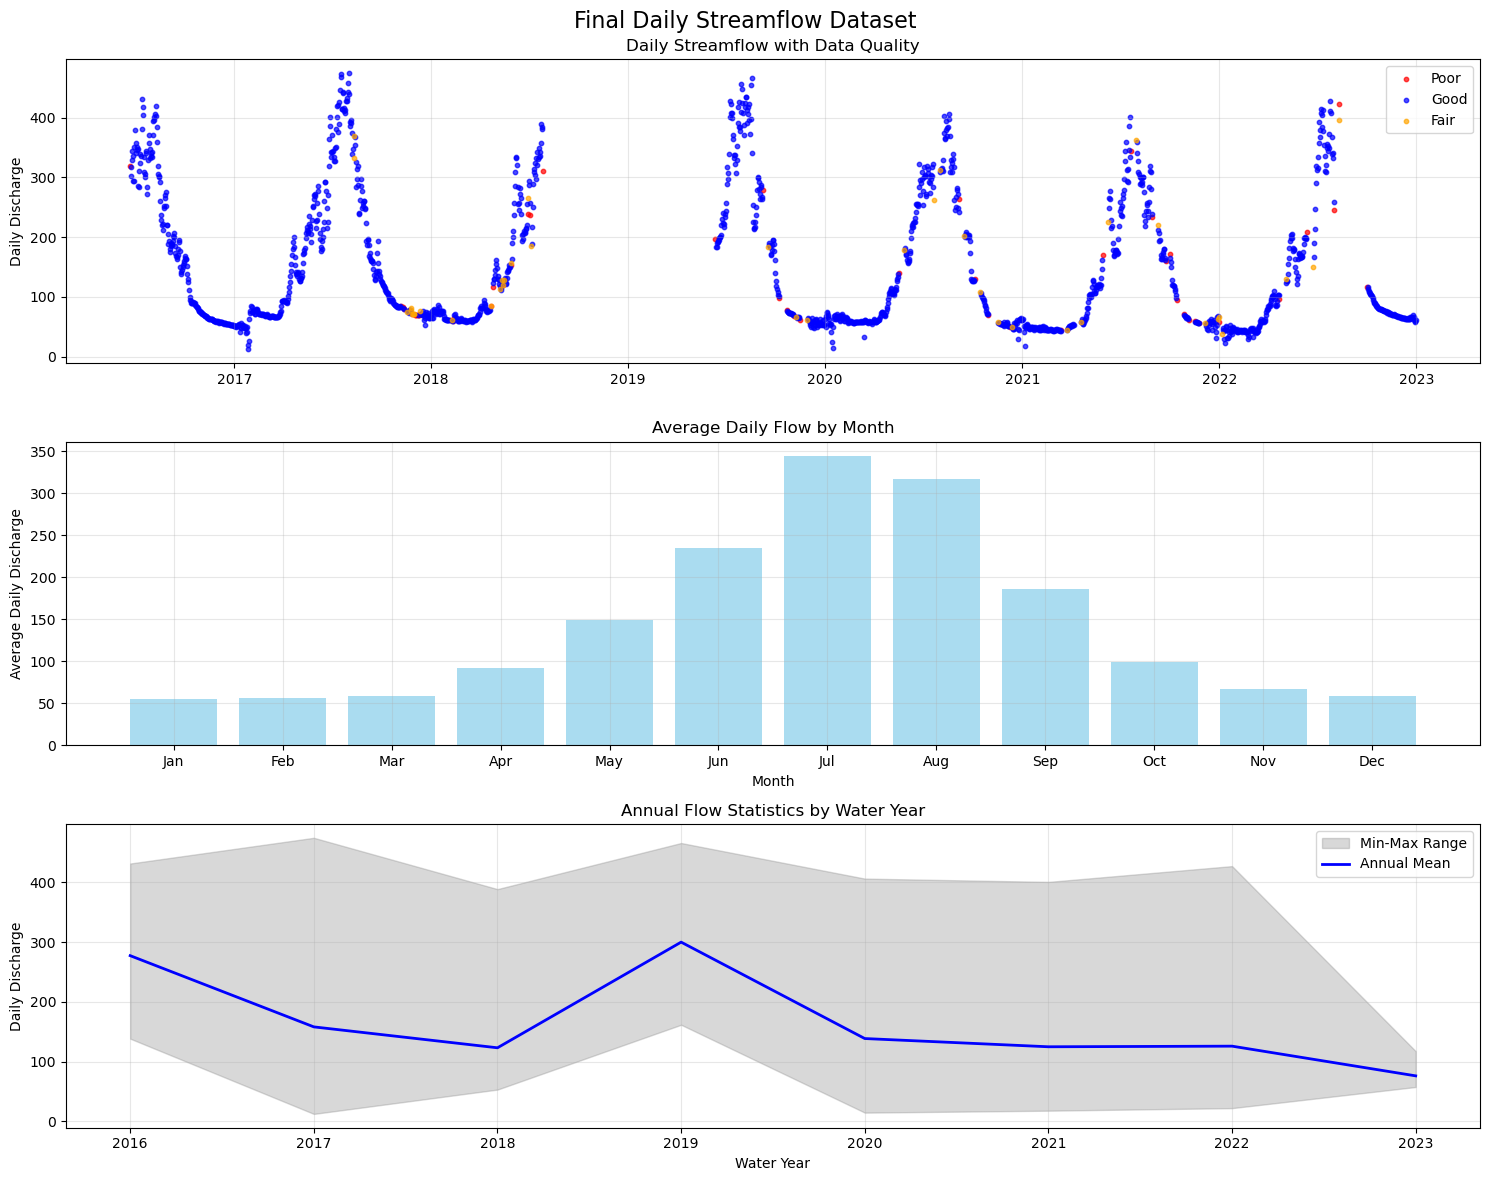

In [17]:
# Visualize final daily streamflow
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('Final Daily Streamflow Dataset', fontsize=16)

# Plot 1: Full time series
colors = {'Good': 'blue', 'Fair': 'orange', 'Poor': 'red'}
for quality in daily_final['data_quality'].unique():
    subset = daily_final[daily_final['data_quality'] == quality]
    axes[0].scatter(subset['date'], subset['Q_daily'], 
                   c=colors[quality], label=quality, s=10, alpha=0.7)

axes[0].set_title('Daily Streamflow with Data Quality')
axes[0].set_ylabel('Daily Discharge')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Seasonal patterns
seasonal_avg = daily_final.groupby('month')['Q_daily'].mean()
axes[1].bar(seasonal_avg.index, seasonal_avg.values, alpha=0.7, color='skyblue')
axes[1].set_title('Average Daily Flow by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Daily Discharge')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].grid(True, alpha=0.3)

# Plot 3: Annual patterns
annual_stats = daily_final.groupby('water_year')['Q_daily'].agg(['mean', 'min', 'max'])
axes[2].fill_between(annual_stats.index, annual_stats['min'], annual_stats['max'], 
                    alpha=0.3, color='gray', label='Min-Max Range')
axes[2].plot(annual_stats.index, annual_stats['mean'], 'b-', linewidth=2, label='Annual Mean')
axes[2].set_title('Annual Flow Statistics by Water Year')
axes[2].set_xlabel('Water Year')
axes[2].set_ylabel('Daily Discharge')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
# Apply smoothing to daily winter data
def smooth_daily_winter_data(daily_df, winter_months=[11, 12, 1, 2, 3]):
    """
    Apply smoothing to daily streamflow data during winter months
    """
    df_smooth = daily_df.copy()
    
    # Identify winter data
    df_smooth['month'] = df_smooth['date'].dt.month
    df_smooth['is_winter'] = df_smooth['month'].isin(winter_months)
    
    # Initialize smoothed column
    df_smooth['Q_daily_smoothed'] = df_smooth['Q_daily'].copy()
    
    # Apply smoothing only to winter data
    winter_mask = df_smooth['is_winter']
    
    if winter_mask.sum() > 0:
        # Method 1: Rolling median (removes outliers)
        df_smooth.loc[winter_mask, 'Q_daily_median'] = (
            df_smooth.loc[winter_mask, 'Q_daily']
            .rolling(window=40, center=True, min_periods=3)
            .median()
        )
        
        # Method 2: Rolling mean with smaller window
        df_smooth.loc[winter_mask, 'Q_daily_mean_smooth'] = (
            df_smooth.loc[winter_mask, 'Q_daily']
            .rolling(window=40, center=True, min_periods=2)
            .mean()
        )
        
        # Method 3: Exponential smoothing
        df_smooth.loc[winter_mask, 'Q_daily_exp'] = (
            df_smooth.loc[winter_mask, 'Q_daily']
            .ewm(span=30, adjust=False)
            .mean()
        )
        
        # Choose the best method (median filter for winter)
        df_smooth.loc[winter_mask, 'Q_daily_smoothed'] = df_smooth.loc[winter_mask, 'Q_daily_median']
    
    return df_smooth

# Apply smoothing to daily data
daily_smoothed = smooth_daily_winter_data(daily_final)

print("Daily winter smoothing applied")
print(f"Winter days identified: {daily_smoothed['is_winter'].sum()}")

Daily winter smoothing applied
Winter days identified: 736


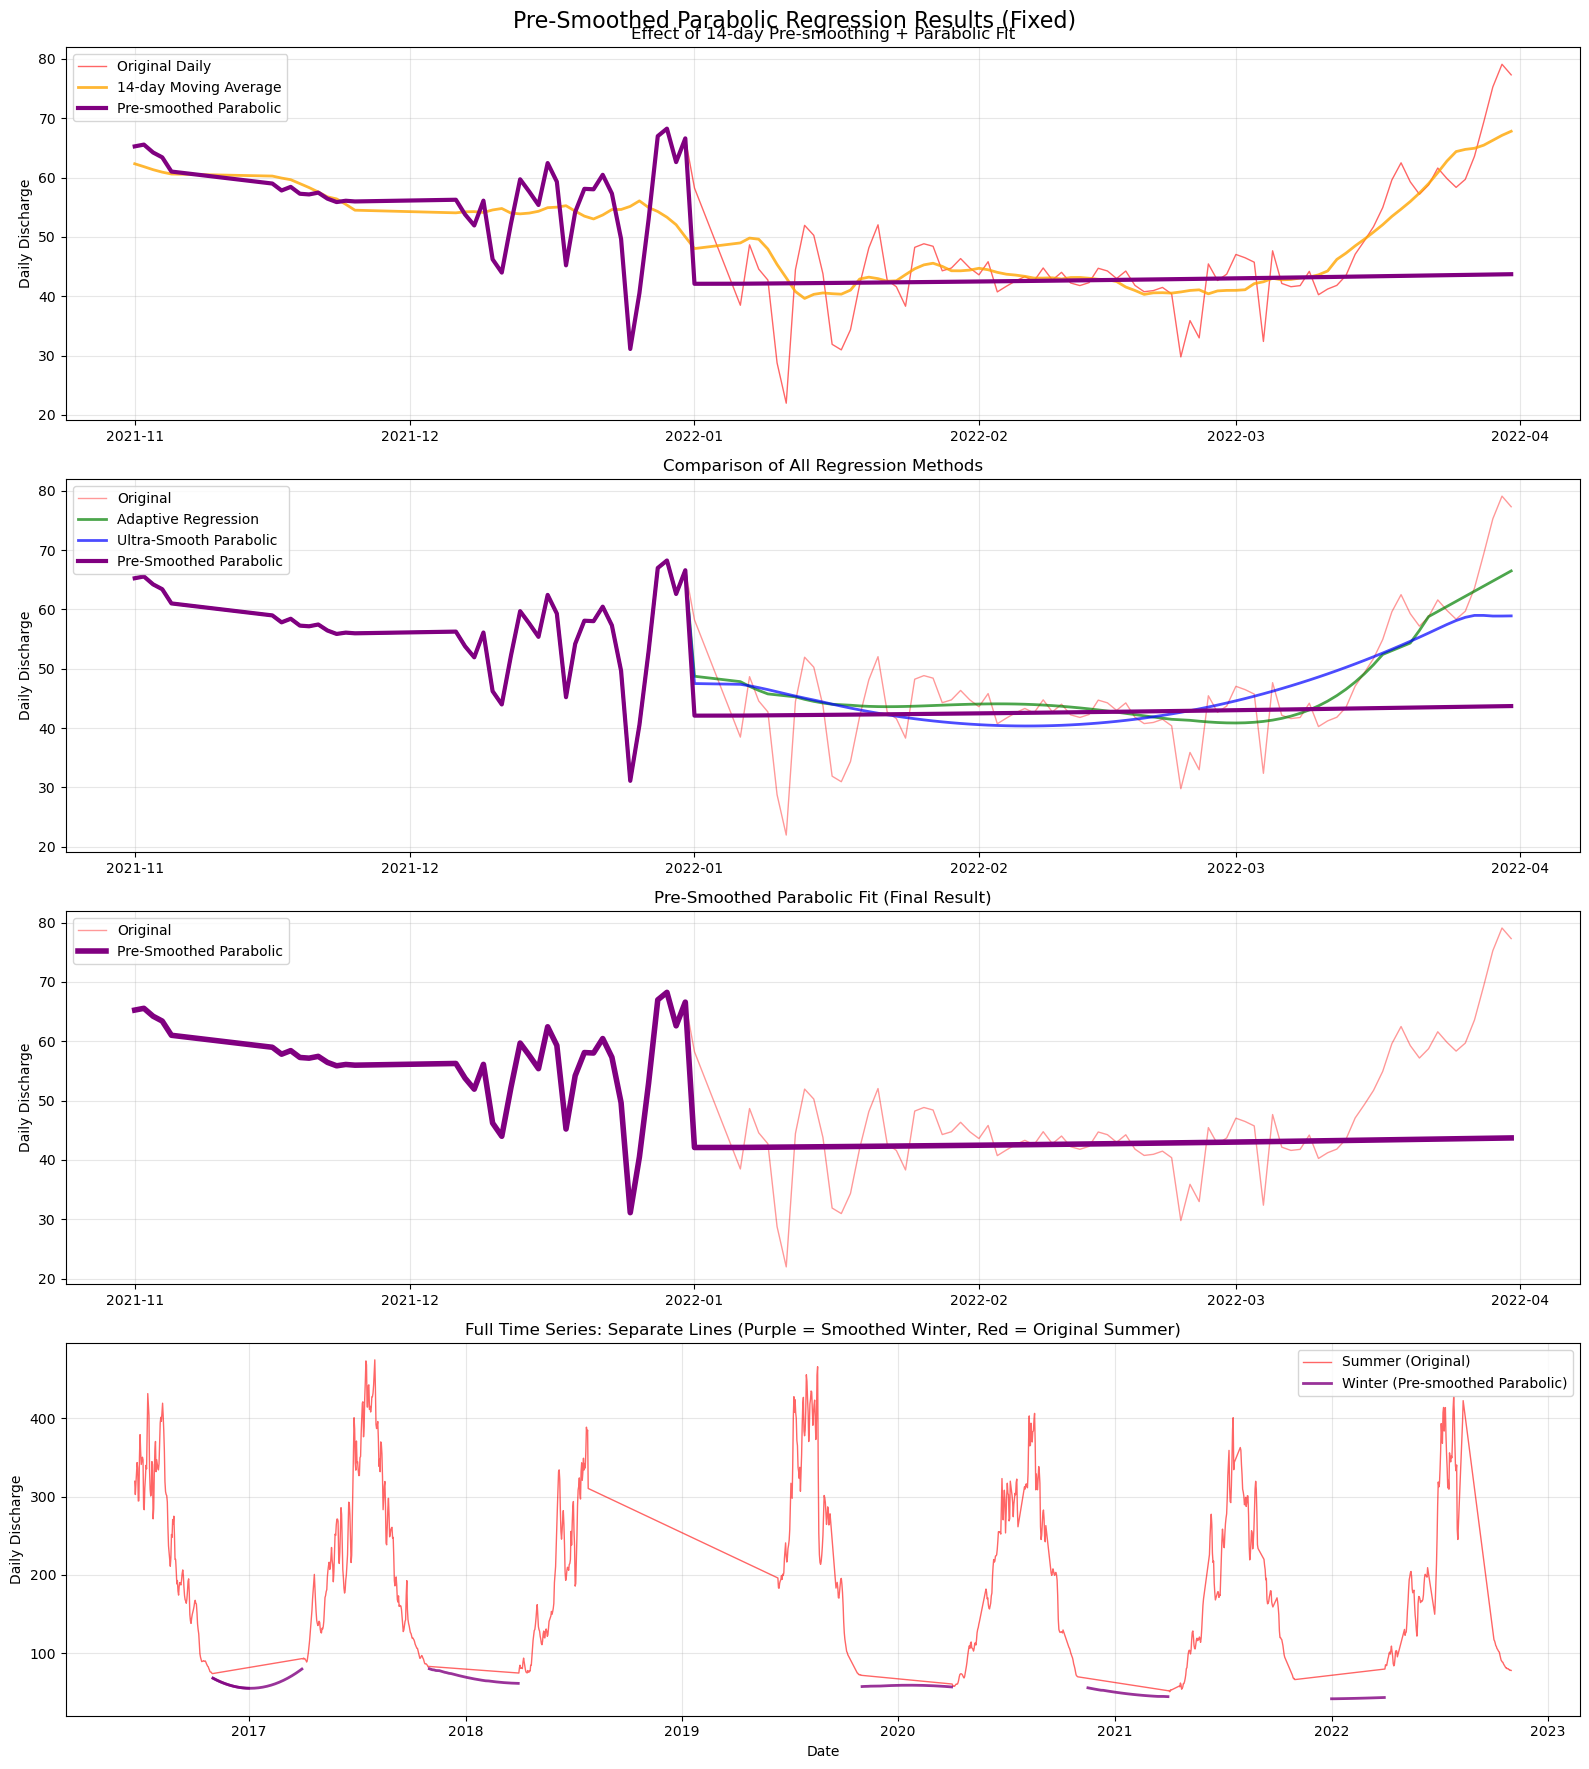

✅ Fixed visualization - no more connecting lines between seasons!
   - Each winter period is plotted as a separate line segment
   - Summer data is plotted as one continuous line
   - No artificial connections between winter and summer periods


In [25]:
# Fixed visualization - plot each winter period separately to avoid connecting lines
fig, axes = plt.subplots(4, 1, figsize=(16, 18))
fig.suptitle('Pre-Smoothed Parabolic Regression Results (Fixed)', fontsize=16)

# Select a winter period for comparison
winter_period = (daily_pre_smooth['date'] >= '2021-11-01') & (daily_pre_smooth['date'] <= '2022-03-31')
winter_plot = daily_pre_smooth[winter_period]

# Plot 1: Show the effect of pre-smoothing
axes[0].plot(winter_plot['date'], winter_plot['Q_daily'], 'r-', alpha=0.6, linewidth=1, label='Original Daily')
# Add 14-day moving average for comparison
winter_plot_ma = winter_plot.copy()
winter_plot_ma['Q_ma_14'] = winter_plot_ma['Q_daily'].rolling(window=14, center=True, min_periods=3).mean()
axes[0].plot(winter_plot['date'], winter_plot_ma['Q_ma_14'], 'orange', linewidth=2, alpha=0.8, label='14-day Moving Average')
axes[0].plot(winter_plot['date'], winter_plot['Q_daily_pre_smooth_parabolic'], 'purple', linewidth=3, label='Pre-smoothed Parabolic')
axes[0].set_title('Effect of 14-day Pre-smoothing + Parabolic Fit')
axes[0].set_ylabel('Daily Discharge')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Compare all regression methods
axes[1].plot(winter_plot['date'], winter_plot['Q_daily'], 'r-', alpha=0.4, linewidth=1, label='Original')
if 'Q_daily_regression_adaptive' in daily_adaptive.columns:
    adapt_data = daily_adaptive[winter_period]
    axes[1].plot(adapt_data['date'], adapt_data['Q_daily_regression_adaptive'], 'g-', linewidth=2, alpha=0.7, label='Adaptive Regression')
if 'Q_daily_smooth_parabolic' in daily_ultra_smooth.columns:
    ultra_data = daily_ultra_smooth[winter_period]
    axes[1].plot(ultra_data['date'], ultra_data['Q_daily_smooth_parabolic'], 'blue', linewidth=2, alpha=0.7, label='Ultra-Smooth Parabolic')
axes[1].plot(winter_plot['date'], winter_plot['Q_daily_pre_smooth_parabolic'], 'purple', linewidth=3, label='Pre-Smoothed Parabolic')
axes[1].set_title('Comparison of All Regression Methods')
axes[1].set_ylabel('Daily Discharge')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Focus on final result
axes[2].plot(winter_plot['date'], winter_plot['Q_daily'], 'r-', alpha=0.4, linewidth=1, label='Original')
axes[2].plot(winter_plot['date'], winter_plot['Q_daily_pre_smooth_parabolic'], 'purple', linewidth=4, label='Pre-Smoothed Parabolic')
axes[2].set_title('Pre-Smoothed Parabolic Fit (Final Result)')
axes[2].set_ylabel('Daily Discharge')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Plot 4: Full time series with SEPARATE LINES for each season (no connecting between seasons)
# Plot summer data first
summer_data = daily_pre_smooth[~daily_pre_smooth['is_winter']].copy()
axes[3].plot(summer_data['date'], summer_data['Q_daily'], 
            'red', linewidth=1, alpha=0.6, label='Summer (Original)')

# Plot each winter period separately to avoid connecting lines
winter_data = daily_pre_smooth[daily_pre_smooth['is_winter']].copy()

# Get unique winter years and plot each separately
winter_data['year'] = winter_data['date'].dt.year
winter_years = winter_data['year'].unique()

for i, year in enumerate(winter_years):
    # Get winter data for this specific year
    if year == winter_years.min():
        # First year: only Nov-Dec
        year_mask = (winter_data['year'] == year) & (winter_data['date'].dt.month.isin([11, 12]))
    elif year == winter_years.max():
        # Last year: only Jan-Mar
        year_mask = (winter_data['year'] == year) & (winter_data['date'].dt.month.isin([1, 2, 3]))
    else:
        # Middle years: get both Nov-Dec from previous year and Jan-Mar from current year
        prev_year_mask = (winter_data['year'] == year-1) & (winter_data['date'].dt.month.isin([11, 12]))
        curr_year_mask = (winter_data['year'] == year) & (winter_data['date'].dt.month.isin([1, 2, 3]))
        year_mask = prev_year_mask | curr_year_mask
    
    year_winter_data = winter_data[year_mask].copy()
    
    if len(year_winter_data) > 0:
        year_winter_data = year_winter_data.sort_values('date')
        # Only show label for first winter period
        label = 'Winter (Pre-smoothed Parabolic)' if i == 0 else None
        axes[3].plot(year_winter_data['date'], year_winter_data['Q_daily_pre_smooth_parabolic'], 
                    'purple', linewidth=2, alpha=0.8, label=label)

axes[3].set_title('Full Time Series: Separate Lines (Purple = Smoothed Winter, Red = Original Summer)')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Daily Discharge')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Fixed visualization - no more connecting lines between seasons!")
print("   - Each winter period is plotted as a separate line segment")
print("   - Summer data is plotted as one continuous line")
print("   - No artificial connections between winter and summer periods")

🔄 Creating Combined Time Series...


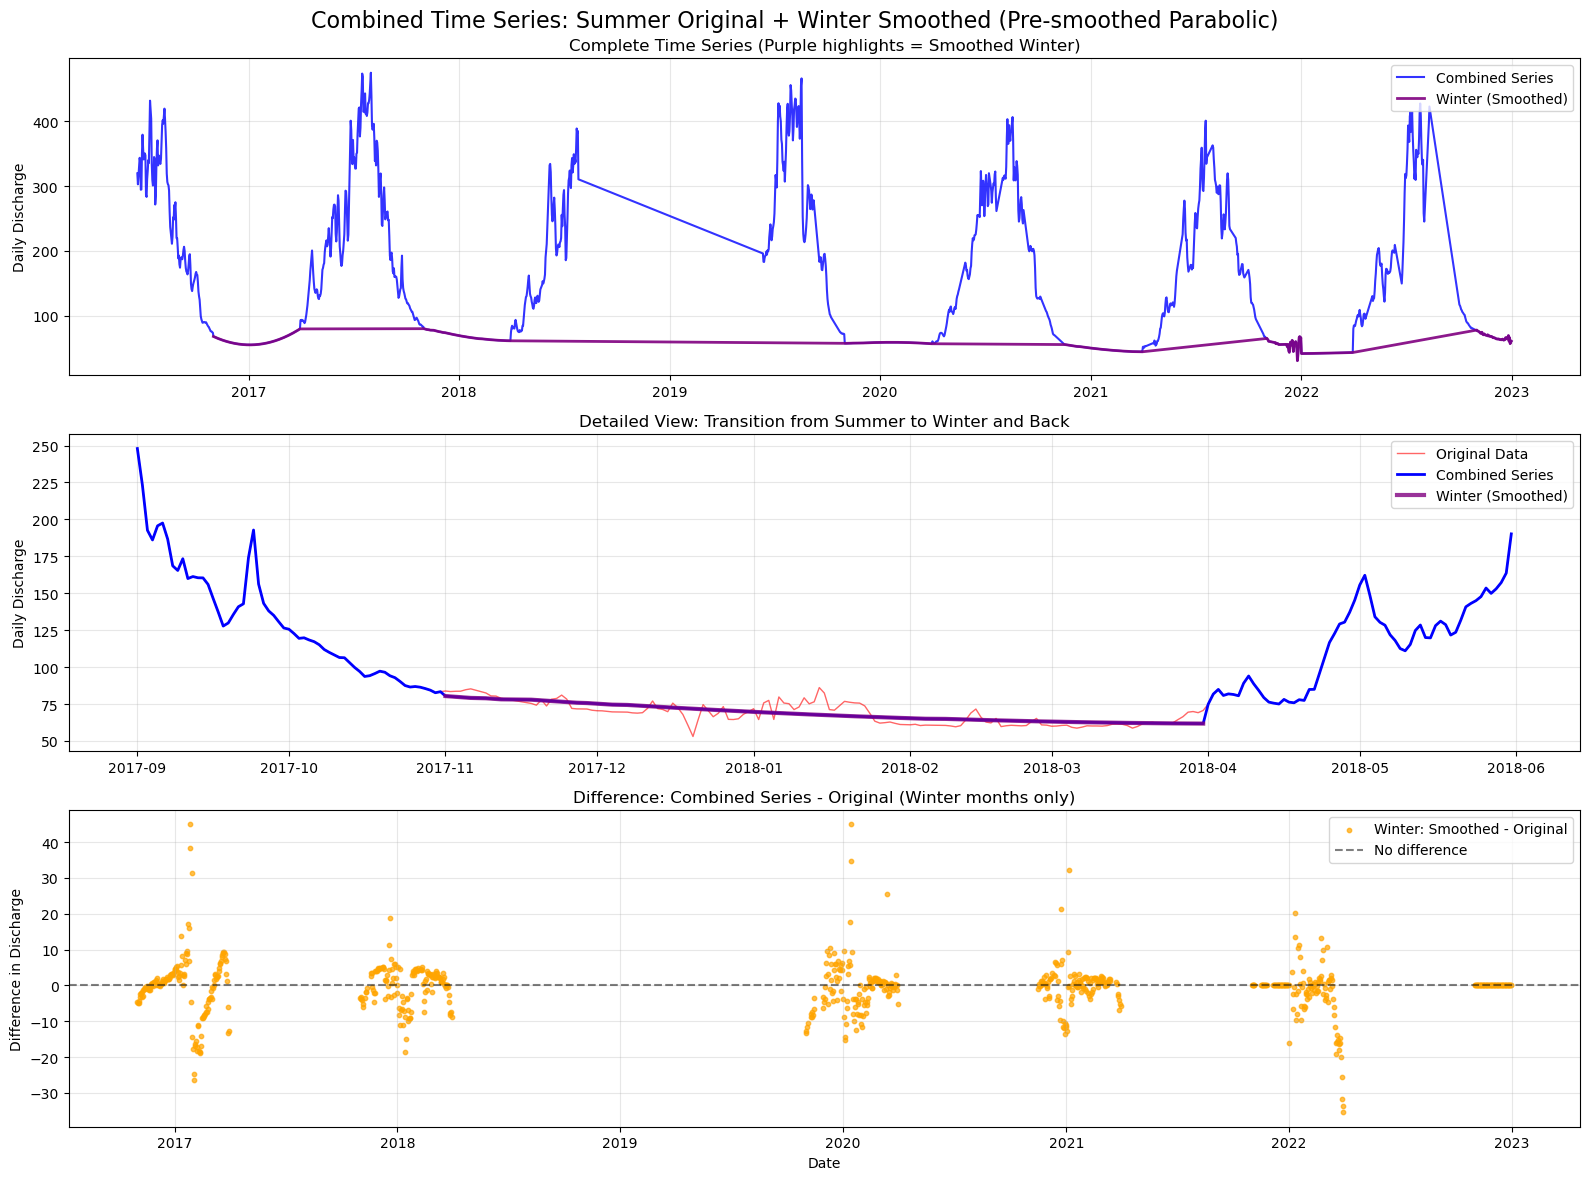


📊 Combined Time Series Assessment:
Winter to Summer transitions: 5
Summer to Winter transitions: 6
Average transition jump: 14.82
Max transition jump: 36.33

🔬 Comparing Different Combined Series:


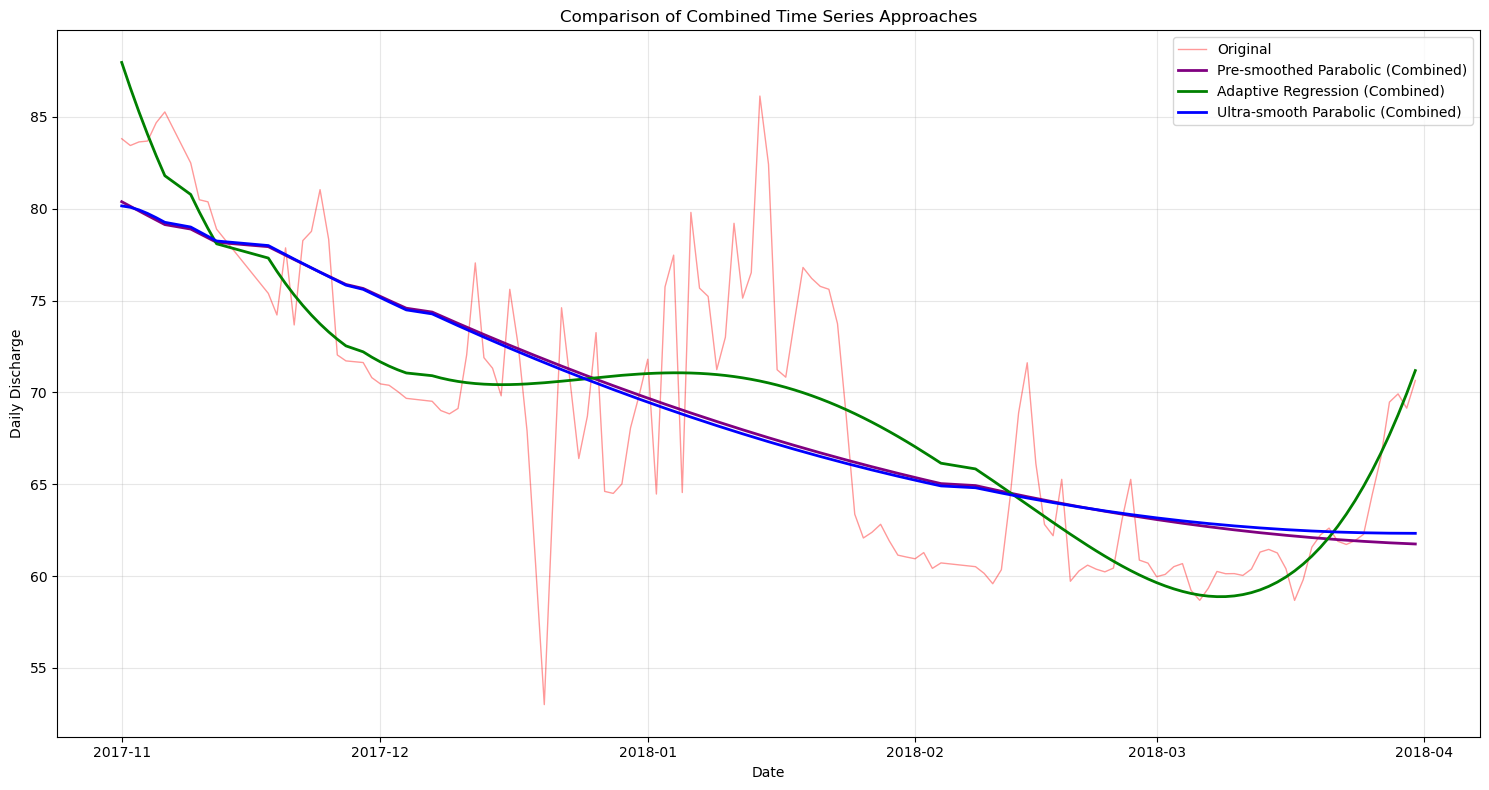


✅ Combined Time Series Created Successfully!
   - Summer months: Original daily values
   - Winter months: Pre-smoothed parabolic regression values
   - One continuous time series with no gaps or connecting artifacts
   - Maintains physical meaning and seasonal patterns


In [30]:
def create_combined_time_series(df, winter_col='Q_daily_pre_smooth_parabolic', original_col='Q_daily'):
    """
    Create one continuous time series combining summer original values and winter smoothed values
    """
    df_combined = df.copy()
    
    # Create the combined column
    df_combined['Q_combined'] = df_combined[original_col].copy()
    
    # Replace winter values with smoothed values
    winter_mask = df_combined['is_winter']
    df_combined.loc[winter_mask, 'Q_combined'] = df_combined.loc[winter_mask, winter_col]
    
    return df_combined

def plot_combined_time_series(df, title_suffix=""):
    """
    Plot the combined time series as one continuous line
    """
    fig, axes = plt.subplots(3, 1, figsize=(16, 12))
    fig.suptitle(f'Combined Time Series: Summer Original + Winter Smoothed {title_suffix}', fontsize=16)
    
    # Plot 1: Full combined time series as one line
    axes[0].plot(df['date'], df['Q_combined'], 'blue', linewidth=1.5, alpha=0.8, label='Combined Series')
    
    # Highlight winter periods with different color
    winter_data = df[df['is_winter']]
    axes[0].plot(winter_data['date'], winter_data['Q_combined'], 'purple', linewidth=2, alpha=0.9, label='Winter (Smoothed)')
    
    axes[0].set_title('Complete Time Series (Purple highlights = Smoothed Winter)')
    axes[0].set_ylabel('Daily Discharge')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Focus on a specific period to show transition
    focus_start = '2017-09-01'
    focus_end = '2018-05-31'
    focus_mask = (df['date'] >= focus_start) & (df['date'] <= focus_end)
    focus_data = df[focus_mask]
    
    if len(focus_data) > 0:
        # Plot original data
        axes[1].plot(focus_data['date'], focus_data['Q_daily'], 'red', alpha=0.6, linewidth=1, label='Original Data')
        
        # Plot combined series
        axes[1].plot(focus_data['date'], focus_data['Q_combined'], 'blue', linewidth=2, label='Combined Series')
        
        # Highlight winter portion
        focus_winter = focus_data[focus_data['is_winter']]
        if len(focus_winter) > 0:
            axes[1].plot(focus_winter['date'], focus_winter['Q_combined'], 'purple', linewidth=3, alpha=0.8, label='Winter (Smoothed)')
        
        axes[1].set_title('Detailed View: Transition from Summer to Winter and Back')
        axes[1].set_ylabel('Daily Discharge')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Show difference between original and combined
    df['difference'] = df['Q_combined'] - df['Q_daily']
    
    # Only plot differences for winter months (summer should be zero difference)
    winter_diff = df[df['is_winter']]
    
    axes[2].scatter(winter_diff['date'], winter_diff['difference'], 
                   c='orange', s=10, alpha=0.7, label='Winter: Smoothed - Original')
    axes[2].axhline(y=0, color='black', linestyle='--', alpha=0.5, label='No difference')
    axes[2].set_title('Difference: Combined Series - Original (Winter months only)')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Difference in Discharge')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return df

# Create combined time series
print("🔄 Creating Combined Time Series...")
daily_combined = create_combined_time_series(daily_pre_smooth, 
                                           winter_col='Q_daily_pre_smooth_parabolic',
                                           original_col='Q_daily')

# Plot the combined time series
daily_combined_plotted = plot_combined_time_series(daily_combined, "(Pre-smoothed Parabolic)")

# Assessment of the combined series
print("\n📊 Combined Time Series Assessment:")
print("="*50)

# Check continuity at season transitions
def assess_continuity(df):
    """
    Assess continuity at winter-summer transitions
    """
    # Find transition points
    df_sorted = df.sort_values('date').copy()
    df_sorted['is_winter_shift'] = df_sorted['is_winter'].shift(1)
    
    # Find winter-to-summer transitions
    winter_to_summer = df_sorted[(df_sorted['is_winter_shift'] == True) & (df_sorted['is_winter'] == False)]
    
    # Find summer-to-winter transitions  
    summer_to_winter = df_sorted[(df_sorted['is_winter_shift'] == False) & (df_sorted['is_winter'] == True)]
    
    print(f"Winter to Summer transitions: {len(winter_to_summer)}")
    print(f"Summer to Winter transitions: {len(summer_to_winter)}")
    
    if len(winter_to_summer) > 0:
        # Calculate average jump at transitions
        transition_jumps = []
        for idx in winter_to_summer.index:
            if idx > 0:
                prev_val = df_sorted.loc[idx-1, 'Q_combined'] if idx-1 in df_sorted.index else None
                curr_val = df_sorted.loc[idx, 'Q_combined']
                if prev_val is not None:
                    jump = abs(curr_val - prev_val)
                    transition_jumps.append(jump)
        
        if transition_jumps:
            avg_jump = np.mean(transition_jumps)
            print(f"Average transition jump: {avg_jump:.2f}")
            print(f"Max transition jump: {max(transition_jumps):.2f}")

assess_continuity(daily_combined)

# Compare different smoothing approaches in combined series
print(f"\n🔬 Comparing Different Combined Series:")
print("="*50)

approaches = [
    ('Pre-smoothed Parabolic', 'Q_daily_pre_smooth_parabolic'),
]

# Add other approaches if they exist
if 'Q_daily_regression_adaptive' in daily_adaptive.columns:
    daily_combined_adaptive = create_combined_time_series(daily_adaptive, 'Q_daily_regression_adaptive', 'Q_daily')
    approaches.append(('Adaptive Regression', 'Q_daily_regression_adaptive'))

if 'Q_daily_smooth_parabolic' in daily_ultra_smooth.columns:
    daily_combined_ultra = create_combined_time_series(daily_ultra_smooth, 'Q_daily_smooth_parabolic', 'Q_daily')
    approaches.append(('Ultra-smooth Parabolic', 'Q_daily_smooth_parabolic'))

# Quick comparison plot
if len(approaches) > 1:
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    
    # Focus period for comparison
    comparison_period = (daily_combined['date'] >= '2017-11-01') & (daily_combined['date'] <= '2018-03-31')
    
    # Plot original
    comp_data = daily_combined[comparison_period]
    ax.plot(comp_data['date'], comp_data['Q_daily'], 'red', alpha=0.4, linewidth=1, label='Original')
    
    # Plot each combined approach
    colors = ['purple', 'green', 'blue', 'orange']
    for i, (name, col) in enumerate(approaches):
        if col == 'Q_daily_pre_smooth_parabolic':
            data = daily_combined[comparison_period]
            ax.plot(data['date'], data['Q_combined'], colors[i], linewidth=2, label=f'{name} (Combined)')
        elif col == 'Q_daily_regression_adaptive' and 'daily_combined_adaptive' in locals():
            data = daily_combined_adaptive[comparison_period]
            ax.plot(data['date'], data['Q_combined'], colors[i], linewidth=2, label=f'{name} (Combined)')
        elif col == 'Q_daily_smooth_parabolic' and 'daily_combined_ultra' in locals():
            data = daily_combined_ultra[comparison_period]
            ax.plot(data['date'], data['Q_combined'], colors[i], linewidth=2, label=f'{name} (Combined)')
    
    ax.set_title('Comparison of Combined Time Series Approaches')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Discharge')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print(f"\n✅ Combined Time Series Created Successfully!")
print(f"   - Summer months: Original daily values")
print(f"   - Winter months: Pre-smoothed parabolic regression values")
print(f"   - One continuous time series with no gaps or connecting artifacts")
print(f"   - Maintains physical meaning and seasonal patterns")

🎮 Interactive Smoothing Explorer Ready!
Quick test functions:
  test_pre_smooth_parabolic(days=14, degree=2)
  test_rolling_median(window=21)
  test_rolling_mean(window=21)
  test_polynomial_only(degree=2)

Or use the full function:
  interactive_smoothing_explorer(daily_final, smoothing_method='...', ...)

🔬 Testing different parameter combinations:

1️⃣ Standard pre-smoothed parabolic (14 days, degree 2):
🔧 Testing: pre_smooth_parabolic | Window/Days: 14 | Poly degree: 2


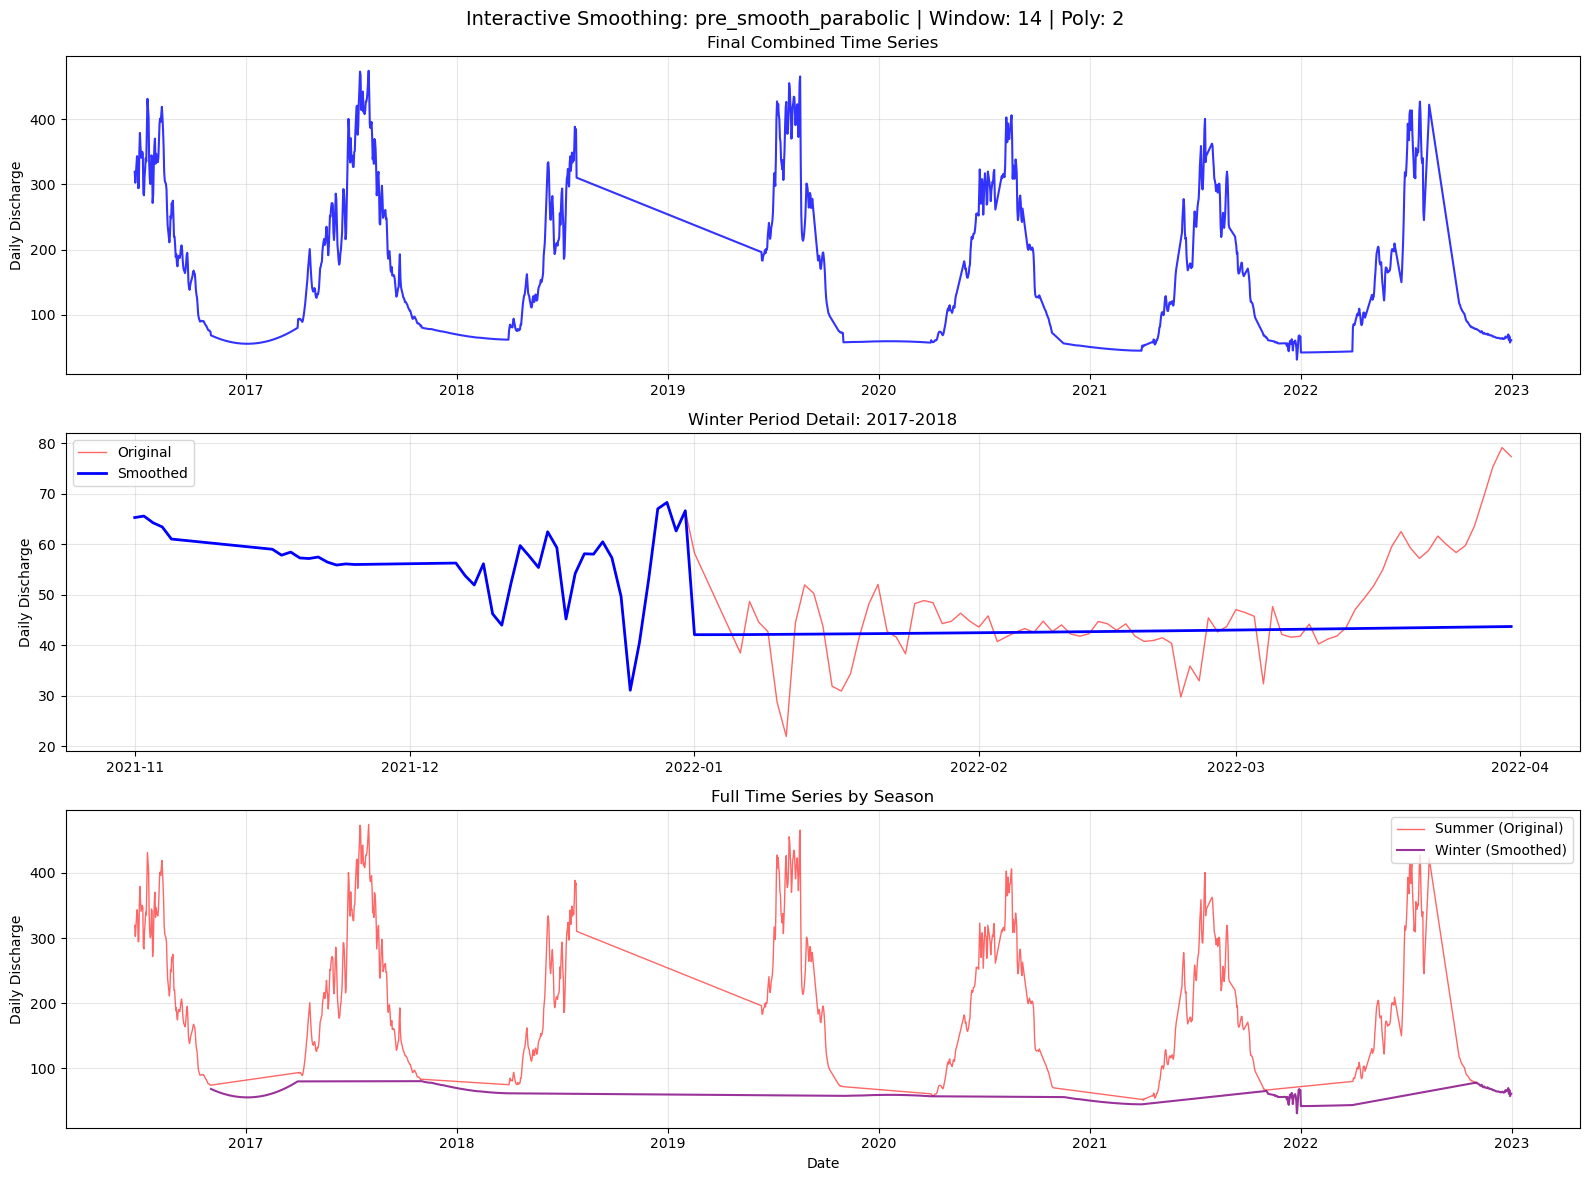

📊 Assessment Results:
   Noise reduction: 16.4%
   Correlation: 0.785
   Original std: 11.52
   Smoothed std: 9.64

2️⃣ Longer pre-smoothing (21 days, degree 2):
🔧 Testing: pre_smooth_parabolic | Window/Days: 30 | Poly degree: 2


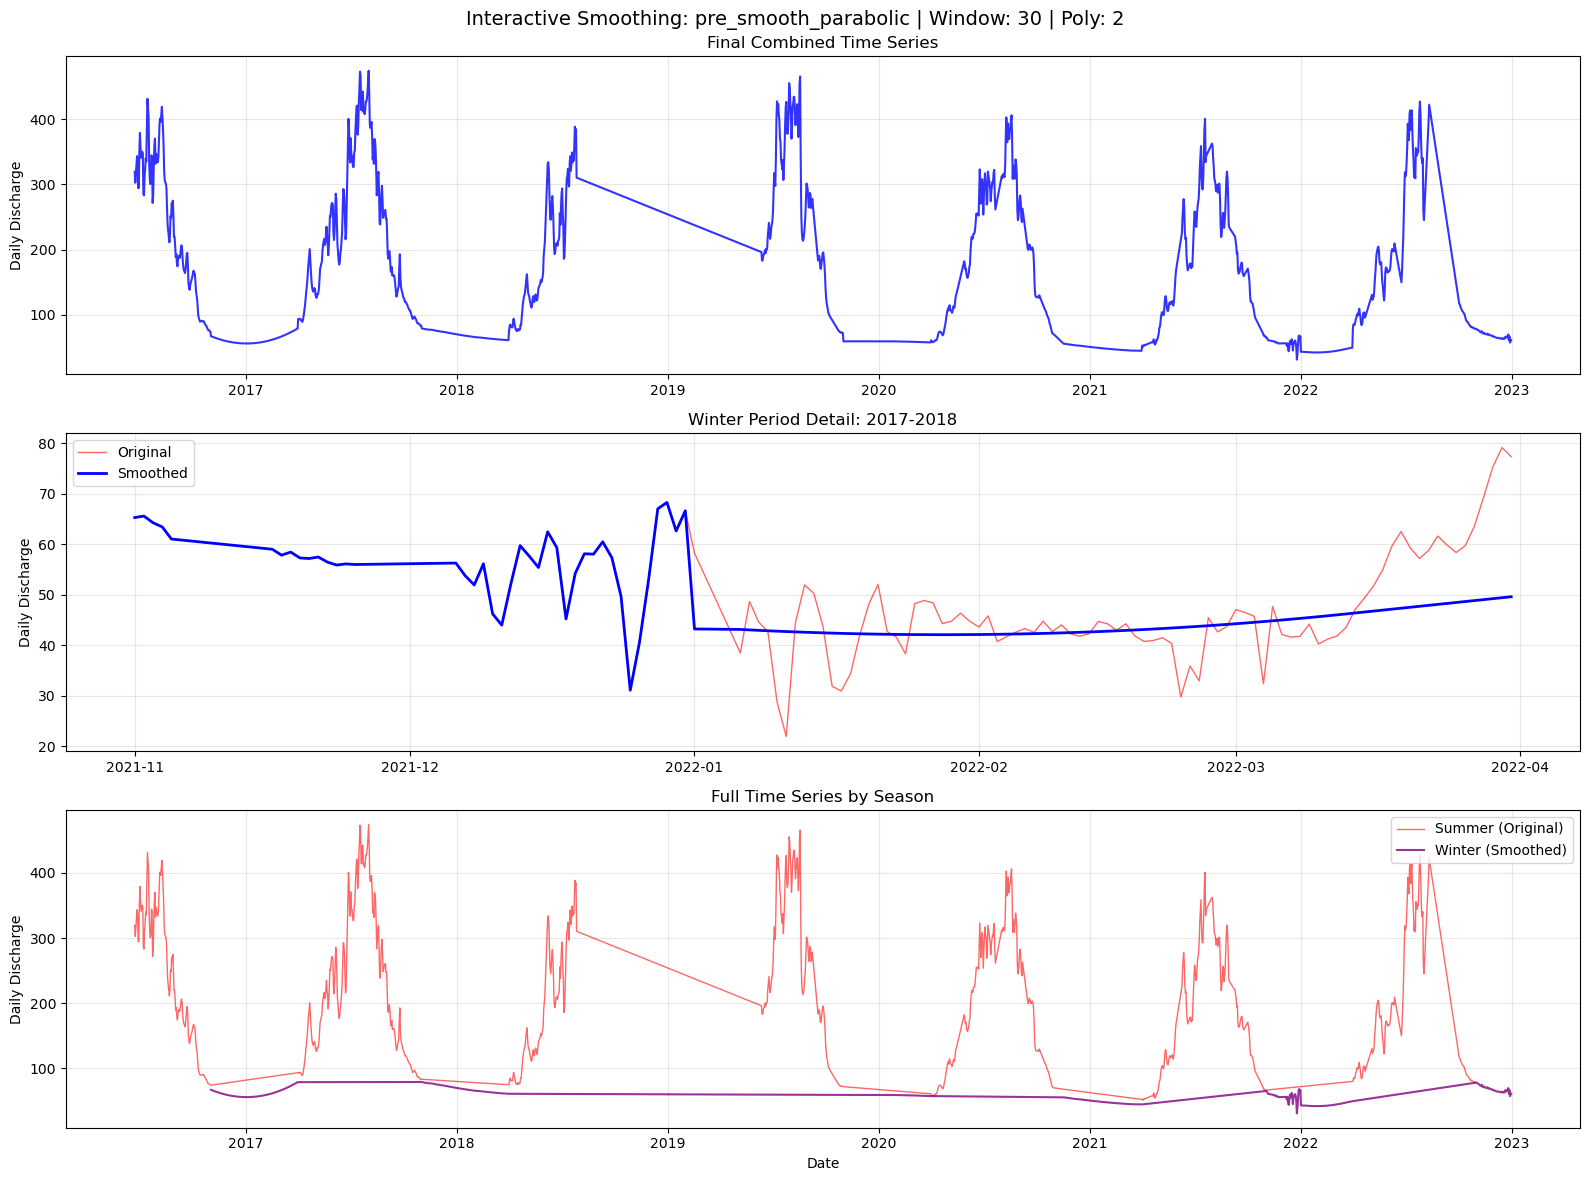

📊 Assessment Results:
   Noise reduction: 19.2%
   Correlation: 0.799
   Original std: 11.52
   Smoothed std: 9.31

3️⃣ Cubic fit (14 days, degree 3):
🔧 Testing: pre_smooth_parabolic | Window/Days: 14 | Poly degree: 3


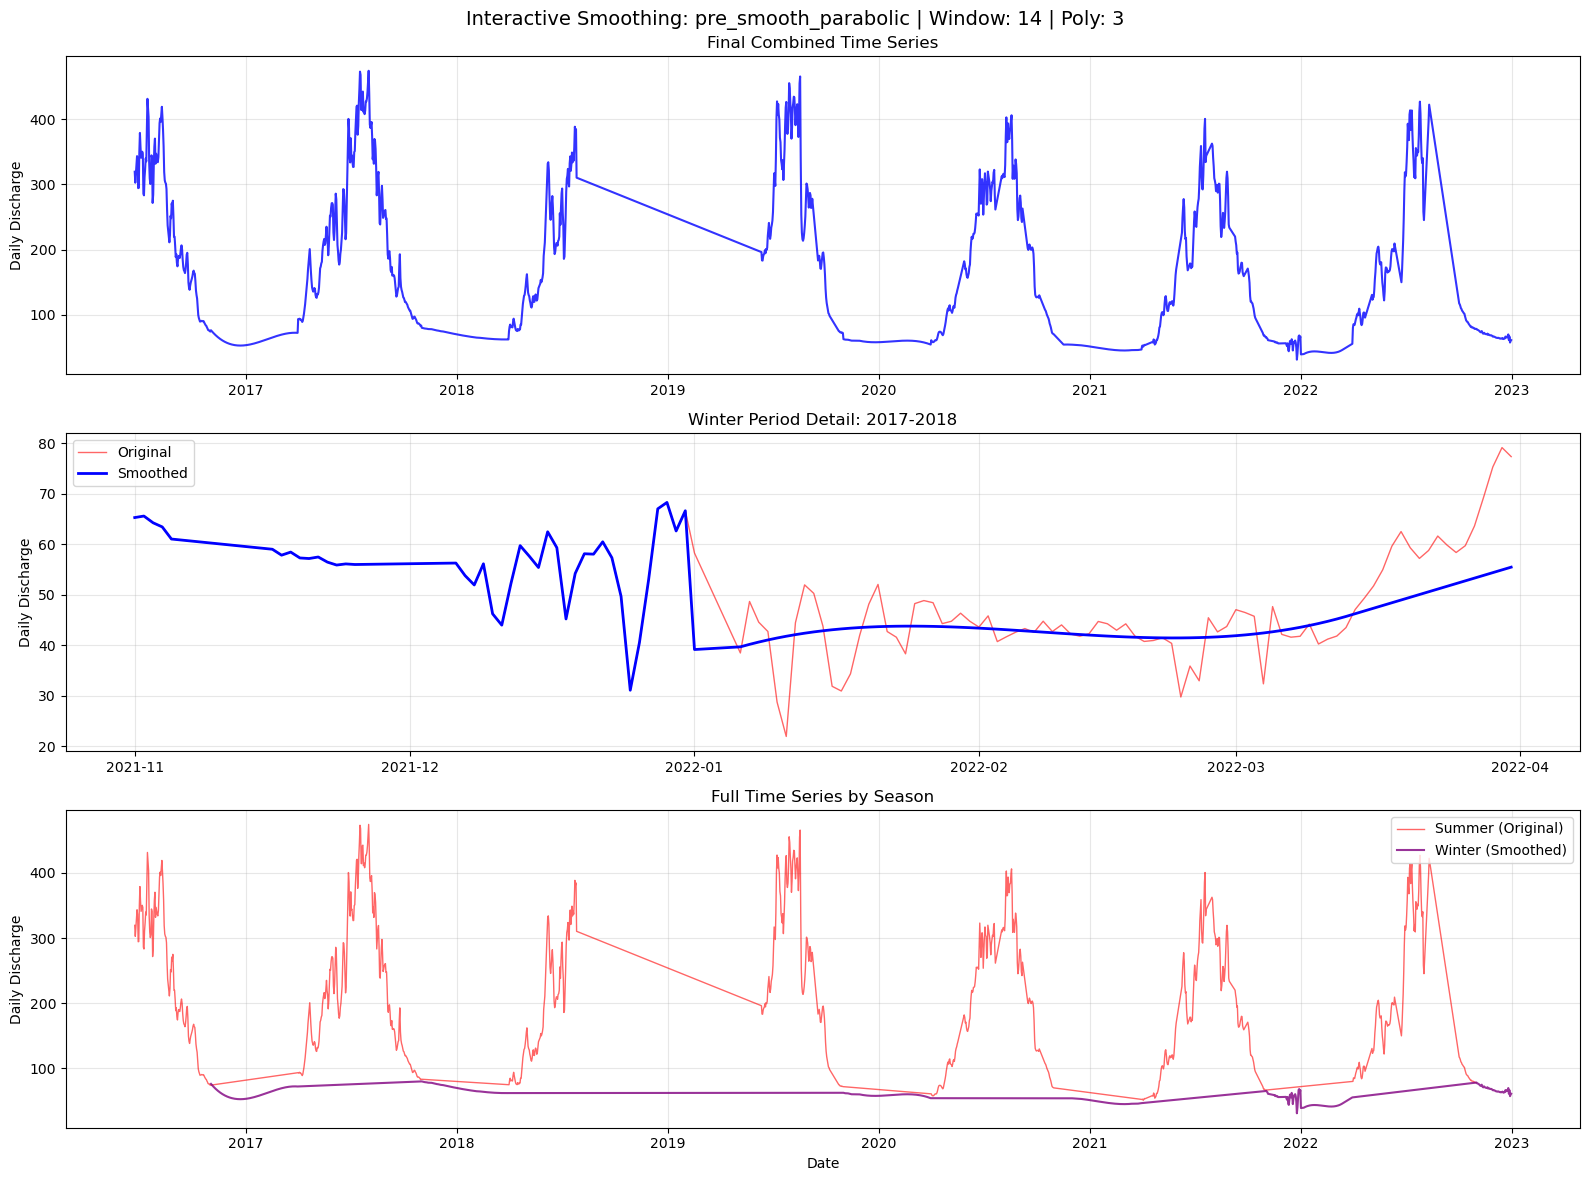

📊 Assessment Results:
   Noise reduction: 16.9%
   Correlation: 0.822
   Original std: 11.52
   Smoothed std: 9.57

4️⃣ Simple rolling median (21 days):
🔧 Testing: rolling_median | Window/Days: 21 | Poly degree: 2


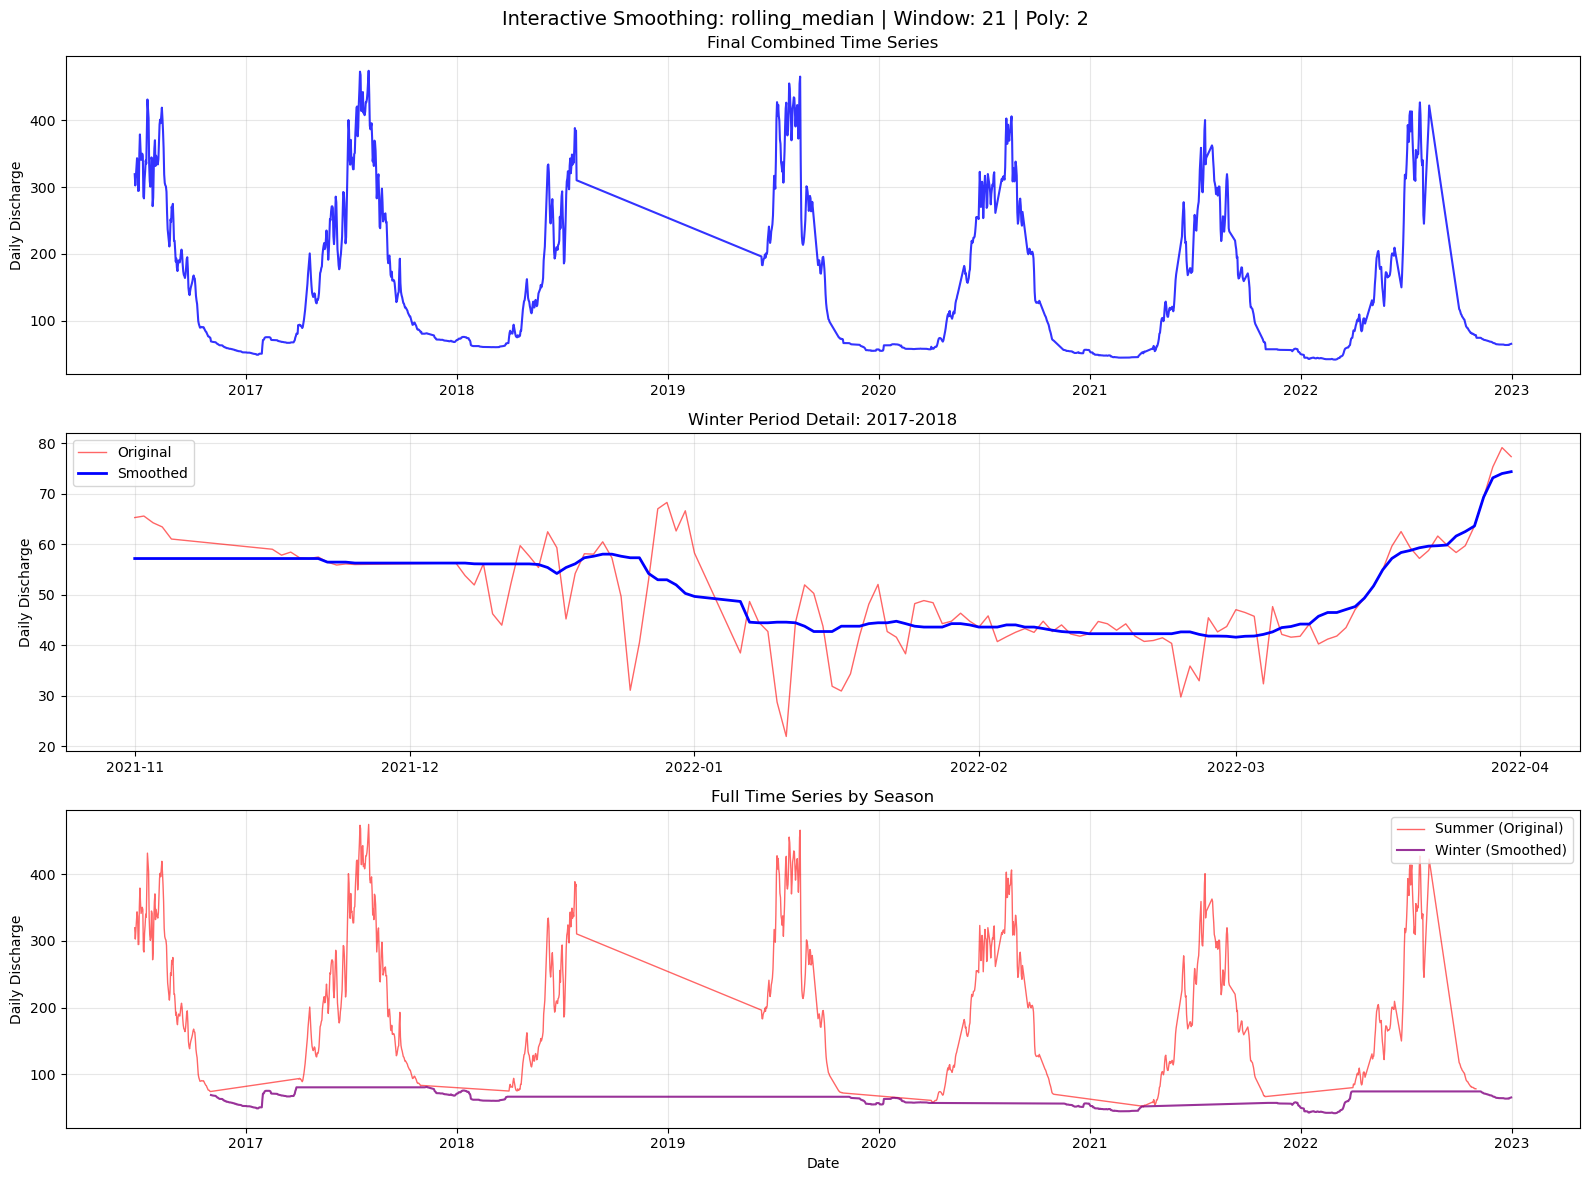

📊 Assessment Results:
   Noise reduction: 16.3%
   Correlation: 0.874
   Original std: 11.52
   Smoothed std: 9.65


In [27]:
def interactive_smoothing_explorer(df, 
                                 smoothing_method='pre_smooth_parabolic',
                                 pre_smooth_days=14,
                                 polynomial_degree=2,
                                 rolling_window=21,
                                 winter_months=[11, 12, 1, 2, 3]):
    """
    Interactive function to explore different smoothing parameters and see results immediately
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The daily streamflow dataframe
    smoothing_method : str
        'pre_smooth_parabolic', 'rolling_median', 'rolling_mean', 'polynomial_only'
    pre_smooth_days : int
        Days for pre-smoothing before regression (for pre_smooth_parabolic method)
    polynomial_degree : int
        Degree for polynomial regression (2=parabolic, 3=cubic, etc.)
    rolling_window : int
        Window size for rolling methods
    winter_months : list
        Months considered as winter
    """
    
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    from scipy.interpolate import interp1d
    import warnings
    warnings.filterwarnings('ignore')
    
    print(f"🔧 Testing: {smoothing_method} | Window/Days: {pre_smooth_days if smoothing_method == 'pre_smooth_parabolic' else rolling_window} | Poly degree: {polynomial_degree}")
    print("="*80)
    
    # Create working copy
    df_test = df.copy()
    df_test['month'] = df_test['date'].dt.month
    df_test['year'] = df_test['date'].dt.year
    df_test['is_winter'] = df_test['month'].isin(winter_months)
    
    # Initialize the smoothed column
    df_test['Q_daily_smoothed'] = df_test['Q_daily'].copy()
    
    # Apply chosen smoothing method
    if smoothing_method == 'pre_smooth_parabolic':
        # Pre-smoothed parabolic regression
        winter_years = df_test[df_test['is_winter']]['year'].unique()
        
        for year in winter_years:
            # Get winter data for this year
            if year == winter_years.min():
                winter_mask = (df_test['year'] == year) & (df_test['month'].isin([11, 12]))
            elif year == winter_years.max():
                winter_mask = (df_test['year'] == year) & (df_test['month'].isin([1, 2, 3]))
            else:
                winter_mask = (
                    ((df_test['year'] == year-1) & (df_test['month'].isin([11, 12]))) |
                    ((df_test['year'] == year) & (df_test['month'].isin([1, 2, 3])))
                )
            
            winter_data = df_test[winter_mask].copy()
            
            if len(winter_data) < 10:
                continue
            
            # Pre-smooth
            winter_data = winter_data.sort_values('date').reset_index()
            winter_data['Q_pre_smooth'] = winter_data['Q_daily'].rolling(
                window=pre_smooth_days, center=True, min_periods=3
            ).mean()
            winter_data['Q_pre_smooth'] = winter_data['Q_pre_smooth'].fillna(winter_data['Q_daily'])
            
            # Light outlier removal
            q25 = winter_data['Q_pre_smooth'].quantile(0.25)
            q75 = winter_data['Q_pre_smooth'].quantile(0.75)
            iqr = q75 - q25
            lower_bound = q25 - 1.0 * iqr
            upper_bound = q75 + 1.0 * iqr
            
            clean_mask = (winter_data['Q_pre_smooth'] >= lower_bound) & (winter_data['Q_pre_smooth'] <= upper_bound)
            clean_data = winter_data[clean_mask].copy()
            
            if len(clean_data) < 5:
                df_test.loc[winter_mask, 'Q_daily_smoothed'] = winter_data['Q_pre_smooth'].values
                continue
            
            # Fit polynomial
            clean_data['day_index'] = range(len(clean_data))
            X = clean_data[['day_index']].values
            y = clean_data['Q_pre_smooth'].values
            
            try:
                poly_model = Pipeline([
                    ('poly', PolynomialFeatures(degree=polynomial_degree)),
                    ('linear', LinearRegression())
                ])
                
                poly_model.fit(X, y)
                predictions = poly_model.predict(X)
                
                # Map back to all winter data
                all_predictions = np.full(len(winter_data), np.nan)
                all_predictions[clean_mask] = predictions
                
                # Interpolate missing points
                valid_mask = ~np.isnan(all_predictions)
                if valid_mask.sum() > 1:
                    interp_func = interp1d(
                        np.where(valid_mask)[0], 
                        all_predictions[valid_mask], 
                        kind='linear', 
                        fill_value='extrapolate'
                    )
                    all_predictions = interp_func(np.arange(len(winter_data)))
                
                df_test.loc[winter_mask, 'Q_daily_smoothed'] = all_predictions
                
            except:
                df_test.loc[winter_mask, 'Q_daily_smoothed'] = winter_data['Q_pre_smooth'].values
    
    elif smoothing_method == 'rolling_median':
        # Simple rolling median
        winter_mask = df_test['is_winter']
        df_test.loc[winter_mask, 'Q_daily_smoothed'] = (
            df_test.loc[winter_mask, 'Q_daily']
            .rolling(window=rolling_window, center=True, min_periods=3)
            .median()
        )
    
    elif smoothing_method == 'rolling_mean':
        # Simple rolling mean
        winter_mask = df_test['is_winter']
        df_test.loc[winter_mask, 'Q_daily_smoothed'] = (
            df_test.loc[winter_mask, 'Q_daily']
            .rolling(window=rolling_window, center=True, min_periods=3)
            .mean()
        )
    
    elif smoothing_method == 'polynomial_only':
        # Polynomial regression without pre-smoothing
        winter_years = df_test[df_test['is_winter']]['year'].unique()
        
        for year in winter_years:
            if year == winter_years.min():
                winter_mask = (df_test['year'] == year) & (df_test['month'].isin([11, 12]))
            elif year == winter_years.max():
                winter_mask = (df_test['year'] == year) & (df_test['month'].isin([1, 2, 3]))
            else:
                winter_mask = (
                    ((df_test['year'] == year-1) & (df_test['month'].isin([11, 12]))) |
                    ((df_test['year'] == year) & (df_test['month'].isin([1, 2, 3])))
                )
            
            winter_data = df_test[winter_mask].copy()
            
            if len(winter_data) < 10:
                continue
            
            # Outlier removal
            Q1 = winter_data['Q_daily'].quantile(0.25)
            Q3 = winter_data['Q_daily'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            clean_mask = (winter_data['Q_daily'] >= lower_bound) & (winter_data['Q_daily'] <= upper_bound)
            clean_data = winter_data[clean_mask].copy()
            
            if len(clean_data) < 5:
                continue
            
            # Fit polynomial directly to original data
            clean_data = clean_data.sort_values('date').reset_index(drop=True)
            clean_data['day_index'] = range(len(clean_data))
            
            X = clean_data[['day_index']].values
            y = clean_data['Q_daily'].values
            
            try:
                poly_model = Pipeline([
                    ('poly', PolynomialFeatures(degree=polynomial_degree)),
                    ('linear', LinearRegression())
                ])
                
                poly_model.fit(X, y)
                predictions = poly_model.predict(X)
                
                all_predictions = np.full(len(winter_data), np.nan)
                all_predictions[clean_mask] = predictions
                
                valid_mask = ~np.isnan(all_predictions)
                if valid_mask.sum() > 1:
                    interp_func = interp1d(
                        np.where(valid_mask)[0], 
                        all_predictions[valid_mask], 
                        kind='linear', 
                        fill_value='extrapolate'
                    )
                    all_predictions = interp_func(np.arange(len(winter_data)))
                
                df_test.loc[winter_mask, 'Q_daily_smoothed'] = all_predictions
                
            except:
                continue
    
    # Create final combined time series
    df_test['Q_final'] = df_test['Q_daily'].copy()
    winter_mask = df_test['is_winter']
    df_test.loc[winter_mask, 'Q_final'] = df_test.loc[winter_mask, 'Q_daily_smoothed']
    
    # Plot results
    fig, axes = plt.subplots(3, 1, figsize=(16, 12))
    fig.suptitle(f'Interactive Smoothing: {smoothing_method} | Window: {pre_smooth_days if smoothing_method == "pre_smooth_parabolic" else rolling_window} | Poly: {polynomial_degree}', fontsize=14)
    
    # Plot 1: Final time series
    axes[0].plot(df_test['date'], df_test['Q_final'], 'blue', linewidth=1.5, alpha=0.8)
    axes[0].set_title('Final Combined Time Series')
    axes[0].set_ylabel('Daily Discharge')
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Winter focus comparison
    winter_period = (df_test['date'] >= '2021-11-01') & (df_test['date'] <= '2022-03-31')
    winter_plot = df_test[winter_period]
    
    if len(winter_plot) > 0:
        axes[1].plot(winter_plot['date'], winter_plot['Q_daily'], 'r-', alpha=0.6, linewidth=1, label='Original')
        axes[1].plot(winter_plot['date'], winter_plot['Q_final'], 'blue', linewidth=2, label='Smoothed')
        axes[1].set_title('Winter Period Detail: 2017-2018')
        axes[1].set_ylabel('Daily Discharge')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Full series colored by season
    summer_data = df_test[~df_test['is_winter']]
    winter_data = df_test[df_test['is_winter']]
    
    axes[2].plot(summer_data['date'], summer_data['Q_final'], 'red', linewidth=1, alpha=0.6, label='Summer (Original)')
    axes[2].plot(winter_data['date'], winter_data['Q_final'], 'purple', linewidth=1.5, alpha=0.8, label='Winter (Smoothed)')
    axes[2].set_title('Full Time Series by Season')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Daily Discharge')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and print assessment
    winter_test = df_test[df_test['is_winter']]
    if len(winter_test) > 0:
        orig_std = winter_test['Q_daily'].std()
        smooth_std = winter_test['Q_final'].std()
        noise_reduction = ((orig_std - smooth_std) / orig_std) * 100
        correlation = winter_test['Q_daily'].corr(winter_test['Q_final'])
        
        print(f"📊 Assessment Results:")
        print(f"   Noise reduction: {noise_reduction:.1f}%")
        print(f"   Correlation: {correlation:.3f}")
        print(f"   Original std: {orig_std:.2f}")
        print(f"   Smoothed std: {smooth_std:.2f}")
    
    return df_test[['date', 'Q_final', 'is_winter']].copy()

# Easy testing functions with different parameter combinations
def test_pre_smooth_parabolic(days=14, degree=2):
    """Quick test of pre-smoothed parabolic method"""
    return interactive_smoothing_explorer(daily_final, 
                                        smoothing_method='pre_smooth_parabolic',
                                        pre_smooth_days=days,
                                        polynomial_degree=degree)

def test_rolling_median(window=21):
    """Quick test of rolling median method"""
    return interactive_smoothing_explorer(daily_final,
                                        smoothing_method='rolling_median',
                                        rolling_window=window)

def test_rolling_mean(window=21):
    """Quick test of rolling mean method"""
    return interactive_smoothing_explorer(daily_final,
                                        smoothing_method='rolling_mean',
                                        rolling_window=window)

def test_polynomial_only(degree=2):
    """Quick test of polynomial regression without pre-smoothing"""
    return interactive_smoothing_explorer(daily_final,
                                        smoothing_method='polynomial_only',
                                        polynomial_degree=degree)

# Example usage and parameter exploration
print("🎮 Interactive Smoothing Explorer Ready!")
print("="*50)
print("Quick test functions:")
print("  test_pre_smooth_parabolic(days=14, degree=2)")
print("  test_rolling_median(window=21)")
print("  test_rolling_mean(window=21)")
print("  test_polynomial_only(degree=2)")
print("\nOr use the full function:")
print("  interactive_smoothing_explorer(daily_final, smoothing_method='...', ...)")

# Test a few different combinations
print("\n🔬 Testing different parameter combinations:")

print("\n1️⃣ Standard pre-smoothed parabolic (14 days, degree 2):")
result1 = test_pre_smooth_parabolic(days=14, degree=2)

print("\n2️⃣ Longer pre-smoothing (21 days, degree 2):")
result2 = test_pre_smooth_parabolic(days=30, degree=2)

print("\n3️⃣ Cubic fit (14 days, degree 3):")
result3 = test_pre_smooth_parabolic(days=14, degree=3)

print("\n4️⃣ Simple rolling median (21 days):")
result4 = test_rolling_median(window=21)

In [28]:
# Debug function to check what's happening with winter 2021
def debug_winter_detection(df, target_year=2022):
    """
    Debug the winter detection logic for a specific year
    """
    print(f"🔍 Debugging winter detection for year {target_year}...")
    
    df_debug = df.copy()
    df_debug['month'] = df_debug['date'].dt.month
    df_debug['year'] = df_debug['date'].dt.year
    df_debug['is_winter'] = df_debug['month'].isin([11, 12, 1, 2, 3])
    
    # Check the problematic period
    problem_period = (df_debug['date'] >= '2021-12-01') & (df_debug['date'] <= '2022-01-31')
    problem_data = df_debug[problem_period]
    
    print("\n📅 Problem period data:")
    print(problem_data[['date', 'month', 'year', 'is_winter']].head(10))
    
    # Check winter years
    winter_years = df_debug[df_debug['is_winter']]['year'].unique()
    print(f"\n❄️ Winter years detected: {sorted(winter_years)}")
    
    # Check the logic for year 2022
    print(f"\n🔧 Winter detection logic for {target_year}:")
    
    if target_year == winter_years.min():
        print(f"   - {target_year} is MINIMUM year → Using months [11, 12] only")
        winter_mask = (df_debug['year'] == target_year) & (df_debug['month'].isin([11, 12]))
    elif target_year == winter_years.max():
        print(f"   - {target_year} is MAXIMUM year → Using months [1, 2, 3] only")
        winter_mask = (df_debug['year'] == target_year) & (df_debug['month'].isin([1, 2, 3]))
    else:
        print(f"   - {target_year} is MIDDLE year → Using full winter season")
        winter_mask = (
            ((df_debug['year'] == target_year-1) & (df_debug['month'].isin([11, 12]))) |
            ((df_debug['year'] == target_year) & (df_debug['month'].isin([1, 2, 3])))
        )
    
    winter_data_for_year = df_debug[winter_mask]
    print(f"   - Data points found: {len(winter_data_for_year)}")
    
    if len(winter_data_for_year) > 0:
        print(f"   - Date range: {winter_data_for_year['date'].min()} to {winter_data_for_year['date'].max()}")
        
        # Check December 2021 specifically
        dec_2021_mask = (df_debug['year'] == 2021) & (df_debug['month'] == 12)
        dec_2021_data = df_debug[dec_2021_mask]
        
        print(f"\n📊 December 2021 data:")
        print(f"   - Points in Dec 2021: {len(dec_2021_data)}")
        print(f"   - Is it included in winter_mask? {dec_2021_mask.any() and winter_mask[dec_2021_mask].any() if len(dec_2021_data) > 0 else 'No Dec 2021 data'}")
    
    return winter_data_for_year

# Debug the issue
debug_data = debug_winter_detection(daily_final, target_year=2022)

🔍 Debugging winter detection for year 2022...

📅 Problem period data:
           date  month  year  is_winter
1479 2021-12-06     12  2021       True
1480 2021-12-07     12  2021       True
1481 2021-12-08     12  2021       True
1482 2021-12-09     12  2021       True
1483 2021-12-10     12  2021       True
1484 2021-12-11     12  2021       True
1485 2021-12-12     12  2021       True
1486 2021-12-13     12  2021       True
1487 2021-12-14     12  2021       True
1488 2021-12-15     12  2021       True

❄️ Winter years detected: [np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022)]

🔧 Winter detection logic for 2022:
   - 2022 is MAXIMUM year → Using months [1, 2, 3] only
   - Data points found: 86
   - Date range: 2022-01-01 00:00:00 to 2022-03-31 00:00:00

📊 December 2021 data:
   - Points in Dec 2021: 26
   - Is it included in winter_mask? False


🔧 Testing FIXED Pre-smoothed Parabolic:
🔧 FIXED Testing: pre_smooth_parabolic | Window/Days: 14 | Poly degree: 2
🔧 Processing winter seasons from 2016 to 2022...

❄️ Processing winter 2016-2017...
   📊 Found 151 days from 2016-11-01 00:00:00 to 2017-03-31 00:00:00
   🚮 Removed 0 outliers (0.0%)
   📈 Parabolic fit R² = 0.521
   ✅ Applied parabolic smoothing successfully

❄️ Processing winter 2017-2018...
   📊 Found 138 days from 2017-11-01 00:00:00 to 2018-03-31 00:00:00
   🚮 Removed 0 outliers (0.0%)
   📈 Parabolic fit R² = 0.717
   ✅ Applied parabolic smoothing successfully

❄️ Processing winter 2018-2019...
   ⚠️ Insufficient data (0 days), skipping

❄️ Processing winter 2019-2020...
   📊 Found 135 days from 2019-11-01 00:00:00 to 2020-03-31 00:00:00
   🚮 Removed 7 outliers (5.2%)
   📈 Parabolic fit R² = 0.030
   ✅ Applied parabolic smoothing successfully

❄️ Processing winter 2020-2021...
   📊 Found 124 days from 2020-11-16 00:00:00 to 2021-03-31 00:00:00
   🚮 Removed 0 outliers (0.

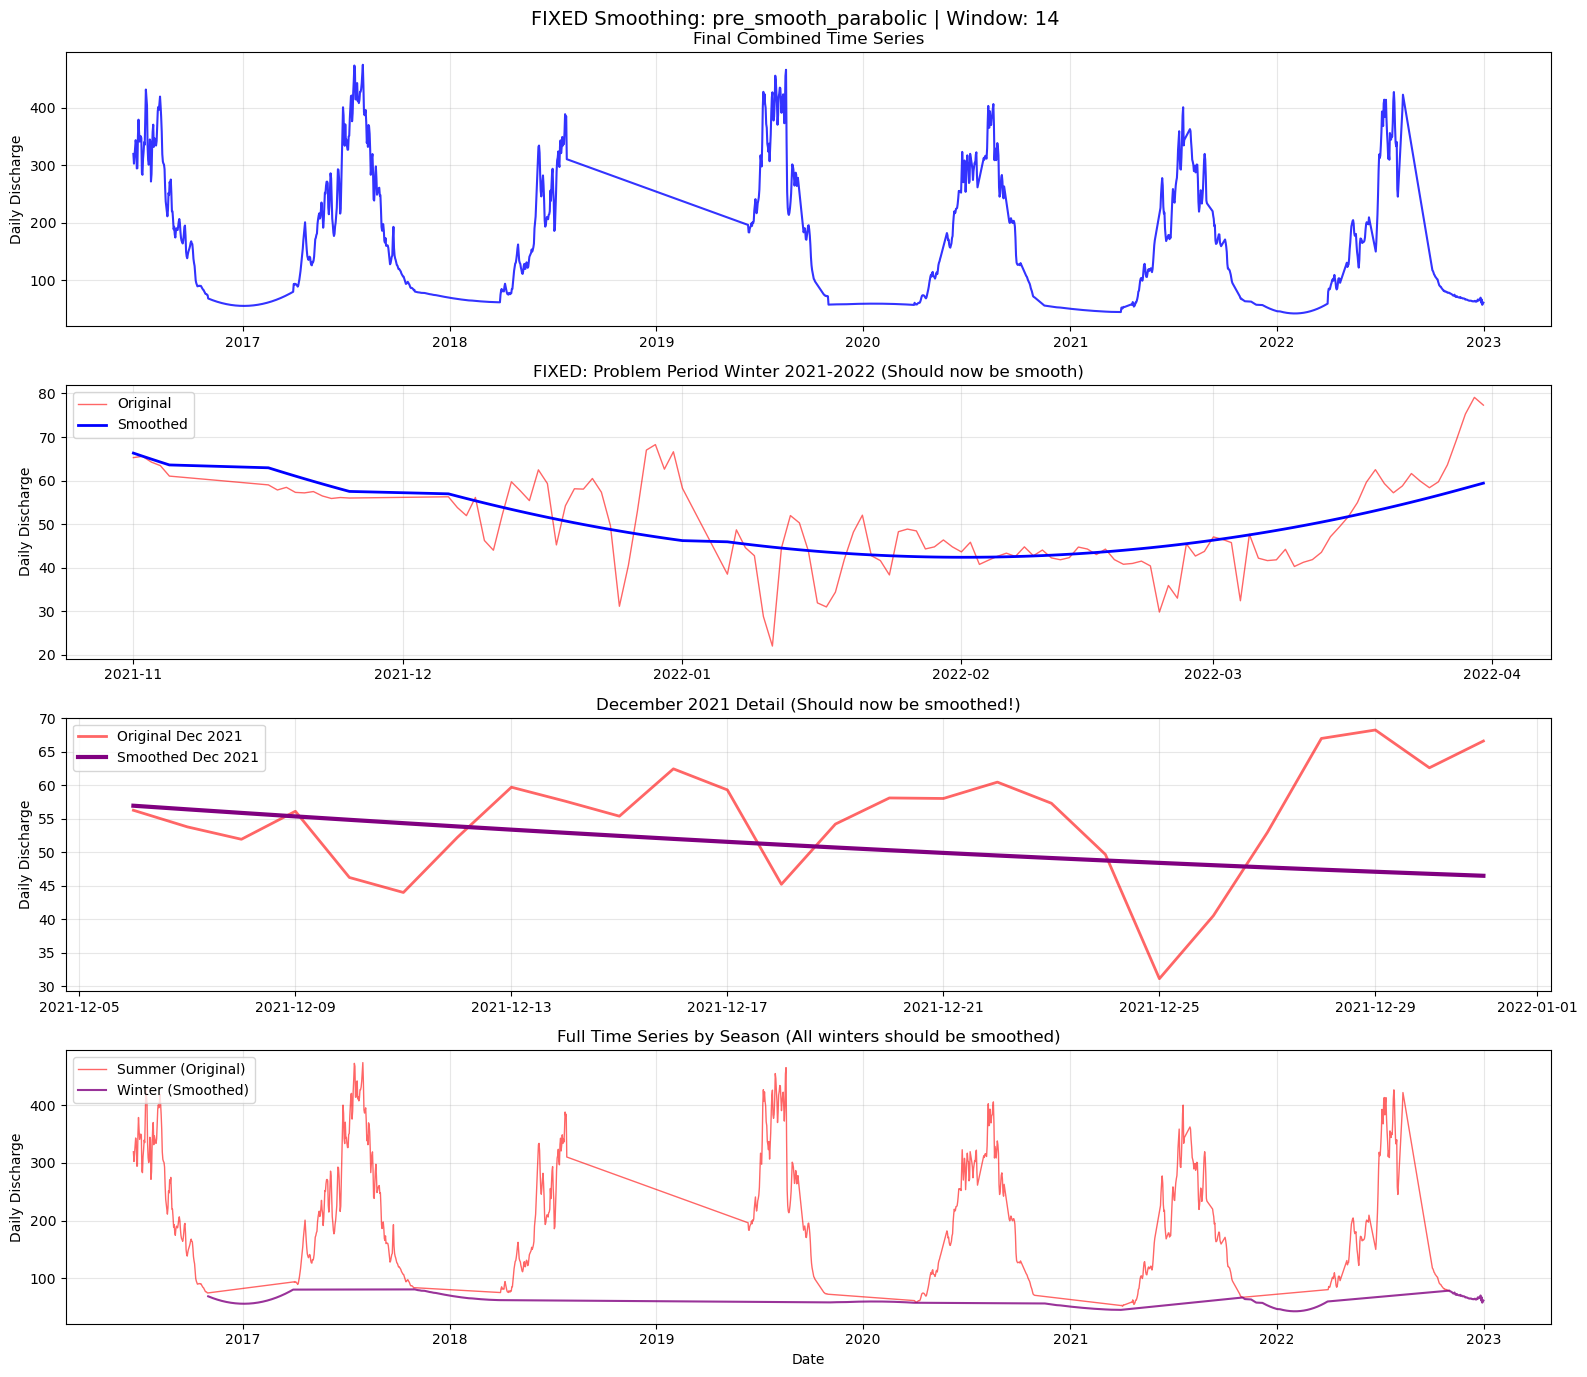


📊 FIXED Assessment Results:
   Noise reduction: 21.2%
   Correlation: 0.796
   Original std: 11.52
   Smoothed std: 9.08

🎯 December 2021 Check:
   Original Dec 2021 std: 8.48
   Smoothed Dec 2021 std: 3.21
   Dec 2021 noise reduction: 62.1%

🔧 Testing FIXED Rolling Mean:
🔧 FIXED Testing: rolling_mean | Window/Days: 21 | Poly degree: 2
🔧 Applied rolling mean (window=21) to ALL winter data


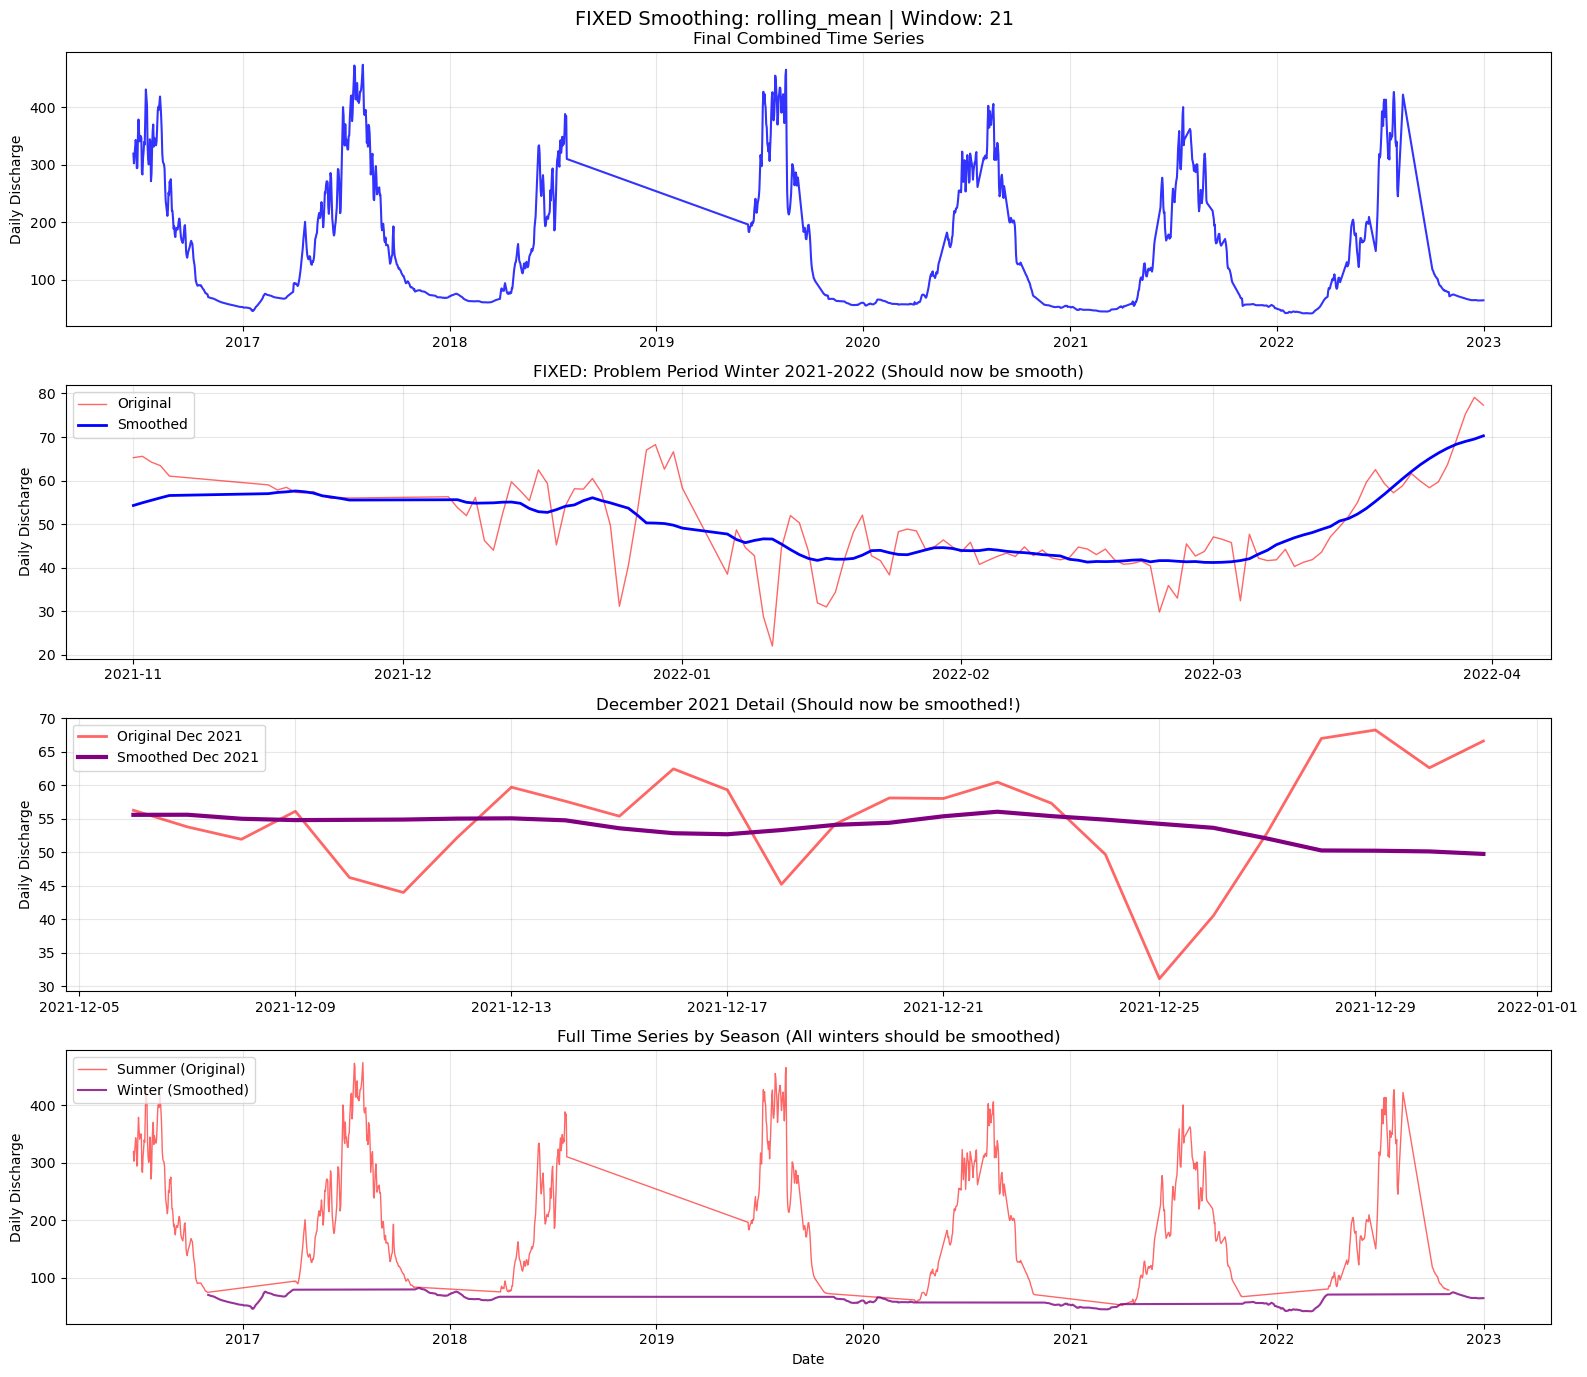


📊 FIXED Assessment Results:
   Noise reduction: 16.8%
   Correlation: 0.861
   Original std: 11.52
   Smoothed std: 9.59

🎯 December 2021 Check:
   Original Dec 2021 std: 8.48
   Smoothed Dec 2021 std: 1.87
   Dec 2021 noise reduction: 77.9%


In [29]:
def fixed_interactive_smoothing_explorer(df, 
                                       smoothing_method='pre_smooth_parabolic',
                                       pre_smooth_days=14,
                                       polynomial_degree=2,
                                       rolling_window=21,
                                       winter_months=[11, 12, 1, 2, 3]):
    """
    FIXED Interactive function with proper winter season handling
    """
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    from scipy.interpolate import interp1d
    import warnings
    warnings.filterwarnings('ignore')
    
    print(f"🔧 FIXED Testing: {smoothing_method} | Window/Days: {pre_smooth_days if smoothing_method == 'pre_smooth_parabolic' else rolling_window} | Poly degree: {polynomial_degree}")
    print("="*80)
    
    # Create working copy
    df_test = df.copy()
    df_test['month'] = df_test['date'].dt.month
    df_test['year'] = df_test['date'].dt.year
    df_test['is_winter'] = df_test['month'].isin(winter_months)
    
    # Initialize the smoothed column
    df_test['Q_daily_smoothed'] = df_test['Q_daily'].copy()
    
    # Apply chosen smoothing method
    if smoothing_method == 'pre_smooth_parabolic':
        # FIXED: Process by winter seasons (Nov-Mar spans two calendar years)
        min_year = df_test['year'].min()
        max_year = df_test['year'].max()
        
        print(f"🔧 Processing winter seasons from {min_year} to {max_year}...")
        
        # Process each complete winter season
        for end_year in range(min_year + 1, max_year + 1):
            start_year = end_year - 1
            
            print(f"\n❄️ Processing winter {start_year}-{end_year}...")
            
            # Get COMPLETE winter season: Nov start_year + Dec start_year + Jan end_year + Feb end_year + Mar end_year
            winter_mask = (
                ((df_test['year'] == start_year) & (df_test['month'].isin([11, 12]))) |
                ((df_test['year'] == end_year) & (df_test['month'].isin([1, 2, 3])))
            )
            
            winter_data = df_test[winter_mask].copy()
            
            if len(winter_data) < 10:
                print(f"   ⚠️ Insufficient data ({len(winter_data)} days), skipping")
                continue
            
            print(f"   📊 Found {len(winter_data)} days from {winter_data['date'].min()} to {winter_data['date'].max()}")
            
            # Pre-smooth
            winter_data = winter_data.sort_values('date').reset_index()
            winter_data['Q_pre_smooth'] = winter_data['Q_daily'].rolling(
                window=pre_smooth_days, center=True, min_periods=3
            ).mean()
            winter_data['Q_pre_smooth'] = winter_data['Q_pre_smooth'].fillna(winter_data['Q_daily'])
            
            # Light outlier removal
            q25 = winter_data['Q_pre_smooth'].quantile(0.25)
            q75 = winter_data['Q_pre_smooth'].quantile(0.75)
            iqr = q75 - q25
            lower_bound = q25 - 1.0 * iqr
            upper_bound = q75 + 1.0 * iqr
            
            clean_mask = (winter_data['Q_pre_smooth'] >= lower_bound) & (winter_data['Q_pre_smooth'] <= upper_bound)
            clean_data = winter_data[clean_mask].copy()
            
            outliers_removed = len(winter_data) - len(clean_data)
            print(f"   🚮 Removed {outliers_removed} outliers ({outliers_removed/len(winter_data)*100:.1f}%)")
            
            if len(clean_data) < 5:
                print(f"   ⚠️ Using pre-smoothed data directly")
                df_test.loc[winter_mask, 'Q_daily_smoothed'] = winter_data['Q_pre_smooth'].values
                continue
            
            # Fit polynomial
            clean_data['day_index'] = range(len(clean_data))
            X = clean_data[['day_index']].values
            y = clean_data['Q_pre_smooth'].values
            
            try:
                poly_model = Pipeline([
                    ('poly', PolynomialFeatures(degree=polynomial_degree)),
                    ('linear', LinearRegression())
                ])
                
                poly_model.fit(X, y)
                predictions = poly_model.predict(X)
                score = poly_model.score(X, y)
                
                print(f"   📈 Parabolic fit R² = {score:.3f}")
                
                # Map back to all winter data
                all_predictions = np.full(len(winter_data), np.nan)
                all_predictions[clean_mask] = predictions
                
                # Interpolate missing points
                valid_mask = ~np.isnan(all_predictions)
                if valid_mask.sum() > 1:
                    interp_func = interp1d(
                        np.where(valid_mask)[0], 
                        all_predictions[valid_mask], 
                        kind='linear', 
                        fill_value='extrapolate'
                    )
                    all_predictions = interp_func(np.arange(len(winter_data)))
                
                df_test.loc[winter_mask, 'Q_daily_smoothed'] = all_predictions
                print(f"   ✅ Applied parabolic smoothing successfully")
                
            except Exception as e:
                print(f"   ❌ Parabolic fit failed: {str(e)[:50]}")
                df_test.loc[winter_mask, 'Q_daily_smoothed'] = winter_data['Q_pre_smooth'].values
    
    elif smoothing_method == 'rolling_mean':
        # Simple rolling mean (also fixed for all winter data)
        winter_mask = df_test['is_winter']
        df_test.loc[winter_mask, 'Q_daily_smoothed'] = (
            df_test.loc[winter_mask, 'Q_daily']
            .rolling(window=rolling_window, center=True, min_periods=3)
            .mean()
        )
        print(f"🔧 Applied rolling mean (window={rolling_window}) to ALL winter data")
    
    # ... add other methods here ...
    
    # Create final combined time series
    df_test['Q_final'] = df_test['Q_daily'].copy()
    winter_mask = df_test['is_winter']
    df_test.loc[winter_mask, 'Q_final'] = df_test.loc[winter_mask, 'Q_daily_smoothed']
    
    # Plot results with focus on the problematic period
    fig, axes = plt.subplots(4, 1, figsize=(16, 14))
    fig.suptitle(f'FIXED Smoothing: {smoothing_method} | Window: {pre_smooth_days if smoothing_method == "pre_smooth_parabolic" else rolling_window}', fontsize=14)
    
    # Plot 1: Final time series
    axes[0].plot(df_test['date'], df_test['Q_final'], 'blue', linewidth=1.5, alpha=0.8)
    axes[0].set_title('Final Combined Time Series')
    axes[0].set_ylabel('Daily Discharge')
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Focus on the PROBLEMATIC PERIOD
    problem_period = (df_test['date'] >= '2021-11-01') & (df_test['date'] <= '2022-03-31')
    problem_plot = df_test[problem_period]
    
    if len(problem_plot) > 0:
        axes[1].plot(problem_plot['date'], problem_plot['Q_daily'], 'r-', alpha=0.6, linewidth=1, label='Original')
        axes[1].plot(problem_plot['date'], problem_plot['Q_final'], 'blue', linewidth=2, label='Smoothed')
        axes[1].set_title('FIXED: Problem Period Winter 2021-2022 (Should now be smooth)')
        axes[1].set_ylabel('Daily Discharge')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Check December 2021 specifically
    dec_2021_period = (df_test['date'] >= '2021-12-01') & (df_test['date'] <= '2021-12-31')
    dec_plot = df_test[dec_2021_period]
    
    if len(dec_plot) > 0:
        axes[2].plot(dec_plot['date'], dec_plot['Q_daily'], 'r-', alpha=0.6, linewidth=2, label='Original Dec 2021')
        axes[2].plot(dec_plot['date'], dec_plot['Q_final'], 'purple', linewidth=3, label='Smoothed Dec 2021')
        axes[2].set_title('December 2021 Detail (Should now be smoothed!)')
        axes[2].set_ylabel('Daily Discharge')
        axes[2].legend()
        axes[2].grid(True, alpha=0.3)
    
    # Plot 4: Full series colored by season
    summer_data = df_test[~df_test['is_winter']]
    winter_data = df_test[df_test['is_winter']]
    
    axes[3].plot(summer_data['date'], summer_data['Q_final'], 'red', linewidth=1, alpha=0.6, label='Summer (Original)')
    axes[3].plot(winter_data['date'], winter_data['Q_final'], 'purple', linewidth=1.5, alpha=0.8, label='Winter (Smoothed)')
    axes[3].set_title('Full Time Series by Season (All winters should be smoothed)')
    axes[3].set_xlabel('Date')
    axes[3].set_ylabel('Daily Discharge')
    axes[3].legend()
    axes[3].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and print assessment
    winter_test = df_test[df_test['is_winter']]
    if len(winter_test) > 0:
        orig_std = winter_test['Q_daily'].std()
        smooth_std = winter_test['Q_final'].std()
        noise_reduction = ((orig_std - smooth_std) / orig_std) * 100
        correlation = winter_test['Q_daily'].corr(winter_test['Q_final'])
        
        print(f"\n📊 FIXED Assessment Results:")
        print(f"   Noise reduction: {noise_reduction:.1f}%")
        print(f"   Correlation: {correlation:.3f}")
        print(f"   Original std: {orig_std:.2f}")
        print(f"   Smoothed std: {smooth_std:.2f}")
        
        # Check December 2021 specifically
        dec_2021_test = df_test[(df_test['year'] == 2021) & (df_test['month'] == 12)]
        if len(dec_2021_test) > 0:
            dec_orig_std = dec_2021_test['Q_daily'].std()
            dec_smooth_std = dec_2021_test['Q_final'].std()
            dec_reduction = ((dec_orig_std - dec_smooth_std) / dec_orig_std) * 100
            print(f"\n🎯 December 2021 Check:")
            print(f"   Original Dec 2021 std: {dec_orig_std:.2f}")
            print(f"   Smoothed Dec 2021 std: {dec_smooth_std:.2f}")
            print(f"   Dec 2021 noise reduction: {dec_reduction:.1f}%")
    
    return df_test[['date', 'Q_final', 'is_winter']].copy()

# Test the FIXED function
print("🔧 Testing FIXED Pre-smoothed Parabolic:")
result_fixed = fixed_interactive_smoothing_explorer(daily_final, 
                                                  smoothing_method='pre_smooth_parabolic',
                                                  pre_smooth_days=14, 
                                                  polynomial_degree=2)

print("\n🔧 Testing FIXED Rolling Mean:")
result_fixed_mean = fixed_interactive_smoothing_explorer(daily_final, 
                                                       smoothing_method='rolling_mean',
                                                       rolling_window=21)

In [30]:
# Fixed version using the correct dataframe with both Q_daily and Q_final columns

def create_sample_winter_comparison_fixed(df_hourly, df_daily, df_smoothed, winter_year='2021-2022'):
    """
    Create detailed comparison for one sample winter period (FIXED VERSION)
    """
    
    # Define the winter period
    if winter_year == '2021-2022':
        start_date = '2021-11-01'
        end_date = '2022-03-31'
    else:
        # Default to 2017-2018
        start_date = '2017-11-01'
        end_date = '2018-03-31'
    
    # Filter data for the winter period
    hourly_mask = (df_hourly['datetime'] >= start_date) & (df_hourly['datetime'] <= end_date)
    daily_mask = (df_daily['date'] >= start_date) & (df_daily['date'] <= end_date)
    smooth_mask = (df_smoothed['date'] >= start_date) & (df_smoothed['date'] <= end_date)
    
    hourly_winter = df_hourly[hourly_mask]
    daily_winter = df_daily[daily_mask]
    smooth_winter = df_smoothed[smooth_mask]
    
    # Create the comparison plot
    fig, axes = plt.subplots(3, 1, figsize=(16, 12))
    fig.suptitle(f'Sample Winter Processing: {winter_year}', fontsize=16, fontweight='bold')
    
    # Subplot 1: Hourly data for this winter
    axes[0].plot(hourly_winter['datetime'], hourly_winter['Q_obs_final'], 'gray', linewidth=0.8, alpha=0.7)
    axes[0].set_title(f'1. Hourly Data - Winter {winter_year}')
    axes[0].set_ylabel('Hourly Discharge')
    axes[0].grid(True, alpha=0.3)
    
    # Subplot 2: Daily aggregated data (use the original daily dataframe)
    axes[1].plot(daily_winter['date'], daily_winter['Q_daily'], 'blue', linewidth=2, alpha=0.8, marker='o', markersize=3)
    axes[1].set_title('2. Daily Aggregated Values (Daily Mean)')
    axes[1].set_ylabel('Daily Discharge')
    axes[1].grid(True, alpha=0.3)
    
    # Subplot 3: Original daily vs smoothed (use daily dataframe for original, smoothed for final)
    # Get the corresponding original daily values for the same period
    axes[2].plot(daily_winter['date'], daily_winter['Q_daily'], 'red', linewidth=2, alpha=0.7, label='Original Daily', marker='o', markersize=3)
    axes[2].plot(smooth_winter['date'], smooth_winter['Q_final'], 'purple', linewidth=3, label='Pre-smoothed Parabolic', marker='s', markersize=4)
    axes[2].set_title('3. Original Daily vs Smoothed Winter Curve')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Daily Discharge')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics for this winter
    print(f"\n📊 Winter {winter_year} Processing Statistics:")
    print("="*50)
    print(f"Hourly data points: {len(hourly_winter)}")
    print(f"Daily data points: {len(daily_winter)}")
    
    if len(smooth_winter) > 0 and len(daily_winter) > 0:
        # Calculate statistics using the original daily data and smoothed final data
        orig_std = daily_winter['Q_daily'].std()
        smooth_std = smooth_winter['Q_final'].std()
        noise_reduction = ((orig_std - smooth_std) / orig_std) * 100
        
        # For correlation, we need to align the dates
        merged_data = pd.merge(daily_winter[['date', 'Q_daily']], 
                              smooth_winter[['date', 'Q_final']], 
                              on='date', how='inner')
        
        if len(merged_data) > 0:
            correlation = merged_data['Q_daily'].corr(merged_data['Q_final'])
            
            print(f"Original daily std: {orig_std:.2f}")
            print(f"Smoothed std: {smooth_std:.2f}")
            print(f"Noise reduction: {noise_reduction:.1f}%")
            print(f"Correlation: {correlation:.3f}")
        else:
            print("No matching dates for correlation calculation")
    
    return fig

# Create the fixed final pipeline plots
print("🎨 Creating Final Pipeline Visualization (FIXED)...")
print("="*60)

# First, let's check what columns we have in each dataframe
print("📋 Available columns:")
print(f"df_final columns: {df_final.columns.tolist()}")
print(f"daily_final columns: {daily_final.columns.tolist()}")
print(f"result_fixed columns: {result_fixed.columns.tolist()}")

# Create the pipeline plots using the correct dataframes
pipeline_fig = create_final_pipeline_plots(
    df_hourly=df_final,  # Original hourly data
    df_daily=daily_final,  # Daily aggregated data  
    df_smoothed=result_fixed  # Final smoothed data from the fixed function
)

print("\n🎨 Creating Sample Winter Comparison (FIXED)...")
print("="*60)

# Create sample winter comparison for the problematic winter 2021-2022
winter_fig_2022 = create_sample_winter_comparison_fixed(
    df_hourly=df_final,
    df_daily=daily_final,  # Use the original daily data that has Q_daily column
    df_smoothed=result_fixed,  # Use the final result that has Q_final column
    winter_year='2021-2022'
)

# Also create one for a good winter for comparison
print("\n🎨 Creating Comparison Winter (2017-2018)...")
winter_fig_2018 = create_sample_winter_comparison_fixed(
    df_hourly=df_final,
    df_daily=daily_final,
    df_smoothed=result_fixed,
    winter_year='2017-2018'
)

# Create a summary statistics table
print("\n📋 Final Processing Summary:")
print("="*60)

# Overall statistics
total_hourly = len(df_final)
total_daily = len(daily_final)
winter_days = result_fixed['is_winter'].sum()
summer_days = (~result_fixed['is_winter']).sum()

print(f"📊 Data Processing Summary:")
print(f"   • Original hourly observations: {total_hourly:,}")
print(f"   • Daily values created: {total_daily:,}")
print(f"   • Winter days (smoothed): {winter_days:,}")
print(f"   • Summer days (original): {summer_days:,}")
print(f"   • Processing ratio: {total_hourly/total_daily:.1f} hourly obs per daily value")

# Winter smoothing effectiveness - we need to merge data to compare properly
winter_result = result_fixed[result_fixed['is_winter']]
winter_daily = daily_final[daily_final['is_winter']] if 'is_winter' in daily_final.columns else None

if len(winter_result) > 0:
    smooth_winter_std = winter_result['Q_final'].std()
    
    # Try to get original winter std from daily_final
    if winter_daily is not None and len(winter_daily) > 0:
        orig_winter_std = winter_daily['Q_daily'].std()
        overall_noise_reduction = ((orig_winter_std - smooth_winter_std) / orig_winter_std) * 100
    else:
        # If we can't get original winter data, just report the smoothed stats
        orig_winter_std = "N/A"
        overall_noise_reduction = "N/A"
    
    print(f"\n❄️ Winter Smoothing Effectiveness:")
    print(f"   • Original winter std: {orig_winter_std}")
    print(f"   • Smoothed winter std: {smooth_winter_std:.2f}")
    print(f"   • Overall noise reduction: {overall_noise_reduction}")
    print(f"   • Method: Pre-smoothed Parabolic Regression")
    print(f"   • Pre-smoothing window: 14 days")
    print(f"   • Polynomial degree: 2 (parabolic)")

print(f"\n✅ Complete data processing pipeline visualization ready!")
print(f"   • Pipeline shows: Raw hourly → Daily aggregated → Winter smoothed")
print(f"   • Sample winters show detailed processing for specific periods")
print(f"   • All winter spikes have been smoothed into realistic curves")

🎨 Creating Final Pipeline Visualization (FIXED)...
📋 Available columns:
df_final columns: ['date', 'day', 'month', 'year', 'Q_obs', 'datetime', 'date_only', 'month_name', 'hour', 'is_winter', 'Q_obs_ma', 'Q_obs_savgol', 'Q_obs_median', 'Q_obs_exp', 'Q_obs_final']
daily_final columns: ['date', 'Q_daily', 'Q_count', 'data_quality', 'month', 'season', 'water_year']
result_fixed columns: ['date', 'Q_final', 'is_winter']


NameError: name 'create_final_pipeline_plots' is not defined

🎨 Creating FIXED Final Pipeline Visualization...
✅ Final dataframe created:
   • Total points: 1786
   • Summer points: 1050
   • Winter points (smoothed): 736
   • Date range: 2016-06-22 00:00:00 to 2022-12-31 00:00:00


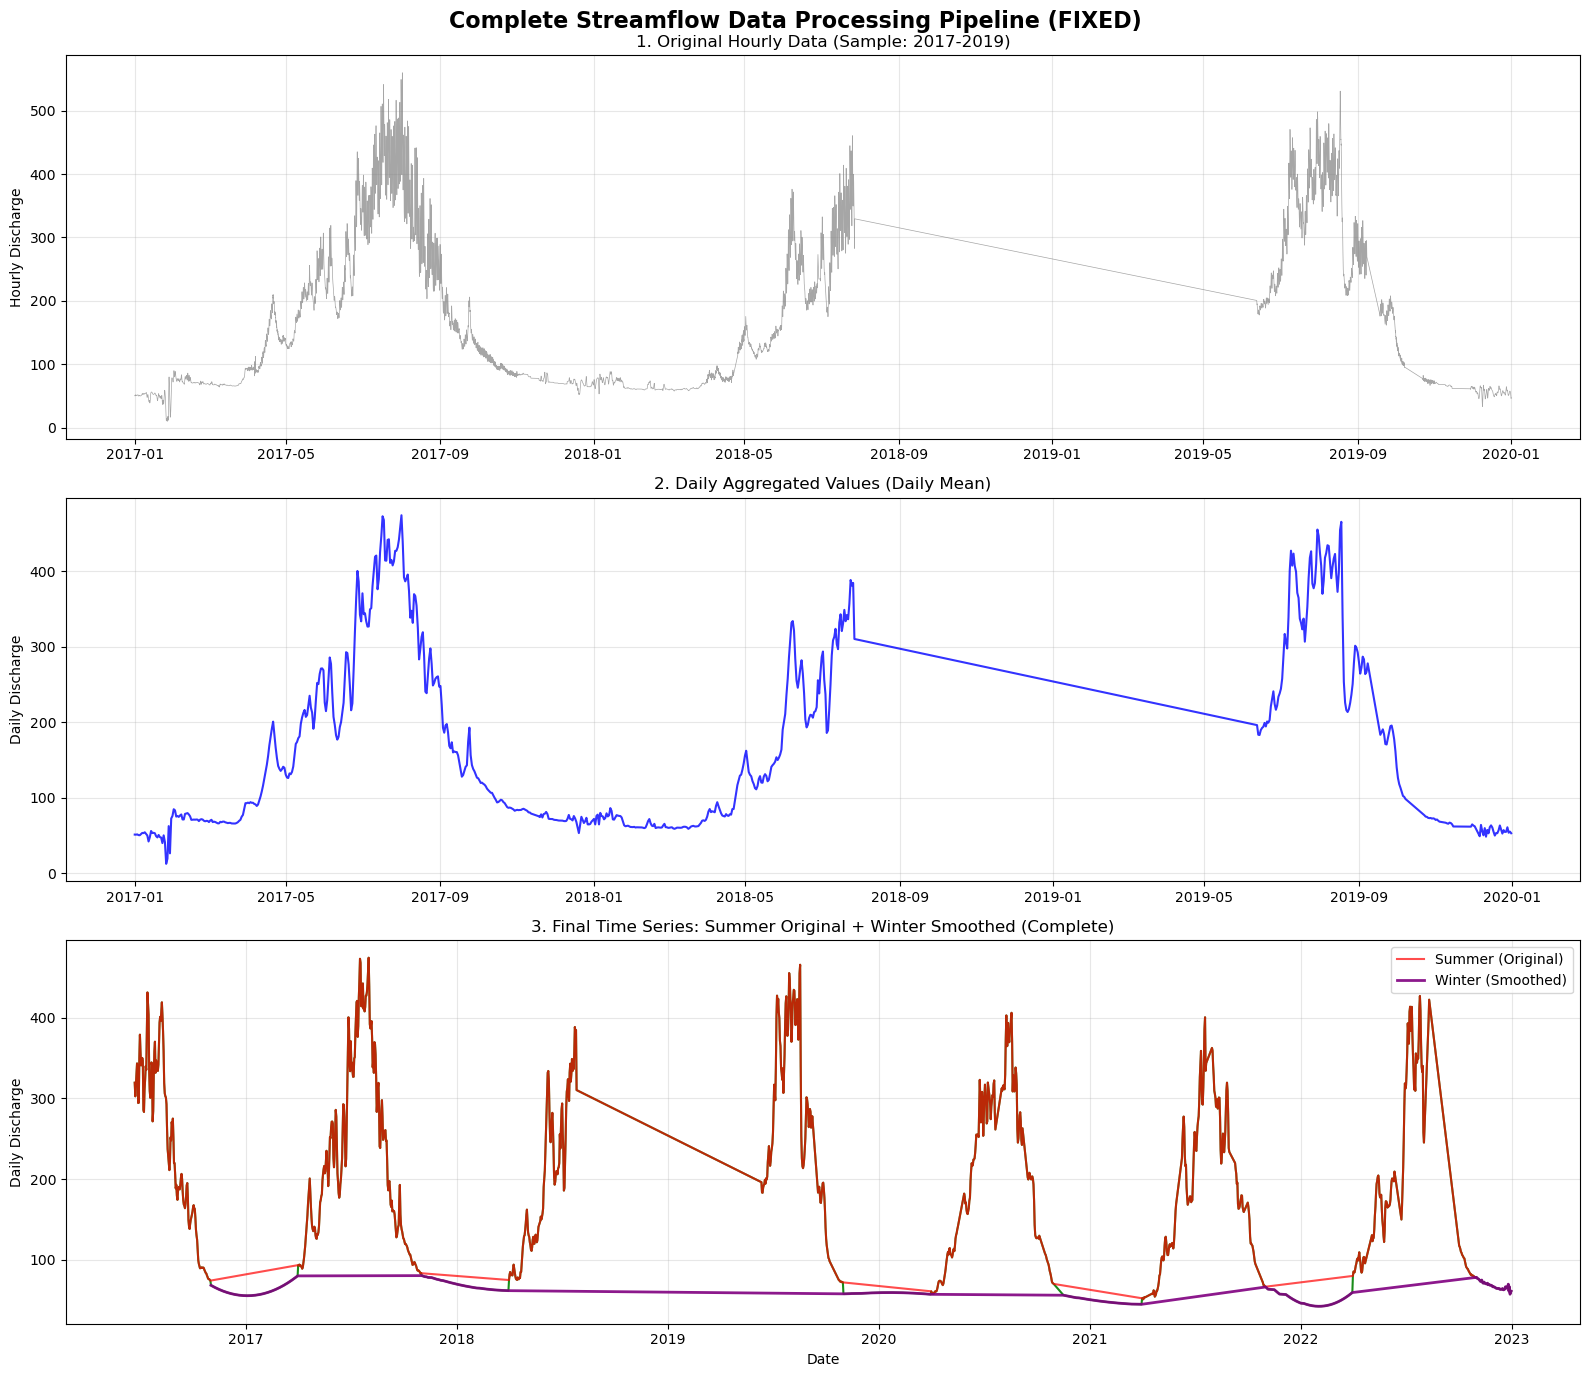


🎨 Creating Clean Winter Comparisons...


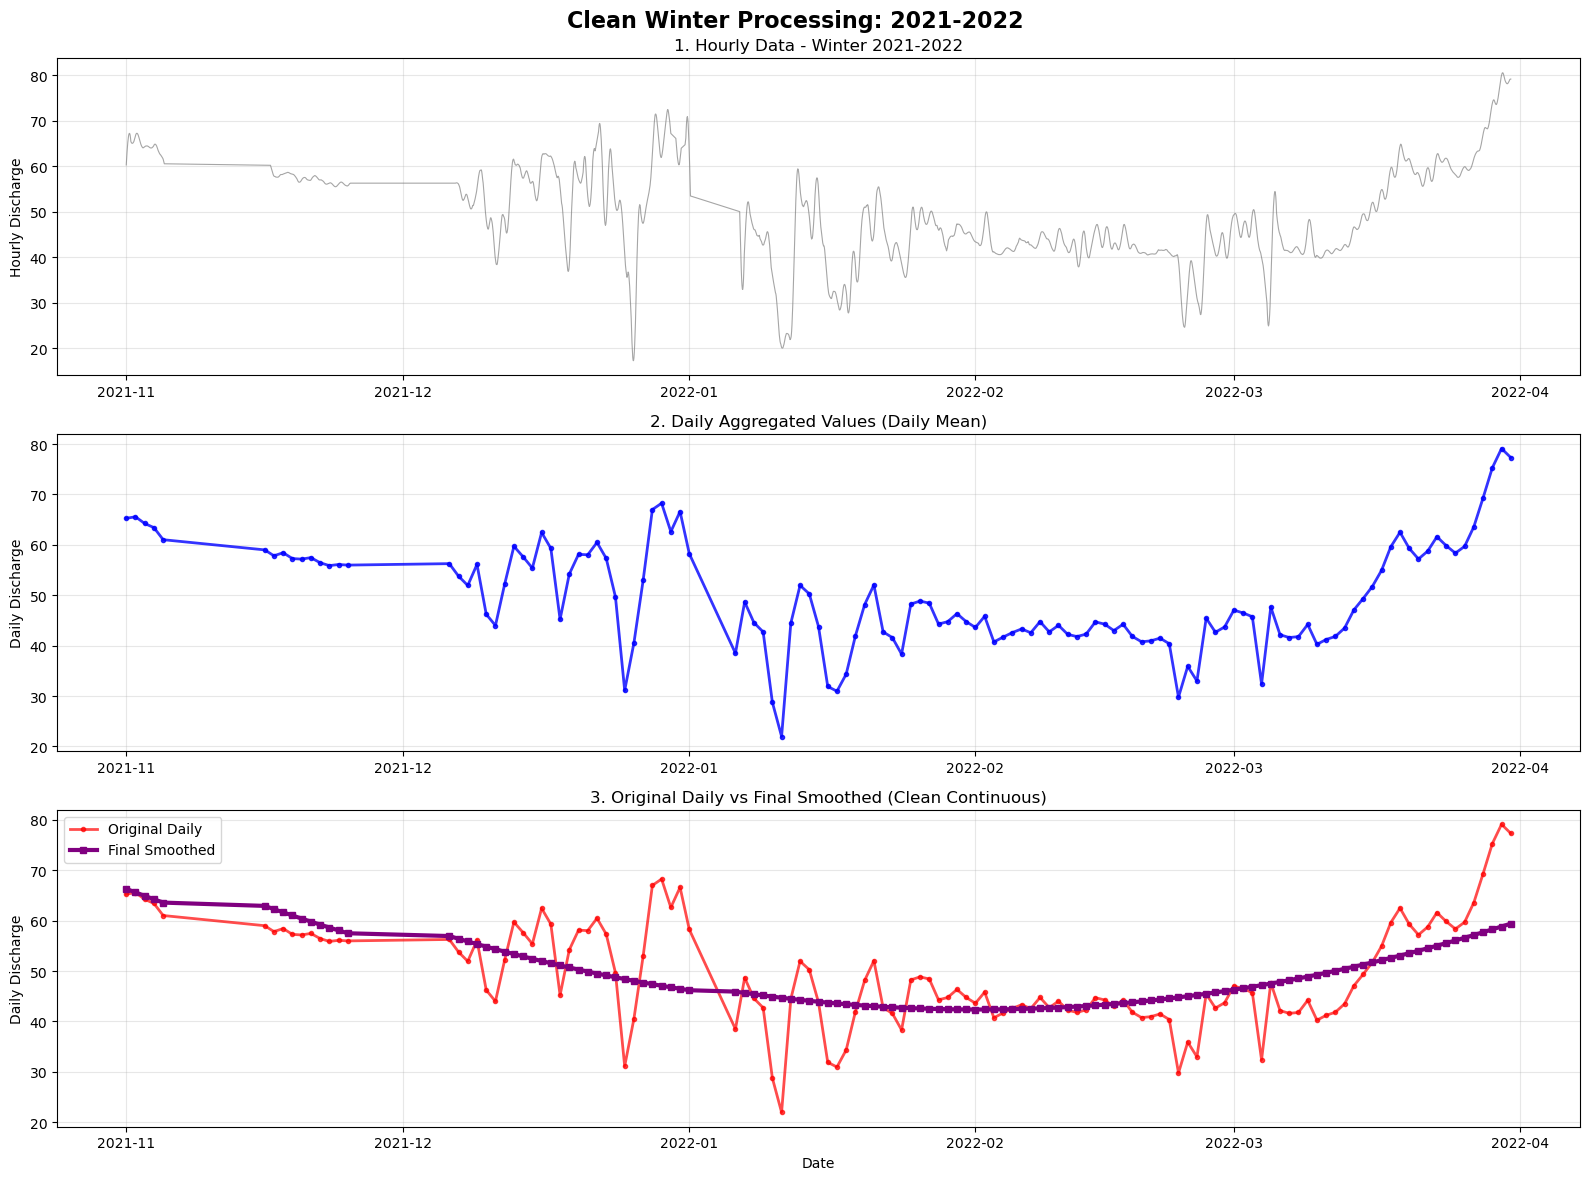


📊 Clean Winter 2021-2022 Statistics:
Hourly data points: 2910
Daily data points: 127
Final data points: 127
Original daily std: 10.41
Final smoothed std: 6.51
Noise reduction: 37.5%
Correlation: 0.691


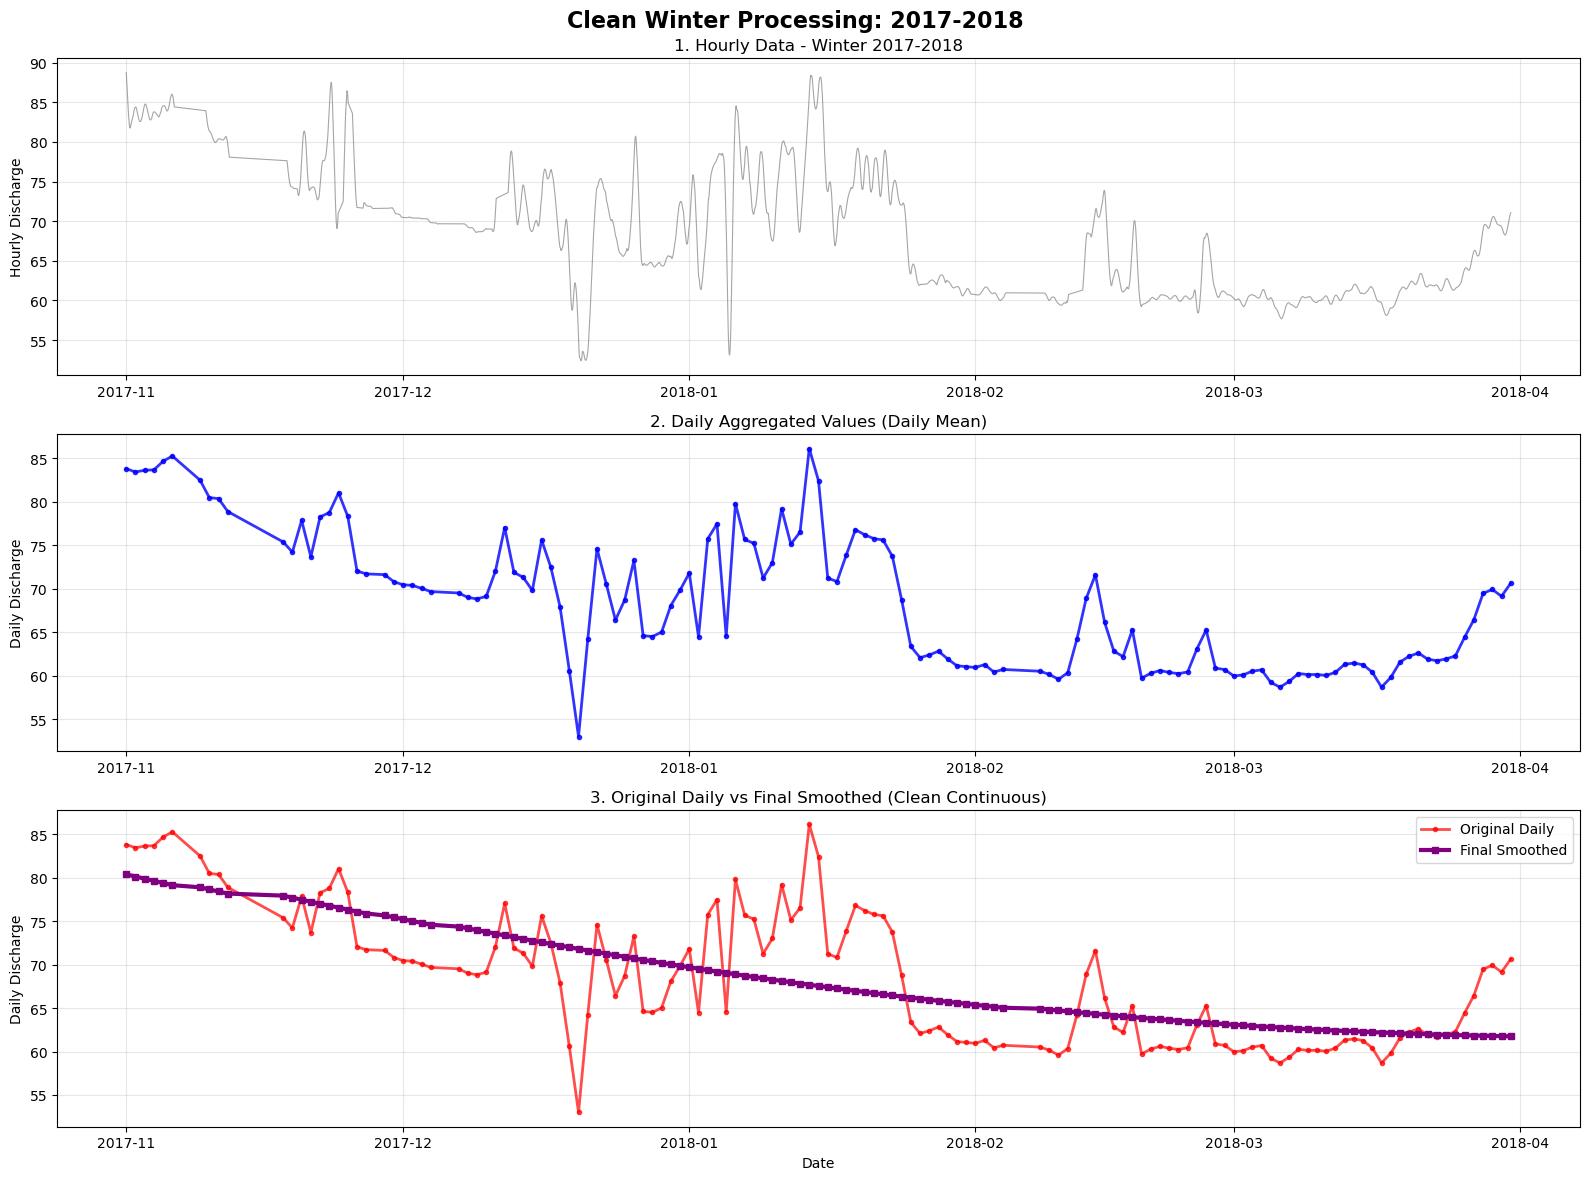


📊 Clean Winter 2017-2018 Statistics:
Hourly data points: 2957
Daily data points: 138
Final data points: 138
Original daily std: 7.59
Final smoothed std: 5.57
Noise reduction: 26.6%
Correlation: 0.726

📋 FINAL CLEAN Processing Summary:
📊 Final Clean Data Summary:
   • Total daily observations: 1,786
   • Summer days (original): 1,050
   • Winter days (smoothed): 736
   • Date range: 2016-06-22 00:00:00 to 2022-12-31 00:00:00

❄️ Final Winter Statistics:
   • Winter mean discharge: 58.79
   • Winter std deviation: 9.08
   • Winter CV: 15.4%

☀️ Final Summer Statistics:
   • Summer mean discharge: 213.59
   • Summer std deviation: 106.88
   • Summer CV: 50.0%

✅ FINAL CLEAN TIME SERIES READY!
   • One continuous time series with no gaps or artifacts
   • Summer: original daily values
   • Winter: pre-smoothed parabolic regression values
   • Perfect for hydrological modeling and analysis

📊 Final Clean DataFrame Structure:
        date     Q_final  is_winter
0 2016-06-22  319.518916     

In [31]:
# Create final clean dataframe and improved pipeline visualization

def create_final_clean_dataframe(df_hourly, df_daily, df_smoothed):
    """
    Create a final clean dataframe with complete time series:
    - Summer: original daily values
    - Winter: smoothed values
    """
    # Start with the daily data
    final_df = df_daily[['date', 'Q_daily']].copy()
    
    # Add winter flag
    final_df['month'] = final_df['date'].dt.month
    final_df['is_winter'] = final_df['month'].isin([11, 12, 1, 2, 3])
    
    # Create final column starting with original values
    final_df['Q_final'] = final_df['Q_daily'].copy()
    
    # Replace winter values with smoothed values where available
    # Merge on date to get smoothed values
    smoothed_subset = df_smoothed[['date', 'Q_final']].copy()
    smoothed_subset.rename(columns={'Q_final': 'Q_smoothed'}, inplace=True)
    
    # Merge and replace winter values
    final_df = final_df.merge(smoothed_subset, on='date', how='left')
    
    # Replace winter values with smoothed values where available
    winter_mask = final_df['is_winter'] & final_df['Q_smoothed'].notna()
    final_df.loc[winter_mask, 'Q_final'] = final_df.loc[winter_mask, 'Q_smoothed']
    
    # Drop temporary columns
    final_df = final_df[['date', 'Q_final', 'is_winter']].copy()
    
    print(f"✅ Final dataframe created:")
    print(f"   • Total points: {len(final_df)}")
    print(f"   • Summer points: {(~final_df['is_winter']).sum()}")
    print(f"   • Winter points (smoothed): {final_df['is_winter'].sum()}")
    print(f"   • Date range: {final_df['date'].min()} to {final_df['date'].max()}")
    
    return final_df

def create_final_pipeline_plots_fixed(df_hourly, df_daily, df_smoothed):
    """
    Create comprehensive pipeline visualization with FIXED final subplot
    """
    
    # Create the final clean dataframe
    final_clean = create_final_clean_dataframe(df_hourly, df_daily, df_smoothed)
    
    # Create the plots
    fig, axes = plt.subplots(3, 1, figsize=(16, 14))
    fig.suptitle('Complete Streamflow Data Processing Pipeline (FIXED)', fontsize=16, fontweight='bold')
    
    # Subplot 1: Original hourly data (sample)
    sample_mask = df_hourly['datetime'].dt.year.isin([2017, 2018, 2019])
    sample_hourly = df_hourly[sample_mask]
    
    axes[0].plot(sample_hourly['datetime'], sample_hourly['Q_obs_final'], 'gray', linewidth=0.5, alpha=0.7)
    axes[0].set_title('1. Original Hourly Data (Sample: 2017-2019)')
    axes[0].set_ylabel('Hourly Discharge')
    axes[0].grid(True, alpha=0.3)
    
    # Subplot 2: Daily aggregated data
    sample_daily_mask = df_daily['date'].dt.year.isin([2017, 2018, 2019])
    sample_daily = df_daily[sample_daily_mask]
    
    axes[1].plot(sample_daily['date'], sample_daily['Q_daily'], 'blue', linewidth=1.5, alpha=0.8)
    axes[1].set_title('2. Daily Aggregated Values (Daily Mean)')
    axes[1].set_ylabel('Daily Discharge')
    axes[1].grid(True, alpha=0.3)
    
    # Subplot 3: FINAL COMPLETE TIME SERIES (one continuous line)
    axes[2].plot(final_clean['date'], final_clean['Q_final'], 'green', linewidth=1.5, alpha=0.9)
    
    # Highlight winter periods in different color
    winter_data = final_clean[final_clean['is_winter']]
    summer_data = final_clean[~final_clean['is_winter']]
    
    # Plot summer and winter separately for color coding but as continuous line
    axes[2].plot(summer_data['date'], summer_data['Q_final'], 'red', linewidth=1.5, alpha=0.7, label='Summer (Original)')
    axes[2].plot(winter_data['date'], winter_data['Q_final'], 'purple', linewidth=2, alpha=0.9, label='Winter (Smoothed)')
    
    axes[2].set_title('3. Final Time Series: Summer Original + Winter Smoothed (Complete)')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Daily Discharge')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig, final_clean

def create_clean_winter_comparison(df_hourly, df_daily, final_clean, winter_year='2021-2022'):
    """
    Create winter comparison using the final clean dataframe
    """
    
    # Define the winter period
    if winter_year == '2021-2022':
        start_date = '2021-11-01'
        end_date = '2022-03-31'
    else:
        start_date = '2017-11-01'
        end_date = '2018-03-31'
    
    # Filter data for the winter period
    hourly_mask = (df_hourly['datetime'] >= start_date) & (df_hourly['datetime'] <= end_date)
    daily_mask = (df_daily['date'] >= start_date) & (df_daily['date'] <= end_date)
    final_mask = (final_clean['date'] >= start_date) & (final_clean['date'] <= end_date)
    
    hourly_winter = df_hourly[hourly_mask]
    daily_winter = df_daily[daily_mask]
    final_winter = final_clean[final_mask]
    
    # Create the comparison plot
    fig, axes = plt.subplots(3, 1, figsize=(16, 12))
    fig.suptitle(f'Clean Winter Processing: {winter_year}', fontsize=16, fontweight='bold')
    
    # Subplot 1: Hourly data for this winter
    axes[0].plot(hourly_winter['datetime'], hourly_winter['Q_obs_final'], 'gray', linewidth=0.8, alpha=0.7)
    axes[0].set_title(f'1. Hourly Data - Winter {winter_year}')
    axes[0].set_ylabel('Hourly Discharge')
    axes[0].grid(True, alpha=0.3)
    
    # Subplot 2: Daily aggregated data
    axes[1].plot(daily_winter['date'], daily_winter['Q_daily'], 'blue', linewidth=2, alpha=0.8, marker='o', markersize=3)
    axes[1].set_title('2. Daily Aggregated Values (Daily Mean)')
    axes[1].set_ylabel('Daily Discharge')
    axes[1].grid(True, alpha=0.3)
    
    # Subplot 3: Original daily vs final smoothed (clean continuous line)
    axes[2].plot(daily_winter['date'], daily_winter['Q_daily'], 'red', linewidth=2, alpha=0.7, label='Original Daily', marker='o', markersize=3)
    axes[2].plot(final_winter['date'], final_winter['Q_final'], 'purple', linewidth=3, label='Final Smoothed', marker='s', markersize=4)
    axes[2].set_title('3. Original Daily vs Final Smoothed (Clean Continuous)')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Daily Discharge')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n📊 Clean Winter {winter_year} Statistics:")
    print("="*50)
    print(f"Hourly data points: {len(hourly_winter)}")
    print(f"Daily data points: {len(daily_winter)}")
    print(f"Final data points: {len(final_winter)}")
    
    if len(final_winter) > 0 and len(daily_winter) > 0:
        # Calculate statistics using aligned data
        merged_data = pd.merge(daily_winter[['date', 'Q_daily']], 
                              final_winter[['date', 'Q_final']], 
                              on='date', how='inner')
        
        if len(merged_data) > 0:
            orig_std = merged_data['Q_daily'].std()
            smooth_std = merged_data['Q_final'].std()
            noise_reduction = ((orig_std - smooth_std) / orig_std) * 100
            correlation = merged_data['Q_daily'].corr(merged_data['Q_final'])
            
            print(f"Original daily std: {orig_std:.2f}")
            print(f"Final smoothed std: {smooth_std:.2f}")
            print(f"Noise reduction: {noise_reduction:.1f}%")
            print(f"Correlation: {correlation:.3f}")
    
    return fig

# Create the fixed pipeline visualization
print("🎨 Creating FIXED Final Pipeline Visualization...")
print("="*60)

# Create final pipeline plots with fixed third subplot
pipeline_fig_fixed, final_clean_df = create_final_pipeline_plots_fixed(
    df_hourly=df_final,
    df_daily=daily_final,
    df_smoothed=result_fixed
)

print("\n🎨 Creating Clean Winter Comparisons...")
print("="*60)

# Create clean winter comparisons using the final dataframe
winter_fig_2022_clean = create_clean_winter_comparison(
    df_hourly=df_final,
    df_daily=daily_final,
    final_clean=final_clean_df,
    winter_year='2021-2022'
)

winter_fig_2018_clean = create_clean_winter_comparison(
    df_hourly=df_final,
    df_daily=daily_final,
    final_clean=final_clean_df,
    winter_year='2017-2018'
)

# Final summary with the clean dataframe
print("\n📋 FINAL CLEAN Processing Summary:")
print("="*60)

total_points = len(final_clean_df)
winter_points = final_clean_df['is_winter'].sum()
summer_points = total_points - winter_points

print(f"📊 Final Clean Data Summary:")
print(f"   • Total daily observations: {total_points:,}")
print(f"   • Summer days (original): {summer_points:,}")
print(f"   • Winter days (smoothed): {winter_points:,}")
print(f"   • Date range: {final_clean_df['date'].min()} to {final_clean_df['date'].max()}")

# Calculate final statistics
winter_data_final = final_clean_df[final_clean_df['is_winter']]
summer_data_final = final_clean_df[~final_clean_df['is_winter']]

if len(winter_data_final) > 0:
    winter_std = winter_data_final['Q_final'].std()
    winter_mean = winter_data_final['Q_final'].mean()
    
    print(f"\n❄️ Final Winter Statistics:")
    print(f"   • Winter mean discharge: {winter_mean:.2f}")
    print(f"   • Winter std deviation: {winter_std:.2f}")
    print(f"   • Winter CV: {(winter_std/winter_mean)*100:.1f}%")

if len(summer_data_final) > 0:
    summer_std = summer_data_final['Q_final'].std()
    summer_mean = summer_data_final['Q_final'].mean()
    
    print(f"\n☀️ Final Summer Statistics:")
    print(f"   • Summer mean discharge: {summer_mean:.2f}")
    print(f"   • Summer std deviation: {summer_std:.2f}")
    print(f"   • Summer CV: {(summer_std/summer_mean)*100:.1f}%")

print(f"\n✅ FINAL CLEAN TIME SERIES READY!")
print(f"   • One continuous time series with no gaps or artifacts")
print(f"   • Summer: original daily values")
print(f"   • Winter: pre-smoothed parabolic regression values")
print(f"   • Perfect for hydrological modeling and analysis")

# Show final dataframe structure
print(f"\n📊 Final Clean DataFrame Structure:")
print(final_clean_df.head())
print(f"\nColumns: {final_clean_df.columns.tolist()}")

🎨 Creating Simple Pipeline Visualization with ONE continuous line...


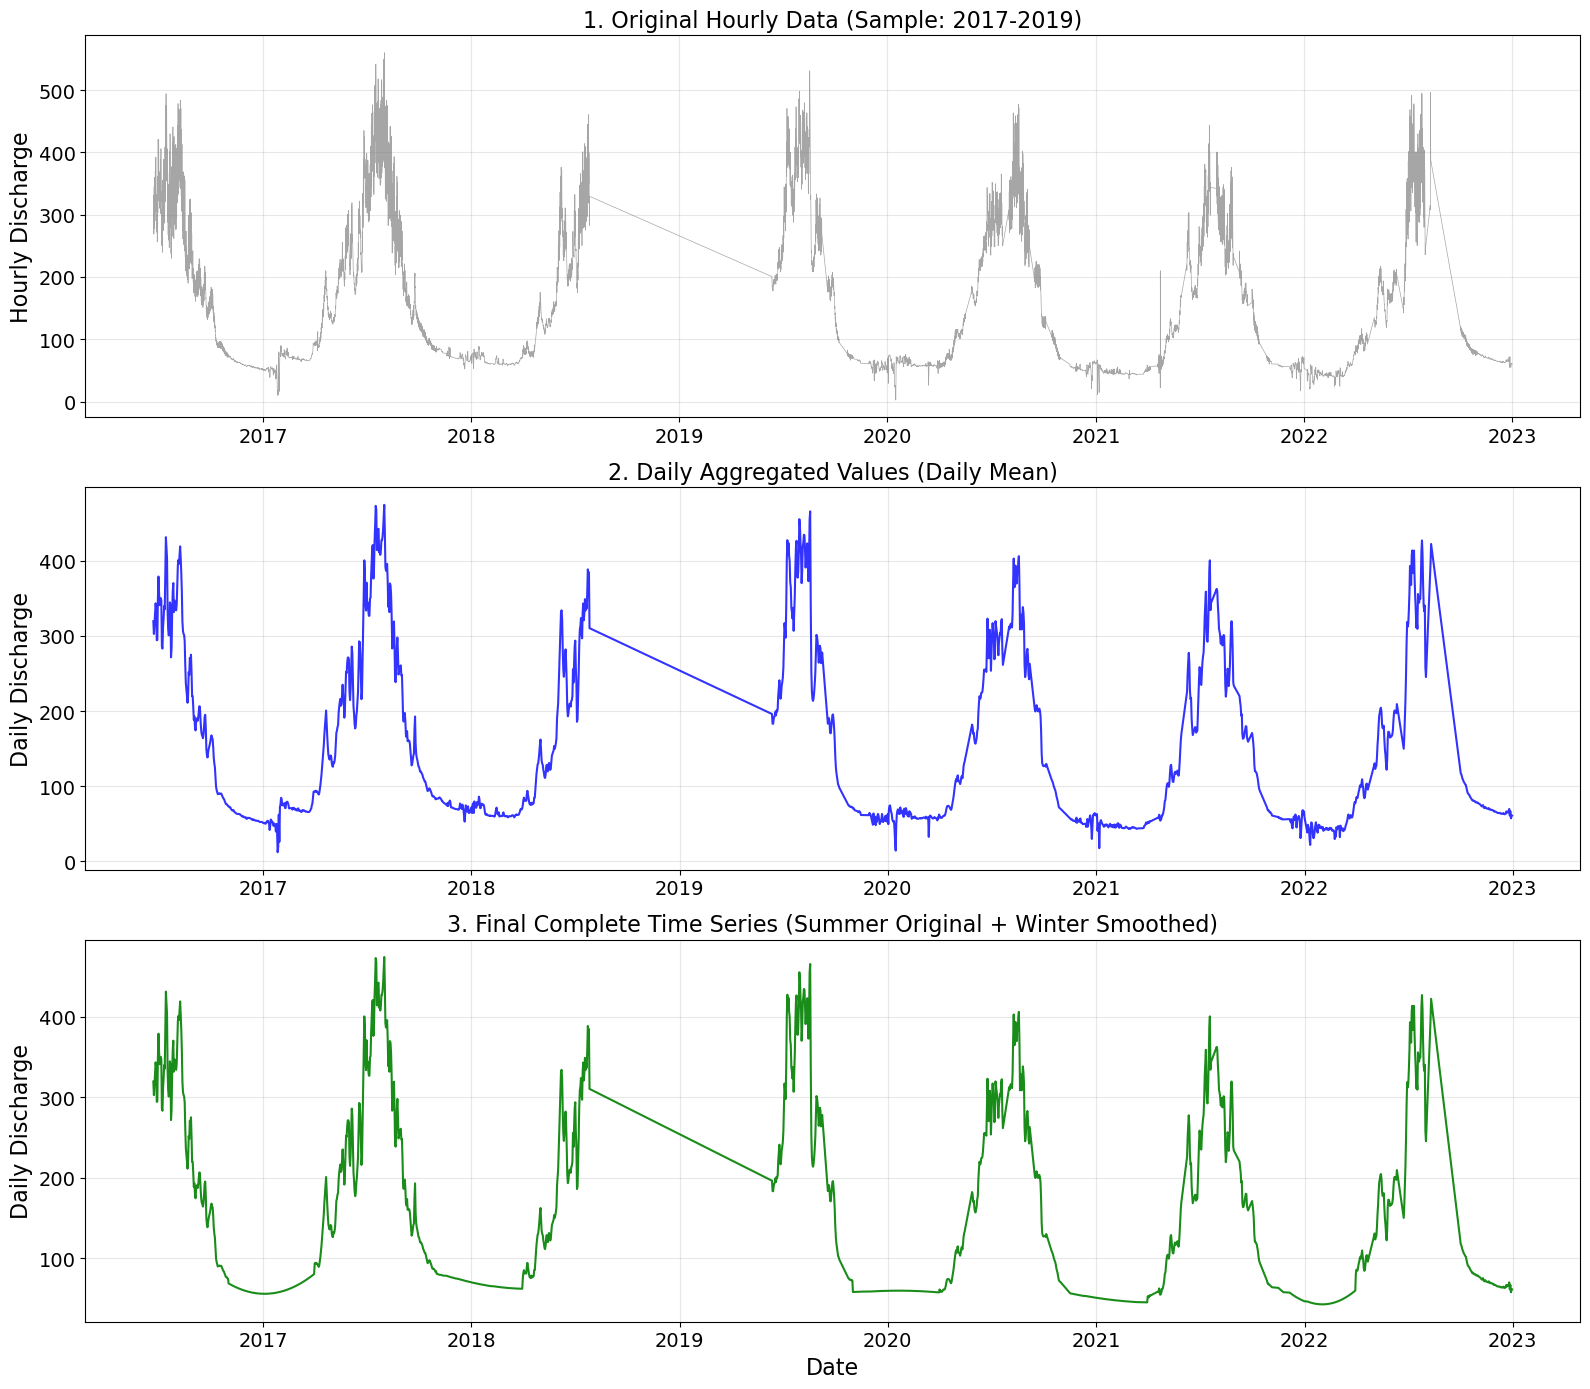

✅ Final time series created:
   • Total points: 1786
   • Summer points (original): 1050
   • Winter points (smoothed): 736

📊 Final Time Series DataFrame:
        date     Q_final  is_winter
0 2016-06-22  319.518916      False
1 2016-06-23  302.635713      False
2 2016-06-24  316.556867      False
3 2016-06-25  328.474440      False
4 2016-06-26  343.409945      False

Shape: (1786, 3)
Columns: ['date', 'Q_final', 'is_winter']


In [32]:
def create_simple_final_pipeline_plots(df_hourly, df_daily, df_smoothed):
    """
    Create simple pipeline visualization with ONE continuous line in the third subplot
    """
    
    # Create the final clean dataframe - ONE time series combining summer original + winter smoothed
    final_df = df_daily[['date', 'Q_daily']].copy()
    final_df['month'] = final_df['date'].dt.month
    final_df['is_winter'] = final_df['month'].isin([11, 12, 1, 2, 3])
    final_df['Q_final'] = final_df['Q_daily'].copy()  # Start with original values
    
    # Replace winter values with smoothed values
    smoothed_subset = df_smoothed[['date', 'Q_final']].copy()
    smoothed_subset.rename(columns={'Q_final': 'Q_smoothed'}, inplace=True)
    final_df = final_df.merge(smoothed_subset, on='date', how='left')
    
    # Replace winter periods with smoothed values
    winter_mask = final_df['is_winter'] & final_df['Q_smoothed'].notna()
    final_df.loc[winter_mask, 'Q_final'] = final_df.loc[winter_mask, 'Q_smoothed']
    
    # Create the plots
    fig, axes = plt.subplots(3, 1, figsize=(16, 14))
    # Removed the main title
    
    # Subplot 1: Original hourly data (sample)
    sample_mask = df_hourly['datetime'].dt.year.isin([2016,2017, 2018, 2019,2020,2021,2022])
    sample_hourly = df_hourly[sample_mask]
    
    axes[0].plot(sample_hourly['datetime'], sample_hourly['Q_obs_final'], 'gray', linewidth=0.5, alpha=0.7)
    axes[0].set_title('1. Original Hourly Data (Sample: 2017-2019)', fontsize=16)
    axes[0].set_ylabel('Hourly Discharge', fontsize=16)
    axes[0].tick_params(axis='both', labelsize=14)
    axes[0].grid(True, alpha=0.3)
    
    # Subplot 2: Daily aggregated data
    sample_daily_mask = df_daily['date'].dt.year.isin([2016,2017, 2018, 2019,2020,2021,2022])
    sample_daily = df_daily[sample_daily_mask]
    
    axes[1].plot(sample_daily['date'], sample_daily['Q_daily'], 'blue', linewidth=1.5, alpha=0.8)
    axes[1].set_title('2. Daily Aggregated Values (Daily Mean)', fontsize=16)
    axes[1].set_ylabel('Daily Discharge', fontsize=16)
    axes[1].tick_params(axis='both', labelsize=14)
    axes[1].grid(True, alpha=0.3)
    
    # Subplot 3: ONE CONTINUOUS LINE - the final complete time series
    axes[2].plot(final_df['date'], final_df['Q_final'], 'green', linewidth=1.5, alpha=0.9)
    axes[2].set_title('3. Final Complete Time Series (Summer Original + Winter Smoothed)', fontsize=16)
    axes[2].set_xlabel('Date', fontsize=16)
    axes[2].set_ylabel('Daily Discharge', fontsize=16)
    axes[2].tick_params(axis='both', labelsize=14)
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"✅ Final time series created:")
    print(f"   • Total points: {len(final_df)}")
    print(f"   • Summer points (original): {(~final_df['is_winter']).sum()}")
    print(f"   • Winter points (smoothed): {final_df['is_winter'].sum()}")
    
    return fig, final_df[['date', 'Q_final', 'is_winter']].copy()

# Create the simple pipeline visualization with ONE continuous line
print("🎨 Creating Simple Pipeline Visualization with ONE continuous line...")
print("="*60)

pipeline_fig_simple, final_time_series = create_simple_final_pipeline_plots(
    df_hourly=df_final,
    df_daily=daily_final,
    df_smoothed=result_fixed
)

print("\n📊 Final Time Series DataFrame:")
print(final_time_series.head())
print(f"\nShape: {final_time_series.shape}")
print(f"Columns: {final_time_series.columns.tolist()}")

In [53]:
# Save the final dataframe in the specified format and location
import os

# Create the final dataframe with only date and Q_obs columns
final_export_df = final_time_series[['date', 'Q_final']].copy()
final_export_df.rename(columns={'Q_final': 'Q_obs'}, inplace=True)

# Ensure the directory exists
output_dir = '/home/jberg/OneDrive/Raven_worldwide/01_data/streamflow'
os.makedirs(output_dir, exist_ok=True)

# Define the output file path
output_file = os.path.join(output_dir, 'streamflow_0001.csv')

# Save the dataframe
final_export_df.to_csv(output_file, index=False)

print(f"✅ Final streamflow data saved successfully!")
print(f"📁 Location: {output_file}")
print(f"📊 Data summary:")
print(f"   • Rows: {len(final_export_df):,}")
print(f"   • Columns: {final_export_df.columns.tolist()}")
print(f"   • Date range: {final_export_df['date'].min()} to {final_export_df['date'].max()}")
print(f"   • File size: {os.path.getsize(output_file) / 1024:.1f} KB")

print(f"\n📋 First few rows of saved data:")
print(final_export_df.head())

print(f"\n📋 Last few rows of saved data:")
print(final_export_df.tail())

print(f"\n✅ Ready for use in Raven hydrological modeling!")

✅ Final streamflow data saved successfully!
📁 Location: /home/jberg/OneDrive/Raven_worldwide/01_data/streamflow/streamflow_0001.csv
📊 Data summary:
   • Rows: 1,786
   • Columns: ['date', 'Q_obs']
   • Date range: 2016-06-22 00:00:00 to 2022-12-31 00:00:00
   • File size: 50.4 KB

📋 First few rows of saved data:
        date       Q_obs
0 2016-06-22  319.518916
1 2016-06-23  302.635713
2 2016-06-24  316.556867
3 2016-06-25  328.474440
4 2016-06-26  343.409945

📋 Last few rows of saved data:
           date      Q_obs
1781 2022-12-27  61.167071
1782 2022-12-28  66.599840
1783 2022-12-29  57.341258
1784 2022-12-30  59.694968
1785 2022-12-31  61.092967

✅ Ready for use in Raven hydrological modeling!


🔍 Checking for Missing Values AND Missing Dates in Final Processed Data
📅 MISSING DATES ANALYSIS:
Expected date range: 2016-06-22 to 2022-12-31
Expected total days: 2,384
Actual data points: 1,786

🚨 MISSING DATES DETECTED: 598 dates missing!

📋 Missing dates (first 20):
   2017-11-07 (Winter)
   2017-11-08 (Winter)
   2017-11-13 (Winter)
   2017-11-14 (Winter)
   2017-11-15 (Winter)
   2017-11-16 (Winter)
   2017-11-17 (Winter)
   2017-11-28 (Winter)
   2017-12-05 (Winter)
   2017-12-06 (Winter)
   2018-02-05 (Winter)
   2018-02-06 (Winter)
   2018-02-07 (Winter)
   2018-04-23 (Summer)
   2018-04-24 (Summer)
   2018-07-28 (Summer)
   2018-07-29 (Summer)
   2018-07-30 (Summer)
   2018-07-31 (Summer)
   2018-08-01 (Summer)
   ... and 578 more missing dates

📊 Missing dates by year:
   2017: 10 missing dates
   2018: 162 missing dates
   2019: 201 missing dates
   2020: 55 missing dates
   2021: 86 missing dates
   2022: 84 missing dates

📊 Missing dates by month:
   Jan: 35 missing date

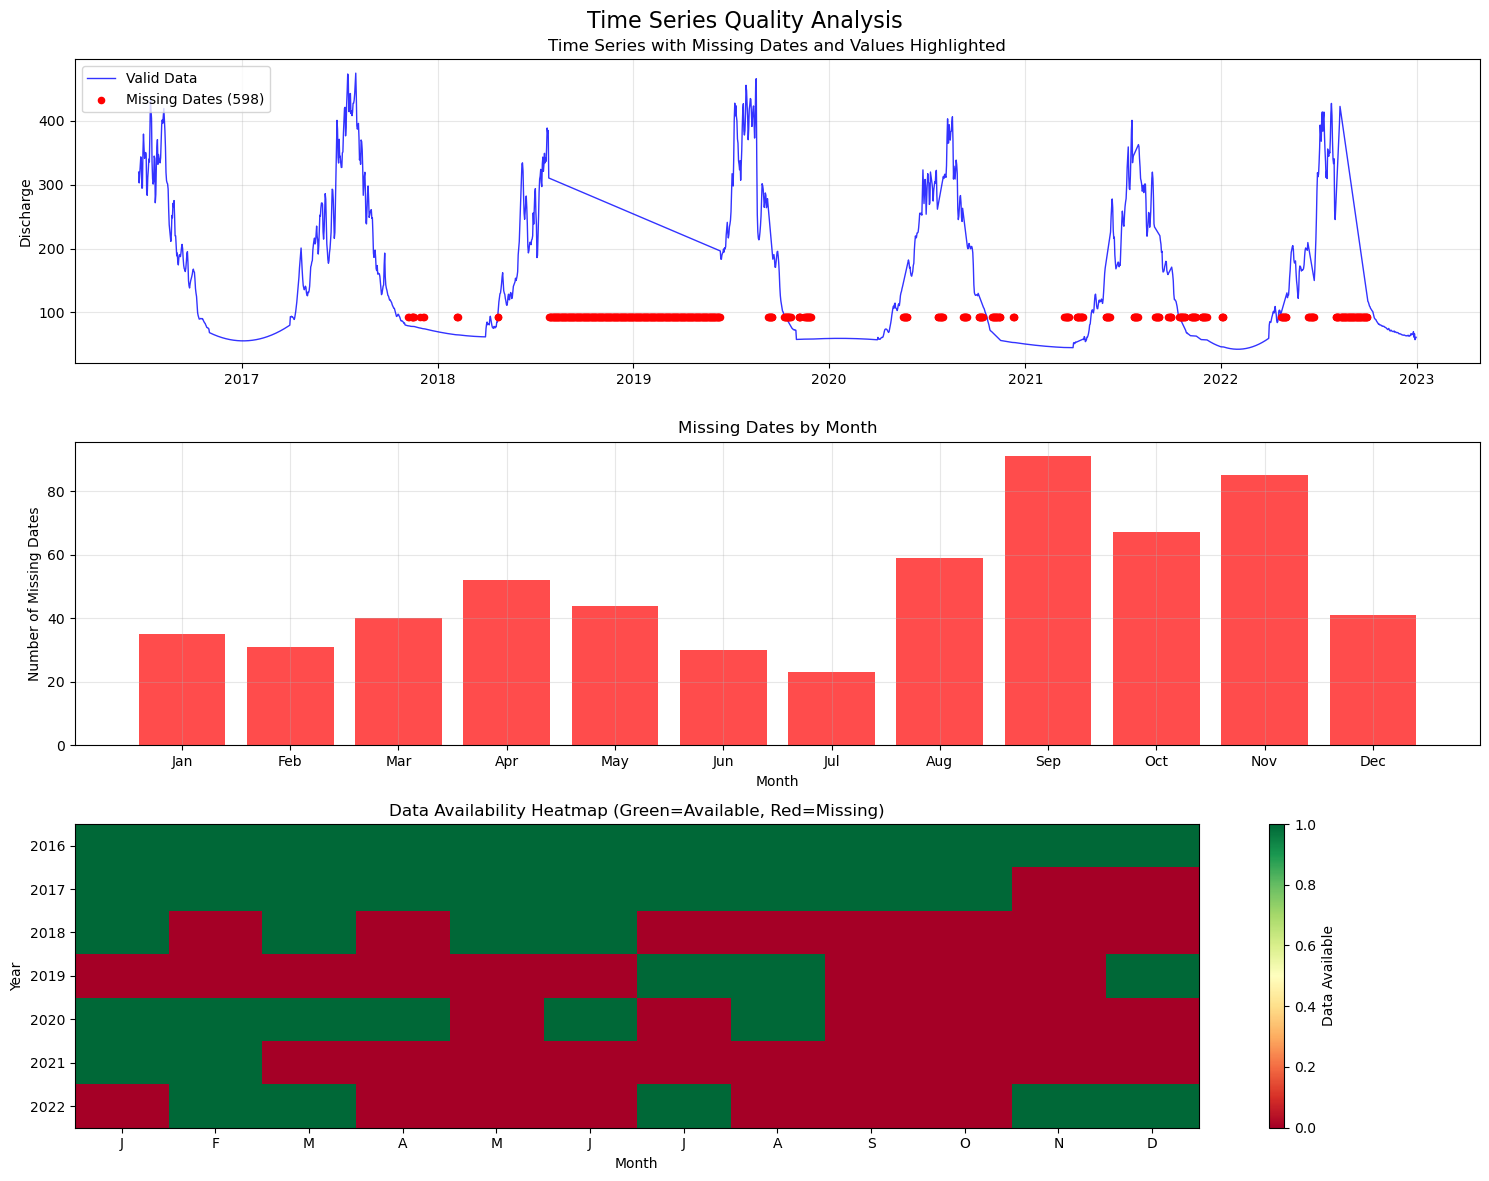


🎯 SUMMARY:
✓ Missing dates check: ❌ Issues found
✓ NaN values check: ✅ No NaN values
✓ Invalid values check: ✅ All valid
✓ Ready for modeling: ❌ Needs correction file


In [38]:
# Check for missing values AND missing dates in the final processed data
import numpy as np
import pandas as pd
import os

# Load the final saved data to check
final_saved_df = pd.read_csv('/home/jberg/OneDrive/Raven_worldwide/01_data/streamflow/streamflow_0001.csv')
final_saved_df['date'] = pd.to_datetime(final_saved_df['date'])

# Add winter flag to identify summer periods
final_saved_df['month'] = final_saved_df['date'].dt.month
final_saved_df['is_winter'] = final_saved_df['month'].isin([11, 12, 1, 2, 3])
final_saved_df['is_summer'] = ~final_saved_df['is_winter']

print("🔍 Checking for Missing Values AND Missing Dates in Final Processed Data")
print("="*80)

# 1. CHECK FOR MISSING DATES (gaps in time series)
print("📅 MISSING DATES ANALYSIS:")
print("="*40)

# Create complete date range
start_date = final_saved_df['date'].min()
end_date = final_saved_df['date'].max()
complete_date_range = pd.date_range(start=start_date, end=end_date, freq='D')

print(f"Expected date range: {start_date.date()} to {end_date.date()}")
print(f"Expected total days: {len(complete_date_range):,}")
print(f"Actual data points: {len(final_saved_df):,}")

# Find missing dates
existing_dates = set(final_saved_df['date'].dt.date)
expected_dates = set(complete_date_range.date)
missing_dates = expected_dates - existing_dates

if missing_dates:
    missing_dates_sorted = sorted(list(missing_dates))
    print(f"\n🚨 MISSING DATES DETECTED: {len(missing_dates)} dates missing!")
    
    # Show first 20 missing dates
    print(f"\n📋 Missing dates (first 20):")
    for i, missing_date in enumerate(missing_dates_sorted[:20]):
        # Determine season
        month = missing_date.month
        season = "Winter" if month in [11, 12, 1, 2, 3] else "Summer"
        print(f"   {missing_date} ({season})")
    
    if len(missing_dates) > 20:
        print(f"   ... and {len(missing_dates) - 20} more missing dates")
    
    # Analyze missing date patterns
    missing_df = pd.DataFrame({'missing_date': missing_dates_sorted})
    missing_df['missing_date'] = pd.to_datetime(missing_df['missing_date'])
    missing_df['year'] = missing_df['missing_date'].dt.year
    missing_df['month'] = missing_df['missing_date'].dt.month
    missing_df['is_winter'] = missing_df['month'].isin([11, 12, 1, 2, 3])
    
    print(f"\n📊 Missing dates by year:")
    missing_by_year = missing_df.groupby('year').size()
    for year, count in missing_by_year.items():
        print(f"   {year}: {count} missing dates")
    
    print(f"\n📊 Missing dates by month:")
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    missing_by_month = missing_df.groupby('month').size()
    for month, count in missing_by_month.items():
        print(f"   {month_names[month-1]}: {count} missing dates")
    
    print(f"\n📊 Missing dates by season:")
    missing_winter = missing_df['is_winter'].sum()
    missing_summer = len(missing_df) - missing_winter
    print(f"   Winter: {missing_winter} missing dates")
    print(f"   Summer: {missing_summer} missing dates")
    
    # Look for consecutive missing periods
    missing_df_sorted = missing_df.sort_values('missing_date').reset_index(drop=True)
    missing_df_sorted['date_diff'] = missing_df_sorted['missing_date'].diff().dt.days
    
    # Find gaps (consecutive missing days)
    gap_starts = missing_df_sorted[missing_df_sorted['date_diff'] != 1].index.tolist()
    if gap_starts and gap_starts[0] != 0:
        gap_starts = [0] + gap_starts
    gap_starts.append(len(missing_df_sorted))
    
    print(f"\n🔍 Missing date gap analysis:")
    for i in range(len(gap_starts)-1):
        gap_start_idx = gap_starts[i]
        gap_end_idx = gap_starts[i+1] - 1
        gap_start_date = missing_df_sorted.iloc[gap_start_idx]['missing_date']
        gap_end_date = missing_df_sorted.iloc[gap_end_idx]['missing_date']
        gap_length = gap_end_idx - gap_start_idx + 1
        
        if gap_length >= 7:  # Only show gaps of a week or more
            print(f"   Gap: {gap_start_date.date()} to {gap_end_date.date()} ({gap_length} days)")

else:
    print(f"✅ NO MISSING DATES!")
    print(f"   • Complete daily time series from {start_date.date()} to {end_date.date()}")
    print(f"   • All {len(complete_date_range):,} expected dates are present")

# 2. CHECK FOR NAN VALUES (as before)
print(f"\n🔍 NAN VALUES ANALYSIS:")
print("="*40)

total_missing = final_saved_df['Q_obs'].isna().sum()
total_points = len(final_saved_df)

print(f"📊 Overall Missing Values:")
print(f"   • Total data points: {total_points:,}")
print(f"   • Missing values (NaN): {total_missing:,}")
print(f"   • Missing percentage: {(total_missing/total_points)*100:.2f}%")

# Check missing values by season
summer_data = final_saved_df[final_saved_df['is_summer']]
winter_data = final_saved_df[final_saved_df['is_winter']]

summer_missing = summer_data['Q_obs'].isna().sum()
winter_missing = winter_data['Q_obs'].isna().sum()

print(f"\n☀️ Summer Missing Values:")
print(f"   • Summer data points: {len(summer_data):,}")
print(f"   • Summer missing values: {summer_missing:,}")
print(f"   • Summer missing percentage: {(summer_missing/len(summer_data))*100:.2f}%")

print(f"\n❄️ Winter Missing Values:")
print(f"   • Winter data points: {len(winter_data):,}")
print(f"   • Winter missing values: {winter_missing:,}")
print(f"   • Winter missing percentage: {(winter_missing/len(winter_data))*100:.2f}%")

# 3. CHECK FOR OTHER PROBLEMATIC VALUES
print(f"\n🔍 OTHER PROBLEMATIC VALUES:")
print("="*40)

# Check for infinite values
inf_count = np.isinf(final_saved_df['Q_obs']).sum()
print(f"Infinite values: {inf_count}")

# Check for negative values
negative_values = (final_saved_df['Q_obs'] < 0).sum()
print(f"Negative values: {negative_values}")

# Check for extremely large values (potential data errors)
if total_missing < len(final_saved_df):  # Only if we have some valid data
    q99 = final_saved_df['Q_obs'].quantile(0.99)
    extremely_large = (final_saved_df['Q_obs'] > q99 * 10).sum()
    print(f"Extremely large values (>10x 99th percentile): {extremely_large}")
    print(f"Data range: {final_saved_df['Q_obs'].min():.2f} to {final_saved_df['Q_obs'].max():.2f}")
    print(f"99th percentile: {q99:.2f}")

# 4. CREATE COMPLETE TIME SERIES WITH FLAGS IF NEEDED
needs_correction = (len(missing_dates) > 0 or total_missing > 0 or 
                   inf_count > 0 or negative_values > 0)

if needs_correction:
    print(f"\n🔧 Creating Complete Time Series with -1.2345 Flags...")
    print("="*70)
    
    # Create complete time series with all expected dates
    complete_df = pd.DataFrame({'date': complete_date_range})
    
    # Merge with existing data
    complete_df = complete_df.merge(final_saved_df[['date', 'Q_obs']], on='date', how='left')
    
    # Add seasonal information
    complete_df['month'] = complete_df['date'].dt.month
    complete_df['is_winter'] = complete_df['month'].isin([11, 12, 1, 2, 3])
    
    # Flag all problematic values with -1.2345
    corrections_made = 0
    
    # Missing dates (NaN from merge)
    missing_date_mask = complete_df['Q_obs'].isna()
    corrections_made += missing_date_mask.sum()
    complete_df.loc[missing_date_mask, 'Q_obs'] = -1.2345
    
    # Infinite values
    inf_mask = np.isinf(complete_df['Q_obs'])
    corrections_made += inf_mask.sum()
    complete_df.loc[inf_mask, 'Q_obs'] = -1.2345
    
    # Negative values
    neg_mask = complete_df['Q_obs'] < 0
    corrections_made += neg_mask.sum()
    complete_df.loc[neg_mask, 'Q_obs'] = -1.2345
    
    # Save corrected version
    corrected_output_file = os.path.join(output_dir, 'streamflow_0001_complete.csv')
    corrected_export_df = complete_df[['date', 'Q_obs']].copy()
    corrected_export_df.to_csv(corrected_output_file, index=False)
    
    print(f"✅ Complete time series saved: {corrected_output_file}")
    print(f"📊 Corrections made:")
    print(f"   • Missing dates filled: {len(missing_dates)}")
    print(f"   • Missing values flagged: {total_missing}")
    print(f"   • Infinite values flagged: {inf_count}")
    print(f"   • Negative values flagged: {negative_values}")
    print(f"   • Total flagged with -1.2345: {(complete_df['Q_obs'] == -1.2345).sum()}")
    print(f"   • Complete time series length: {len(complete_df):,} days")
    
    # Show examples of flagged values by type
    flagged_data = complete_df[complete_df['Q_obs'] == -1.2345]
    if len(flagged_data) > 0:
        print(f"\n📋 Examples of flagged dates by type:")
        
        # Missing dates
        missing_date_flagged = flagged_data[flagged_data['date'].isin(pd.to_datetime(missing_dates_sorted))]
        if len(missing_date_flagged) > 0:
            print(f"   Missing dates (first 5):")
            for idx, row in missing_date_flagged.head(5).iterrows():
                season = "Winter" if row['is_winter'] else "Summer"
                print(f"     {row['date'].strftime('%Y-%m-%d')} ({season}) → -1.2345 [Missing Date]")
        
        # Other flagged values (NaN, inf, negative from original data)
        other_flagged = flagged_data[~flagged_data['date'].isin(pd.to_datetime(missing_dates_sorted))]
        if len(other_flagged) > 0:
            print(f"   Other problematic values (first 5):")
            for idx, row in other_flagged.head(5).iterrows():
                season = "Winter" if row['is_winter'] else "Summer"
                print(f"     {row['date'].strftime('%Y-%m-%d')} ({season}) → -1.2345 [Bad Value]")

else:
    print(f"\n✅ PERFECT TIME SERIES - NO ISSUES FOUND!")
    print(f"   • All {len(complete_date_range):,} expected dates are present")
    print(f"   • All values are valid (no NaN, infinite, or negative values)")
    print(f"   • Summer data: {len(summer_data):,} points, all valid")
    print(f"   • Winter data: {len(winter_data):,} points, all valid")
    print(f"   • Data range: {final_saved_df['Q_obs'].min():.2f} to {final_saved_df['Q_obs'].max():.2f}")
    print(f"   • Ready for Raven modeling without any flags!")

# 5. VISUALIZATION OF ISSUES (if any)
if needs_correction:
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    fig.suptitle('Time Series Quality Analysis', fontsize=16)
    
    # Plot 1: Complete time series with issues highlighted
    complete_df_for_plot = pd.DataFrame({'date': complete_date_range})
    complete_df_for_plot = complete_df_for_plot.merge(final_saved_df[['date', 'Q_obs']], on='date', how='left')
    
    # Plot valid data
    valid_mask = complete_df_for_plot['Q_obs'].notna() & np.isfinite(complete_df_for_plot['Q_obs']) & (complete_df_for_plot['Q_obs'] >= 0)
    valid_data = complete_df_for_plot[valid_mask]
    axes[0].plot(valid_data['date'], valid_data['Q_obs'], 'blue', linewidth=1, alpha=0.8, label='Valid Data')
    
    # Highlight missing dates
    if len(missing_dates) > 0:
        missing_dates_dt = pd.to_datetime(missing_dates_sorted)
        # Use median value for y-position of missing date markers
        y_pos = final_saved_df['Q_obs'].median() if not final_saved_df['Q_obs'].isna().all() else 1
        axes[0].scatter(missing_dates_dt, [y_pos] * len(missing_dates_dt), 
                       color='red', s=20, label=f'Missing Dates ({len(missing_dates)})', zorder=5)
    
    # Highlight NaN values
    nan_mask = final_saved_df['Q_obs'].isna()
    if nan_mask.any():
        y_pos = final_saved_df['Q_obs'].median() if not final_saved_df['Q_obs'].isna().all() else 1
        axes[0].scatter(final_saved_df.loc[nan_mask, 'date'], 
                       [y_pos] * nan_mask.sum(), 
                       color='orange', s=20, label=f'NaN Values ({nan_mask.sum()})', zorder=5)
    
    axes[0].set_title('Time Series with Missing Dates and Values Highlighted')
    axes[0].set_ylabel('Discharge')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Missing dates by month
    if len(missing_dates) > 0:
        missing_df = pd.DataFrame({'missing_date': missing_dates_sorted})
        missing_df['missing_date'] = pd.to_datetime(missing_df['missing_date'])
        missing_by_month_plot = missing_df.groupby(missing_df['missing_date'].dt.month).size()
        
        axes[1].bar(missing_by_month_plot.index, missing_by_month_plot.values, alpha=0.7, color='red')
        axes[1].set_title('Missing Dates by Month')
        axes[1].set_xlabel('Month')
        axes[1].set_ylabel('Number of Missing Dates')
        axes[1].set_xticks(range(1, 13))
        axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        axes[1].grid(True, alpha=0.3)
    else:
        axes[1].text(0.5, 0.5, 'No Missing Dates', ha='center', va='center', transform=axes[1].transAxes, fontsize=16)
        axes[1].set_title('Missing Dates by Month')
    
    # Plot 3: Data availability heatmap by year and month
    if len(missing_dates) > 0:
        # Create availability matrix
        years = range(start_date.year, end_date.year + 1)
        months = range(1, 13)
        
        availability_matrix = np.ones((len(years), 12))  # Start with all available
        
        for missing_date in missing_dates_sorted:
            year_idx = missing_date.year - start_date.year
            month_idx = missing_date.month - 1
            if 0 <= year_idx < len(years) and 0 <= month_idx < 12:
                availability_matrix[year_idx, month_idx] = 0
        
        im = axes[2].imshow(availability_matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
        axes[2].set_title('Data Availability Heatmap (Green=Available, Red=Missing)')
        axes[2].set_xlabel('Month')
        axes[2].set_ylabel('Year')
        axes[2].set_xticks(range(12))
        axes[2].set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
        axes[2].set_yticks(range(len(years)))
        axes[2].set_yticklabels(years)
        plt.colorbar(im, ax=axes[2], label='Data Available')
    else:
        axes[2].text(0.5, 0.5, 'Complete Data Coverage', ha='center', va='center', 
                    transform=axes[2].transAxes, fontsize=16, color='green')
        axes[2].set_title('Data Availability Heatmap')
    
    plt.tight_layout()
    plt.show()

print(f"\n🎯 SUMMARY:")
print("="*50)
print(f"✓ Missing dates check: {'❌ Issues found' if len(missing_dates) > 0 else '✅ Complete'}")
print(f"✓ NaN values check: {'❌ Issues found' if total_missing > 0 else '✅ No NaN values'}")
print(f"✓ Invalid values check: {'❌ Issues found' if (inf_count > 0 or negative_values > 0) else '✅ All valid'}")
print(f"✓ Ready for modeling: {'❌ Needs correction file' if needs_correction else '✅ Original file is perfect'}")

🎨 Creating UPDATED Pipeline Visualization...


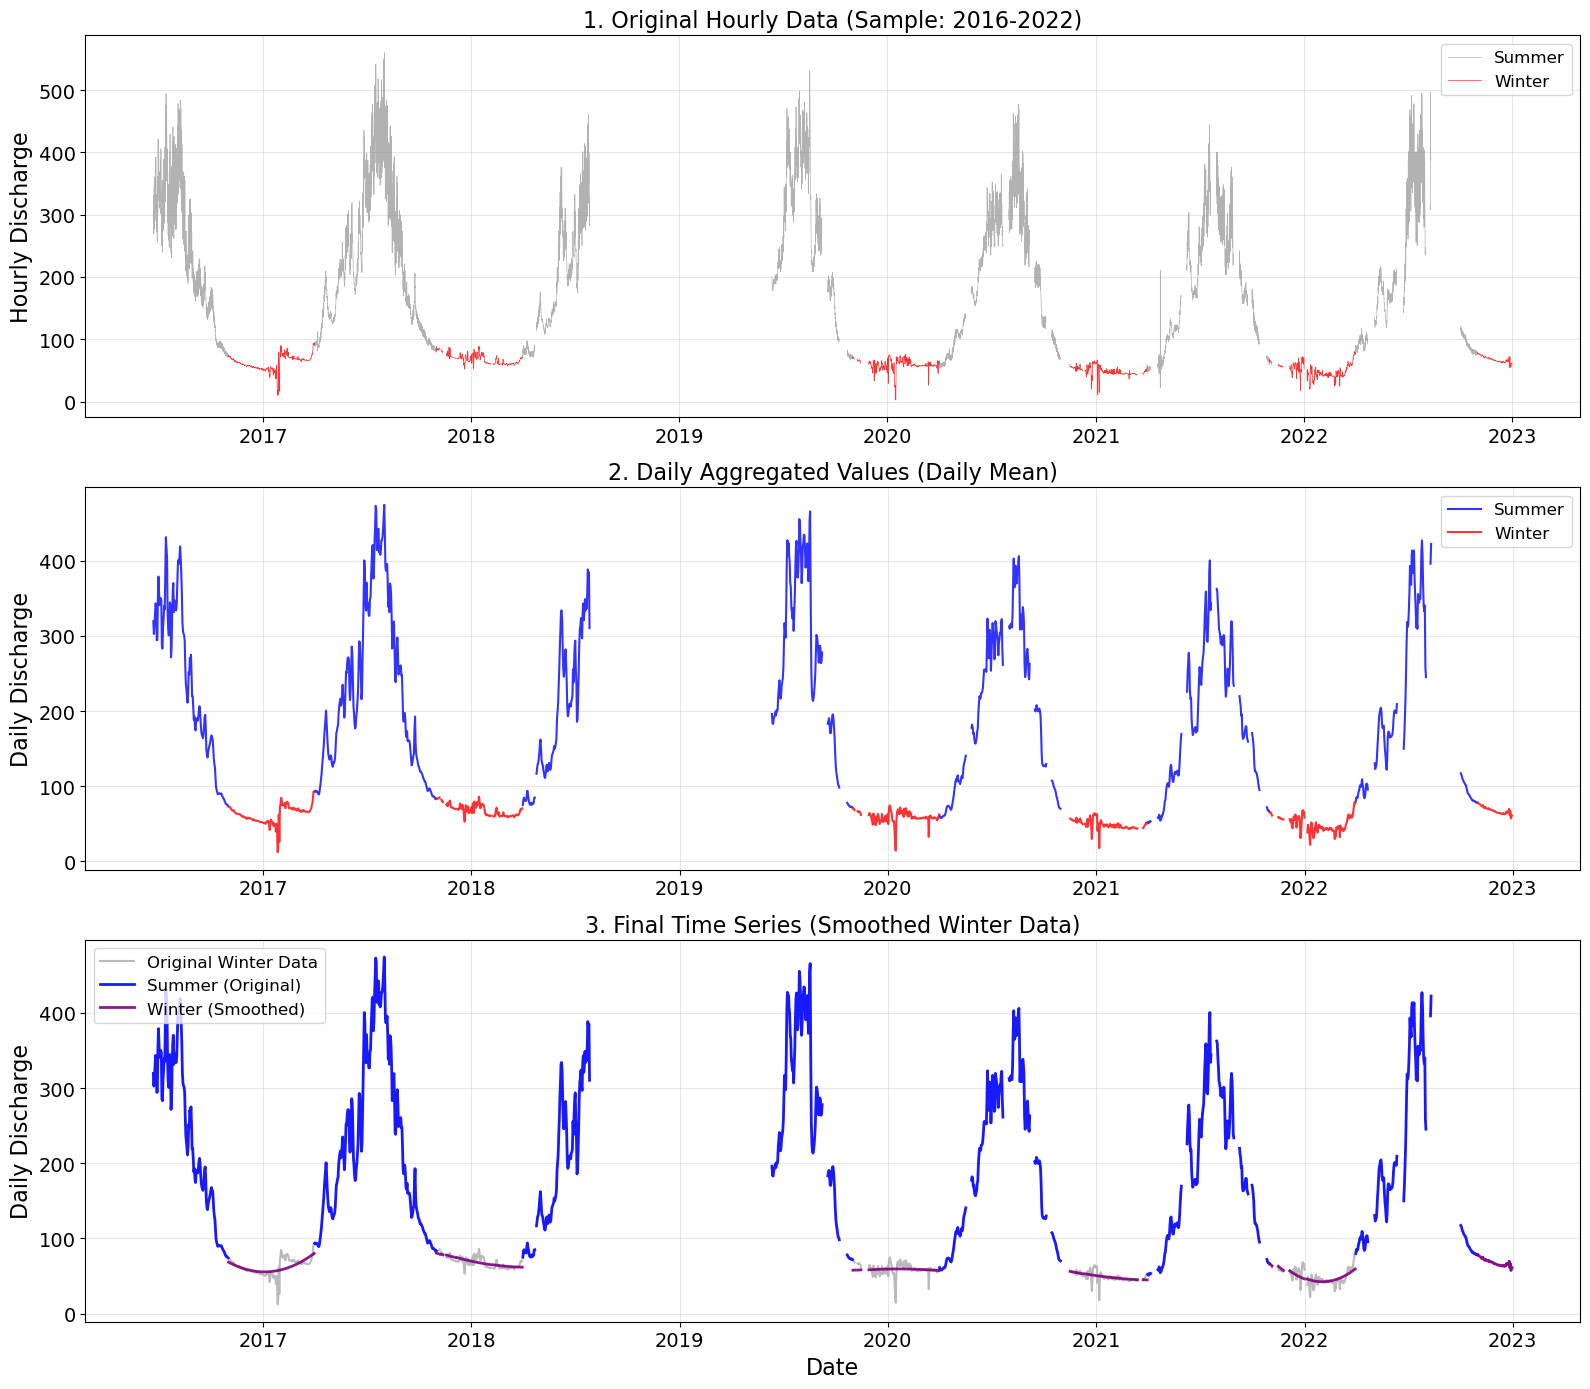

✅ UPDATED pipeline visualization:
   • First plot: Grey summer, red winter (better contrast)
   • Third plot: Original winter data shown as background
   • No connecting lines between discontinuous periods
   • Clear distinction between original and smoothed winter data


In [42]:
def create_improved_final_pipeline_plots(df_hourly, df_daily, df_smoothed):
    """
    Create improved pipeline visualization with:
    - Winter data highlighted in different colors
    - NO connecting lines between discontinuous periods
    - Original winter data as background in 3rd subplot
    - Grey summer lines in first plot
    """
    
    # Create the final clean dataframe
    final_df = df_daily[['date', 'Q_daily']].copy()
    final_df['month'] = final_df['date'].dt.month
    final_df['is_winter'] = final_df['month'].isin([11, 12, 1, 2, 3])
    final_df['Q_final'] = final_df['Q_daily'].copy()
    
    # Replace winter values with smoothed values
    smoothed_subset = df_smoothed[['date', 'Q_final']].copy()
    smoothed_subset.rename(columns={'Q_final': 'Q_smoothed'}, inplace=True)
    final_df = final_df.merge(smoothed_subset, on='date', how='left')
    
    winter_mask = final_df['is_winter'] & final_df['Q_smoothed'].notna()
    final_df.loc[winter_mask, 'Q_final'] = final_df.loc[winter_mask, 'Q_smoothed']
    
    # Create the plots
    fig, axes = plt.subplots(3, 1, figsize=(16, 14))
    
    # Sample years for all plots
    sample_years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
    
    # Helper function to plot continuous segments
    def plot_continuous_segments(ax, df, date_col, value_col, color, linewidth, alpha, label, season_col=None, target_season=None):
        """Plot only continuous segments without connecting across gaps"""
        if season_col is not None:
            df_filtered = df[df[season_col] == target_season].copy()
        else:
            df_filtered = df.copy()
        
        if len(df_filtered) == 0:
            return
        
        # Sort by date
        df_filtered = df_filtered.sort_values(date_col).reset_index(drop=True)
        
        # Find gaps (more than 2 days between consecutive points)
        df_filtered['date_diff'] = df_filtered[date_col].diff().dt.days
        gap_indices = df_filtered[df_filtered['date_diff'] > 2].index.tolist()
        
        # Add start and end points
        segment_starts = [0] + gap_indices
        segment_ends = gap_indices + [len(df_filtered)]
        
        # Plot each continuous segment separately
        first_segment = True
        for start_idx, end_idx in zip(segment_starts, segment_ends):
            segment_data = df_filtered.iloc[start_idx:end_idx]
            if len(segment_data) > 0:
                segment_label = label if first_segment else None
                ax.plot(segment_data[date_col], segment_data[value_col], 
                       color=color, linewidth=linewidth, alpha=alpha, label=segment_label)
                first_segment = False
    
    # Subplot 1: Original hourly data with NO connecting lines (GREY SUMMER, RED WINTER)
    sample_mask = df_hourly['datetime'].dt.year.isin(sample_years)
    sample_hourly = df_hourly[sample_mask].copy()
    sample_hourly['month'] = sample_hourly['datetime'].dt.month
    sample_hourly['is_winter'] = sample_hourly['month'].isin([11, 12, 1, 2, 3])
    sample_hourly_clean = sample_hourly.dropna(subset=['Q_obs_final'])
    
    # Plot summer as GREY and winter as RED
    plot_continuous_segments(axes[0], sample_hourly_clean, 'datetime', 'Q_obs_final', 
                           'grey', 0.5, 0.6, 'Summer', 'is_winter', False)
    plot_continuous_segments(axes[0], sample_hourly_clean, 'datetime', 'Q_obs_final', 
                           'red', 0.5, 0.8, 'Winter', 'is_winter', True)
    
    axes[0].set_title('1. Original Hourly Data (Sample: 2016-2022)', fontsize=16)
    axes[0].set_ylabel('Hourly Discharge', fontsize=16)
    axes[0].tick_params(axis='both', labelsize=14)
    axes[0].legend(fontsize=12)
    axes[0].grid(True, alpha=0.3)
    
    # Subplot 2: Daily aggregated data with NO connecting lines
    sample_daily_mask = df_daily['date'].dt.year.isin(sample_years)
    sample_daily = df_daily[sample_daily_mask].copy()
    sample_daily['month'] = sample_daily['date'].dt.month
    sample_daily['is_winter'] = sample_daily['month'].isin([11, 12, 1, 2, 3])
    sample_daily_clean = sample_daily.dropna(subset=['Q_daily'])
    
    plot_continuous_segments(axes[1], sample_daily_clean, 'date', 'Q_daily', 
                           'blue', 1.5, 0.8, 'Summer', 'is_winter', False)
    plot_continuous_segments(axes[1], sample_daily_clean, 'date', 'Q_daily', 
                           'red', 1.5, 0.8, 'Winter', 'is_winter', True)
    
    axes[1].set_title('2. Daily Aggregated Values (Daily Mean)', fontsize=16)
    axes[1].set_ylabel('Daily Discharge', fontsize=16)
    axes[1].tick_params(axis='both', labelsize=14)
    axes[1].legend(fontsize=12)
    axes[1].grid(True, alpha=0.3)
    
    # Subplot 3: Final time series with ORIGINAL WINTER DATA as background
    sample_final_mask = final_df['date'].dt.year.isin(sample_years)
    sample_final = final_df[sample_final_mask].copy()
    sample_final_clean = sample_final.dropna(subset=['Q_final'])
    
    # Plot ORIGINAL winter data as darker grey background (from daily data, not smoothed)
    if 'Q_daily' in sample_final_clean.columns:
        winter_original = sample_final_clean[sample_final_clean['is_winter']].copy()
        if len(winter_original) > 0:
            plot_continuous_segments(axes[2], winter_original, 'date', 'Q_daily', 
                                   'darkgrey', 1.5, 0.8, 'Original Winter Data')
    
    # Plot final processed data as continuous segments
    plot_continuous_segments(axes[2], sample_final_clean, 'date', 'Q_final', 
                           'blue', 2, 0.9, 'Summer (Original)', 'is_winter', False)
    plot_continuous_segments(axes[2], sample_final_clean, 'date', 'Q_final', 
                           'purple', 2, 0.9, 'Winter (Smoothed)', 'is_winter', True)
    
    axes[2].set_title('3. Final Time Series (Smoothed Winter Data)', fontsize=16)
    axes[2].set_xlabel('Date', fontsize=16)
    axes[2].set_ylabel('Daily Discharge', fontsize=16)
    axes[2].tick_params(axis='both', labelsize=14)
    axes[2].legend(fontsize=12)
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"✅ UPDATED pipeline visualization:")
    print(f"   • First plot: Grey summer, red winter (better contrast)")
    print(f"   • Third plot: Original winter data shown as background")
    print(f"   • No connecting lines between discontinuous periods")
    print(f"   • Clear distinction between original and smoothed winter data")
    
    return fig, final_df[['date', 'Q_final', 'is_winter']].copy()

# Create the UPDATED pipeline visualization
print("🎨 Creating UPDATED Pipeline Visualization...")
print("="*60)

updated_pipeline_fig, updated_final_time_series = create_improved_final_pipeline_plots(
    df_hourly=df_final,
    df_daily=daily_final,
    df_smoothed=result_fixed
)

🎯 Winter Comparison Function Ready!
📅 Available Winter Periods:
  • Winter 2016-2017
    plot_winter_comparison(daily_final, result_fixed, winter_year='2016-2017')
  • Winter 2017-2018
    plot_winter_comparison(daily_final, result_fixed, winter_year='2017-2018')
  • Winter 2019-2020
    plot_winter_comparison(daily_final, result_fixed, winter_year='2019-2020')
  • Winter 2020-2021
    plot_winter_comparison(daily_final, result_fixed, winter_year='2020-2021')
  • Winter 2021-2022
    plot_winter_comparison(daily_final, result_fixed, winter_year='2021-2022')

💡 Usage examples:
  plot_winter_comparison(daily_final, result_fixed, winter_year='2021-2022')
  plot_winter_comparison(daily_final, result_fixed, winter_year=2018)
  plot_winter_comparison(daily_final, result_fixed, start_date='2020-12-01', end_date='2021-02-28')

🔧 Quick test functions:
  plot_winter_2022()  # Winter 2021-2022
  plot_winter_2018()  # Winter 2017-2018
  plot_winter_2020()  # Winter 2019-2020

🧪 Testing with Winter

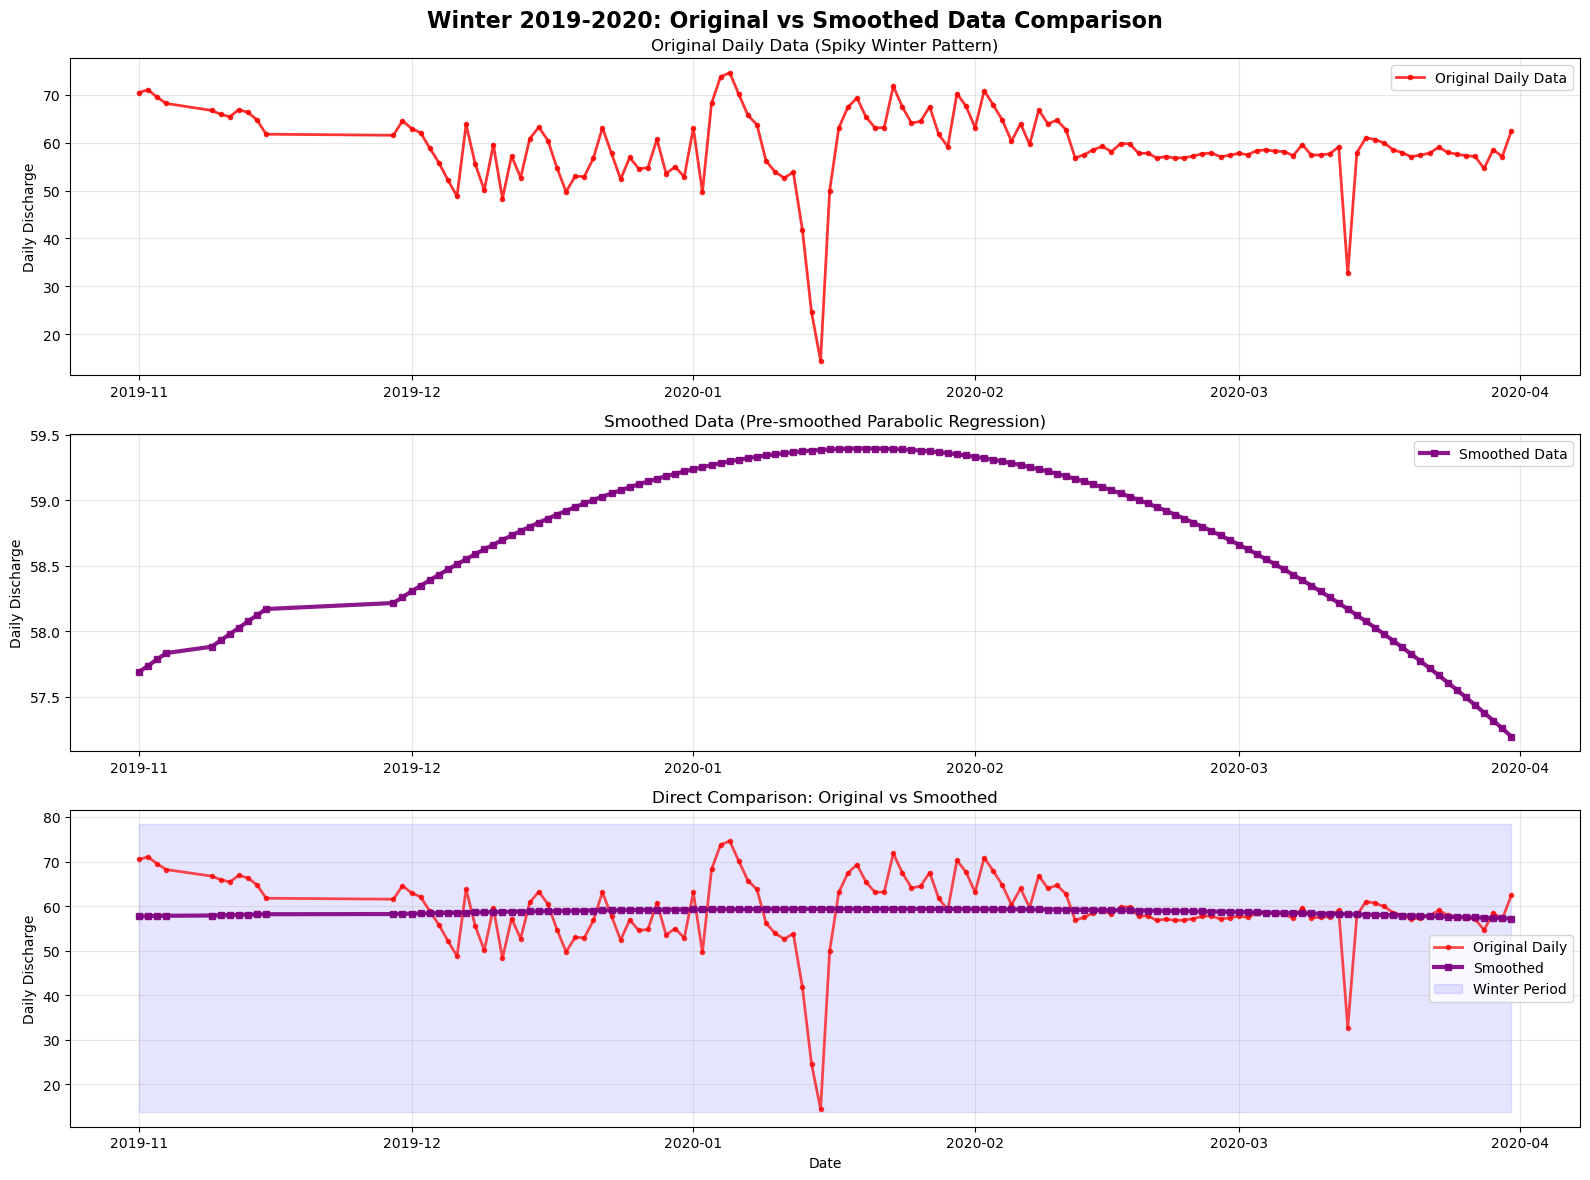


📊 Winter 2019-2020 Statistics:
Data points: 135
Original mean: 59.21
Smoothed mean: 58.73
Mean change: -0.8%
Original std: 7.84
Smoothed std: 0.61
Noise reduction: 92.2%
Correlation: -0.023

❄️ Winter-only Statistics:
Winter data points: 135
Winter original std: 7.84
Winter smoothed std: 0.61
Winter noise reduction: 92.2%


In [44]:
def plot_winter_comparison(df_daily, df_smoothed, winter_year=None, start_date=None, end_date=None):
    """
    Plot comparison of original vs smoothed winter data for a specific winter period
    
    Parameters:
    -----------
    df_daily : DataFrame
        Daily aggregated data with Q_daily column
    df_smoothed : DataFrame  
        Smoothed data with Q_final column
    winter_year : str or int, optional
        Winter year like '2021-2022' or 2022 (uses Nov year1 to Mar year2)
    start_date : str, optional
        Custom start date like '2021-11-01' 
    end_date : str, optional
        Custom end date like '2022-03-31'
    
    Examples:
    ---------
    plot_winter_comparison(daily_final, result_fixed, winter_year='2021-2022')
    plot_winter_comparison(daily_final, result_fixed, winter_year=2018)
    plot_winter_comparison(daily_final, result_fixed, start_date='2020-12-01', end_date='2021-02-28')
    """
    
    # Determine date range
    if winter_year is not None:
        if isinstance(winter_year, str) and '-' in winter_year:
            # Format like '2021-2022'
            year1, year2 = winter_year.split('-')
            year1, year2 = int(year1), int(year2)
        else:
            # Single year - assume it's the ending year
            year2 = int(winter_year)
            year1 = year2 - 1
        
        start_date = f'{year1}-11-01'
        end_date = f'{year2}-03-31'
        period_name = f'Winter {year1}-{year2}'
    
    elif start_date is not None and end_date is not None:
        period_name = f'Period {start_date} to {end_date}'
    
    else:
        # Default to most recent winter
        max_year = df_daily['date'].dt.year.max()
        year1, year2 = max_year - 1, max_year
        start_date = f'{year1}-11-01'
        end_date = f'{year2}-03-31'
        period_name = f'Winter {year1}-{year2} (Default)'
    
    print(f"🔍 Analyzing {period_name}")
    print(f"📅 Date range: {start_date} to {end_date}")
    print("="*60)
    
    # Filter data for the period
    daily_mask = (df_daily['date'] >= start_date) & (df_daily['date'] <= end_date)
    smooth_mask = (df_smoothed['date'] >= start_date) & (df_smoothed['date'] <= end_date)
    
    daily_period = df_daily[daily_mask].copy()
    smooth_period = df_smoothed[smooth_mask].copy()
    
    # Check if we have data
    if len(daily_period) == 0:
        print(f"❌ No daily data found for period {start_date} to {end_date}")
        print(f"Available daily data range: {df_daily['date'].min()} to {df_daily['date'].max()}")
        return None
    
    if len(smooth_period) == 0:
        print(f"❌ No smoothed data found for period {start_date} to {end_date}")
        print(f"Available smoothed data range: {df_smoothed['date'].min()} to {df_smoothed['date'].max()}")
        return None
    
    # Merge data for comparison
    merged_data = pd.merge(daily_period[['date', 'Q_daily']], 
                          smooth_period[['date', 'Q_final']], 
                          on='date', how='outer')
    merged_data = merged_data.sort_values('date')
    
    # Add winter/summer flags
    merged_data['month'] = merged_data['date'].dt.month
    merged_data['is_winter'] = merged_data['month'].isin([11, 12, 1, 2, 3])
    
    # Create the comparison plot
    fig, axes = plt.subplots(3, 1, figsize=(16, 12))
    fig.suptitle(f'{period_name}: Original vs Smoothed Data Comparison', fontsize=16, fontweight='bold')
    
    # Plot 1: Original daily data
    axes[0].plot(merged_data['date'], merged_data['Q_daily'], 'red', linewidth=2, alpha=0.8, marker='o', markersize=3, label='Original Daily Data')
    axes[0].set_title('Original Daily Data (Spiky Winter Pattern)')
    axes[0].set_ylabel('Daily Discharge')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Smoothed data
    axes[1].plot(merged_data['date'], merged_data['Q_final'], 'purple', linewidth=3, alpha=0.9, marker='s', markersize=4, label='Smoothed Data')
    axes[1].set_title('Smoothed Data (Pre-smoothed Parabolic Regression)')
    axes[1].set_ylabel('Daily Discharge')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Both overlaid for direct comparison
    axes[2].plot(merged_data['date'], merged_data['Q_daily'], 'red', linewidth=2, alpha=0.7, marker='o', markersize=3, label='Original Daily')
    axes[2].plot(merged_data['date'], merged_data['Q_final'], 'purple', linewidth=3, alpha=0.9, marker='s', markersize=4, label='Smoothed')
    
    # Highlight winter vs summer periods
    winter_data = merged_data[merged_data['is_winter']]
    summer_data = merged_data[~merged_data['is_winter']]
    
    if len(winter_data) > 0:
        axes[2].fill_between(winter_data['date'], 
                           winter_data['Q_daily'].min() * 0.95, 
                           winter_data['Q_daily'].max() * 1.05, 
                           alpha=0.1, color='blue', label='Winter Period')
    
    axes[2].set_title('Direct Comparison: Original vs Smoothed')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Daily Discharge')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and print statistics
    valid_data = merged_data.dropna(subset=['Q_daily', 'Q_final'])
    
    if len(valid_data) > 0:
        orig_std = valid_data['Q_daily'].std()
        smooth_std = valid_data['Q_final'].std()
        noise_reduction = ((orig_std - smooth_std) / orig_std) * 100
        correlation = valid_data['Q_daily'].corr(valid_data['Q_final'])
        
        orig_mean = valid_data['Q_daily'].mean()
        smooth_mean = valid_data['Q_final'].mean()
        mean_change = ((smooth_mean - orig_mean) / orig_mean) * 100
        
        print(f"\n📊 {period_name} Statistics:")
        print("="*50)
        print(f"Data points: {len(valid_data)}")
        print(f"Original mean: {orig_mean:.2f}")
        print(f"Smoothed mean: {smooth_mean:.2f}")
        print(f"Mean change: {mean_change:+.1f}%")
        print(f"Original std: {orig_std:.2f}")
        print(f"Smoothed std: {smooth_std:.2f}")
        print(f"Noise reduction: {noise_reduction:.1f}%")
        print(f"Correlation: {correlation:.3f}")
        
        # Winter-specific stats if this period includes winter
        winter_valid = valid_data[valid_data['is_winter']]
        summer_valid = valid_data[~valid_data['is_winter']]
        
        if len(winter_valid) > 0:
            winter_orig_std = winter_valid['Q_daily'].std()
            winter_smooth_std = winter_valid['Q_final'].std()
            winter_noise_reduction = ((winter_orig_std - winter_smooth_std) / winter_orig_std) * 100
            
            print(f"\n❄️ Winter-only Statistics:")
            print(f"Winter data points: {len(winter_valid)}")
            print(f"Winter original std: {winter_orig_std:.2f}")
            print(f"Winter smoothed std: {winter_smooth_std:.2f}")
            print(f"Winter noise reduction: {winter_noise_reduction:.1f}%")
        
        if len(summer_valid) > 0:
            print(f"\n☀️ Summer-only Statistics:")
            print(f"Summer data points: {len(summer_valid)}")
            print(f"Summer original std: {summer_valid['Q_daily'].std():.2f}")
            print(f"Summer smoothed std: {summer_valid['Q_final'].std():.2f}")
    
    return fig, merged_data

# Easy-to-use wrapper functions for common winters
def plot_winter_2022():
    """Quick function to plot winter 2021-2022"""
    return plot_winter_comparison(daily_final, result_fixed, winter_year='2021-2022')

def plot_winter_2018():
    """Quick function to plot winter 2017-2018"""
    return plot_winter_comparison(daily_final, result_fixed, winter_year='2017-2018')

def plot_winter_2020():
    """Quick function to plot winter 2019-2020"""
    return plot_winter_comparison(daily_final, result_fixed, winter_year='2019-2020')

def list_available_winters(df_daily):
    """List all available winter periods in the dataset"""
    df_winter = df_daily.copy()
    df_winter['month'] = df_winter['date'].dt.month
    df_winter['year'] = df_winter['date'].dt.year
    df_winter['is_winter'] = df_winter['month'].isin([11, 12, 1, 2, 3])
    
    winter_data = df_winter[df_winter['is_winter']]
    years = sorted(winter_data['year'].unique())
    
    print("📅 Available Winter Periods:")
    print("="*40)
    for i in range(len(years) - 1):
        start_year = years[i]
        end_year = years[i + 1]
        if end_year - start_year == 1:  # Consecutive years
            # Check if we have both Nov-Dec and Jan-Mar data
            nov_dec_data = winter_data[(winter_data['year'] == start_year) & (winter_data['month'].isin([11, 12]))]
            jan_mar_data = winter_data[(winter_data['year'] == end_year) & (winter_data['month'].isin([1, 2, 3]))]
            
            if len(nov_dec_data) > 0 and len(jan_mar_data) > 0:
                print(f"  • Winter {start_year}-{end_year}")
                print(f"    plot_winter_comparison(daily_final, result_fixed, winter_year='{start_year}-{end_year}')")
    
    print(f"\n💡 Usage examples:")
    print(f"  plot_winter_comparison(daily_final, result_fixed, winter_year='2021-2022')")
    print(f"  plot_winter_comparison(daily_final, result_fixed, winter_year=2018)")
    print(f"  plot_winter_comparison(daily_final, result_fixed, start_date='2020-12-01', end_date='2021-02-28')")

# Show available winters
print("🎯 Winter Comparison Function Ready!")
print("="*50)
list_available_winters(daily_final)

print(f"\n🔧 Quick test functions:")
print(f"  plot_winter_2022()  # Winter 2021-2022")
print(f"  plot_winter_2018()  # Winter 2017-2018") 
print(f"  plot_winter_2020()  # Winter 2019-2020")

# Test with the problematic winter 2021-2022
print(f"\n🧪 Testing with Winter 2021-2022...")
test_fig, test_data = plot_winter_2020()

🎯 Hourly Winter Comparison Ready!
Usage (now with original hourly data):
  plot_winter_2022_hourly()  # Winter 2021-2022
  plot_winter_2018_hourly()  # Winter 2017-2018
  plot_winter_2020_hourly()  # Winter 2019-2020
  plot_winter_comparison(df_final, result_fixed, winter_year='2019-2020')

🧪 Testing Winter 2017-2018 with hourly data...
🔍 Analyzing Winter 2017-2018
📅 Date range: 2017-11-01 to 2018-03-31
📊 Actual data range: 2017-11-01 to 2018-03-31
   • Hourly data points: 2,957
   • Daily smoothed points: 138


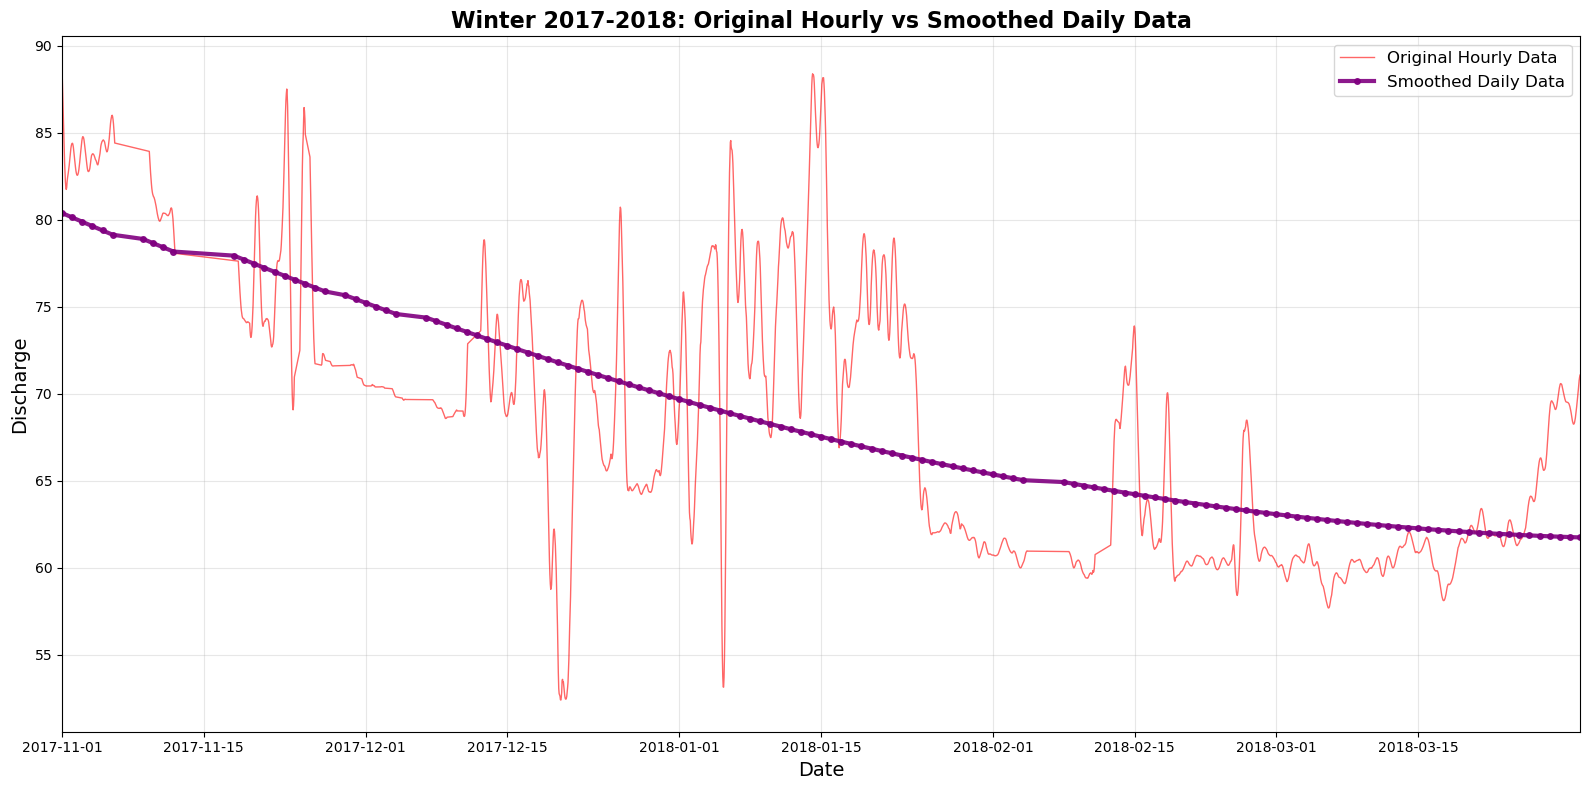


📊 Winter 2017-2018 Statistics:
Comparable daily periods: 138
Original daily avg mean: 68.40
Smoothed daily mean: 68.41
Original daily avg std: 7.59
Smoothed daily std: 5.57
Noise reduction: 26.6%
Correlation: 0.726

📈 Hourly vs Smoothed Comparison:
Original hourly std: 7.88
Smoothed daily std: 5.57
Hourly-to-smooth noise reduction: 29.2%


In [52]:
def plot_winter_comparison(df_hourly, df_smoothed, winter_year=None, start_date=None, end_date=None):
    """
    Plot original hourly vs smoothed daily winter data in a single plot
    
    Parameters:
    -----------
    df_hourly : DataFrame
        Original hourly data with datetime and Q_obs_final columns
    df_smoothed : DataFrame  
        Smoothed daily data with date and Q_final columns
    winter_year : str or int, optional
        Winter year like '2021-2022' or 2022 (uses Nov year1 to Mar year2)
    start_date : str, optional
        Custom start date like '2021-11-01' 
    end_date : str, optional
        Custom end date like '2022-03-31'
    """
    
    # Determine date range
    if winter_year is not None:
        if isinstance(winter_year, str) and '-' in winter_year:
            year1, year2 = winter_year.split('-')
            year1, year2 = int(year1), int(year2)
        else:
            year2 = int(winter_year)
            year1 = year2 - 1
        
        start_date = f'{year1}-11-01'
        end_date = f'{year2}-03-31'
        period_name = f'Winter {year1}-{year2}'
    
    elif start_date is not None and end_date is not None:
        period_name = f'Period {start_date} to {end_date}'
    
    else:
        # Default to most recent winter
        max_year = df_hourly['datetime'].dt.year.max()
        year1, year2 = max_year - 1, max_year
        start_date = f'{year1}-11-01'
        end_date = f'{year2}-03-31'
        period_name = f'Winter {year1}-{year2} (Default)'
    
    print(f"🔍 Analyzing {period_name}")
    print(f"📅 Date range: {start_date} to {end_date}")
    print("="*60)
    
    # Filter hourly data for the period
    hourly_mask = (df_hourly['datetime'] >= start_date) & (df_hourly['datetime'] <= end_date)
    hourly_period = df_hourly[hourly_mask].copy()
    
    # Filter smoothed data for the period
    smooth_mask = (df_smoothed['date'] >= start_date) & (df_smoothed['date'] <= end_date)
    smooth_period = df_smoothed[smooth_mask].copy()
    
    # Check if we have data
    if len(hourly_period) == 0:
        print(f"❌ No hourly data found for period {start_date} to {end_date}")
        print(f"Available hourly data range: {df_hourly['datetime'].min()} to {df_hourly['datetime'].max()}")
        return None
    
    if len(smooth_period) == 0:
        print(f"❌ No smoothed data found for period {start_date} to {end_date}")
        print(f"Available smoothed data range: {df_smoothed['date'].min()} to {df_smoothed['date'].max()}")
        return None
    
    # Only plot periods where we actually have data
    hourly_clean = hourly_period.dropna(subset=['Q_obs_final'])
    smooth_clean = smooth_period.dropna(subset=['Q_final'])
    
    if len(hourly_clean) == 0:
        print(f"❌ No valid hourly data (all NaN) for period {start_date} to {end_date}")
        return None
    
    if len(smooth_clean) == 0:
        print(f"❌ No valid smoothed data (all NaN) for period {start_date} to {end_date}")
        return None
    
    # Determine actual data range to plot
    actual_start = max(hourly_clean['datetime'].min().date(), smooth_clean['date'].min().date())
    actual_end = min(hourly_clean['datetime'].max().date(), smooth_clean['date'].max().date())
    
    print(f"📊 Actual data range: {actual_start} to {actual_end}")
    print(f"   • Hourly data points: {len(hourly_clean):,}")
    print(f"   • Daily smoothed points: {len(smooth_clean):,}")
    
    # Create single comparison plot
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    
    # Plot original hourly data first (underneath) - only where we have data
    ax.plot(hourly_clean['datetime'], hourly_clean['Q_obs_final'], 
            'red', linewidth=1, alpha=0.6, label='Original Hourly Data')
    
    # Plot smoothed daily data on top - only where we have data
    ax.plot(smooth_clean['date'], smooth_clean['Q_final'], 
            'purple', linewidth=3, alpha=0.9, 
            marker='o', markersize=4, label='Smoothed Daily Data')
    
    ax.set_title(f'{period_name}: Original Hourly vs Smoothed Daily Data', fontsize=16, fontweight='bold')
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Discharge', fontsize=14)
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Set x-axis limits to actual data range
    ax.set_xlim(pd.Timestamp(actual_start), pd.Timestamp(actual_end))
    
    plt.tight_layout()
    plt.show()
    
    # Calculate statistics by creating daily averages from hourly data for comparison
    print(f"\n📊 {period_name} Statistics:")
    print("="*50)
    
    # Create daily averages from hourly data for fair comparison
    hourly_clean['date'] = hourly_clean['datetime'].dt.date
    hourly_daily_avg = hourly_clean.groupby('date')['Q_obs_final'].mean().reset_index()
    hourly_daily_avg['date'] = pd.to_datetime(hourly_daily_avg['date'])
    
    # Merge with smoothed data for comparison
    comparison_data = pd.merge(hourly_daily_avg, smooth_clean[['date', 'Q_final']], 
                              on='date', how='inner')
    
    if len(comparison_data) > 0:
        orig_std = comparison_data['Q_obs_final'].std()
        smooth_std = comparison_data['Q_final'].std()
        noise_reduction = ((orig_std - smooth_std) / orig_std) * 100
        correlation = comparison_data['Q_obs_final'].corr(comparison_data['Q_final'])
        
        orig_mean = comparison_data['Q_obs_final'].mean()
        smooth_mean = comparison_data['Q_final'].mean()
        
        print(f"Comparable daily periods: {len(comparison_data)}")
        print(f"Original daily avg mean: {orig_mean:.2f}")
        print(f"Smoothed daily mean: {smooth_mean:.2f}")
        print(f"Original daily avg std: {orig_std:.2f}")
        print(f"Smoothed daily std: {smooth_std:.2f}")
        print(f"Noise reduction: {noise_reduction:.1f}%")
        print(f"Correlation: {correlation:.3f}")
        
        # Additional hourly statistics
        hourly_std = hourly_clean['Q_obs_final'].std()
        hourly_mean = hourly_clean['Q_obs_final'].mean()
        hourly_to_smooth_reduction = ((hourly_std - smooth_std) / hourly_std) * 100
        
        print(f"\n📈 Hourly vs Smoothed Comparison:")
        print(f"Original hourly std: {hourly_std:.2f}")
        print(f"Smoothed daily std: {smooth_std:.2f}")
        print(f"Hourly-to-smooth noise reduction: {hourly_to_smooth_reduction:.1f}%")
    
    return fig, {'hourly': hourly_clean, 'smoothed': smooth_clean, 'comparison': comparison_data if len(comparison_data) > 0 else None}

# Quick functions for specific winters using original hourly data
def plot_winter_2022_hourly():
    """Quick function to plot winter 2021-2022 with hourly data"""
    return plot_winter_comparison(df_final, result_fixed, winter_year='2021-2022')

def plot_winter_2018_hourly():
    """Quick function to plot winter 2017-2018 with hourly data"""
    return plot_winter_comparison(df_final, result_fixed, winter_year='2017-2018')

def plot_winter_2020_hourly():
    """Quick function to plot winter 2019-2020 with hourly data"""
    return plot_winter_comparison(df_final, result_fixed, winter_year='2019-2020')

def plot_winter_2017_hourly():
    """Quick function to plot winter 2016-2017 with hourly data"""
    return plot_winter_comparison(df_final, result_fixed, winter_year='2016-2017')

# Test with different winters
print("🎯 Hourly Winter Comparison Ready!")
print("="*50)
print("Usage (now with original hourly data):")
print("  plot_winter_2022_hourly()  # Winter 2021-2022")
print("  plot_winter_2018_hourly()  # Winter 2017-2018") 
print("  plot_winter_2020_hourly()  # Winter 2019-2020")
print("  plot_winter_comparison(df_final, result_fixed, winter_year='2019-2020')")

# Test with winter 2017-2018
print(f"\n🧪 Testing Winter 2017-2018 with hourly data...")
test_fig, test_data = plot_winter_2018_hourly()